In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib.colors import LogNorm

sns.set_theme()

# jupyter notebook full-width display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# no text wrapping
display(HTML("<style>.dataframe td { white-space: nowrap; }</style>"))

# pandas formatting
pd.set_option('display.float_format', '{:.3f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [2]:
df_LF = pd.read_pickle('df_LF_grouped.pickle')
df_FD = pd.read_pickle('df_FD.pickle')
df_SD = pd.read_pickle('df_SD.pickle')

# Descriptive Stats

### Sample Dates vs Fish Detail and Length Frequency Dates
##### Percentages of Frozen vs Fresh date/sites that match
* look like these are sample dates, otherwise we would expect the opposite

In [3]:
frozen_ids = list(df_FD[df_FD.CONDITION=='Frozen'].id.unique())
frozen_ids = [x for x in frozen_ids if x < 2024_00_00_00]
sum(df_SD.id.isin(frozen_ids)) / len(frozen_ids)

0.8320707070707071

In [4]:
wet_ids = list(df_FD[df_FD.CONDITION=='Fresh'].id.unique())
wet_ids = [x for x in wet_ids if x < 2024_00_00_00]
sum(df_SD.id.isin(wet_ids)) / len(wet_ids)

0.7484848484848485

##### Simulation 
* check what percentage of sites would match randomly (to confirm sample date matches properly)

In [5]:
# older form of df_LF
df_LF_old = pd.read_csv(r'.\provided data\Margaree Gaspereau lgth-freq_Master.csv')

# convert all times to same format, set missing times to 0000 (date only), then to datetime format
df_LF_old['CleanTime'] = df_LF_old['Time']
df_LF_old.loc[df_LF_old['CleanTime'] < 10, 'CleanTime'] = df_LF_old.loc[df_LF_old['CleanTime'] < 10, 'CleanTime'] * 100
df_LF_old['CleanTime'] = pd.to_datetime(df_LF_old.CleanTime, format='%H%M')

# all null times should be 0000 (which pandas reads as no time data)
df_LF_old.loc[df_LF_old['CleanTime'].isnull(), 'CleanTime'] = pd.to_datetime(0)  

df_LF_old['DATETIME'] = pd.to_datetime(dict(
    year=df_LF_old['yy'], 
    month=df_LF_old['mm'], 
    day=df_LF_old['dd'], 
    hour=df_LF_old['CleanTime'].dt.hour, 
    minute=df_LF_old['CleanTime'].dt.minute
), errors='coerce')

df_LF_old = df_LF_old.drop('CleanTime', axis=1)

df_LF_old[['SITE1', 'SITE2', 'SITE3']] = df_LF_old.site.str.replace(' ','').str.split(',', expand=True).fillna(pd.NA)
df_LF_old = df_LF_old[df_LF_old.SITE1.notna()]

In [6]:
%%time

l_n_sites = list()
l_p_matches = list()

for i in range(1000):
    
    sample_sites = df_SD[df_SD.DATETIME == df_SD.sample().DATETIME.item()].SITE.unique()
    fish_sites = df_FD[df_FD.DATETIME == df_FD.sample().DATETIME.item()].SITE.unique()
    length_sites = df_LF_old[df_LF_old.DATETIME == df_LF_old.sample().DATETIME.item()].SITE1.unique()
    
    if len(sample_sites):
        p_match_FD = len([x for x in sample_sites if x in fish_sites]) / len(sample_sites)
        p_match_LF = len([x for x in sample_sites if x in length_sites]) / len(sample_sites)
    else:
        p_match_FD = 0
        p_match_LF = 0
    p_matches = (p_match_FD, p_match_LF)
    
    n_sites = (len(sample_sites), len(fish_sites), len(length_sites)) 
    l_n_sites.append(n_sites)
    l_p_matches.append(p_matches)
    

# display results
print('Proportions and Numbers of Matched Sites')
display(
    pd.concat([
        pd.DataFrame(l_p_matches, columns=['Fish Detail Match %', 'Length Freq Match %']), 
        pd.DataFrame(l_n_sites, columns=['No. Sample Sites', 'No. Fish Details Sites', 'No. Length Freq Sites'])
    ], axis=1).describe(percentiles=[.005, .025, .975, .995]).T[['min', '0.5%', 'mean', '99.5%', 'max']]  # 99% CI
)

# there is virtually no chance of as many matched samples/details/lengths
# unless sample dates are matched between spreadsheets

AttributeError: 'DataFrame' object has no attribute 'SITE'

### FISH DETAILS

In [7]:
df_FD.dtypes

YEAR                                           Int32
MM                                             Int32
DD                                             Int32
WEEK                                           Int32
SITE                                          object
PERIOD                                        object
CONDITION                                     object
FISH_NO                                        Int32
FL_WET                                         Int32
FL_FROZEN                                      Int32
FL_STD                                       float64
WEIGHT                                       float64
SPECIES                                       object
SEX                                           object
MATURITY                                       Int32
GONAD_WEIGHT                                 float64
Ager_1                                        object
AGE_1                                          Int32
FSP_1                                         

In [8]:
df_FD.describe(include='all', datetime_is_numeric=False).T

C:\Users\CARRK\AppData\Local\Temp\1\ipykernel_2528\503964342.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_FD.describe(include='all', datetime_is_numeric=False).T


count unique  \
YEAR                               36912.000    NaN   
MM                                 36912.000    NaN   
DD                                 36912.000    NaN   
WEEK                               23664.000    NaN   
SITE                               36794.000 79.000   
PERIOD                                 31710      3   
CONDITION                              36717      2   
FISH_NO                            36912.000    NaN   
FL_WET                             10853.000    NaN   
FL_FROZEN                          25595.000    NaN   
FL_STD                             35245.000    NaN   
WEIGHT                             36610.000    NaN   
SPECIES                                36685      3   
SEX                                    36685      5   
MATURITY                           36286.000    NaN   
GONAD_WEIGHT                       17940.000    NaN   
Ager_1                                  7118      1   
AGE_1                              31480.000    NaN   
FSP_1                              31257.000    NaN   
Comments_1                              1885    856   
Ager_2                                  1683      1   
AGE_2                               1629.000    NaN   
FSP_2                               1629.000    NaN   
Comments_2                               237    156   
Ager_3                                  2220      1   
AGE_3                               2044.000    NaN   
FSP_3                               2043.000    NaN   
Comments_3                               124     16   
Envelop.Comments                         606     83   
DATETIME                               36912    783   
AGE_notes_1                        31568.000 24.000   
FSP_notes_1                        31350.000 26.000   
AGE_notes_2                         1682.000  8.000   
FSP_notes_2                         1682.000  5.000   
AGE_notes_3                         2044.000  7.000   
FSP_notes_3                         2043.000  5.000   
SITE_notes                             36912     80   
SITE1                              36794.000    NaN   
SITE2                                   1340     16   
SITE3                                    280      7   
fish_length                        36443.000    NaN   
remarks                                36912   3427   
id                                 36912.000    NaN   
FLAG_SITE                               1922      1   
FLAG_AM_PM_PERIOD                        118      1   
FLAG_SEX                                   2      1   
FLAG_MATURITY                              3      1   
FLAG_FSP_1                                 1      1   
FLAG_FL_STD                              264      1   
FLAG_FL_WET_FROZEN                         5      1   
FLAG_WEIGHT_OUTLIER                        6      1   
FLAG_GONAD_OUTLIER                         7      1   
FLAG_MULTIPLE_SAMPLE_POSSIBILITIES      1034      1   
FLAG_MISNUMBERED_FISH_DETAILS            235      1   
FLAG_LEN_WT_RATIO_OUTLIER                 33      1   
FLAG_AM_PM_PERIOD_DISCREPANCIES          196      1   
FLAG_NO_MATCHING_SAMPLE                 6876      1   

                                                                               top  \
YEAR                                                                           NaN   
MM                                                                             NaN   
DD                                                                             NaN   
WEEK                                                                           NaN   
SITE                                                                        12.000   
PERIOD                                                                          AM   
CONDITION                                                                   Frozen   
FISH_NO                                                                        NaN   
FL_WET                                                                    

In [9]:
for col in df_FD.columns:
    print()
    print(col)
    if df_FD[col].nunique() > 100:
        print('number of unique values:', df_FD[col].nunique())
    else:
        print(df_FD[col].unique())


YEAR
<IntegerArray>
[1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1992, 1993, 1994, 1995, 1996,
 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021]
Length: 37, dtype: Int32

MM
<IntegerArray>
[5, 6, 4, 7]
Length: 4, dtype: Int32

DD
<IntegerArray>
[ 9, 12, 14, 16, 17, 19, 21, 23, 26, 31,  2, 24, 30,  1,  3,  4,  6,  7,  8,
 10, 11, 13, 15, 18, 20, 22, 25, 27, 28, 29,  5]
Length: 31, dtype: Int32

WEEK
<IntegerArray>
[<NA>, 4, 5, 6, 7, 8, 2, 3, 1, 9, 10]
Length: 11, dtype: Int32

SITE
[12 8 5 49 9 46 25 33 2 17 39 38 7 37 51 11 64 35 56 nan 15 48 4 34 23 67
 1 26 28 6 52 29 '1A' 60 '60, 52' 41 '1, 8' '37,38,35' '60,52' '1,8' '5,8'
 '12,17' '15,17' '33,48,49' '11,12' '5,11,17' '37,60' '52,60' '38,52'
 '1,8,26' '33,41,60' '35,60' 27 '35,37' '41,49' '52,60,38' '60,52,35'
 '41,35' '01,02' '60,41' '35,41' '38,60,52' '49,41' '35,52' '12,26' '2,5'
 '5,17' '25,26' 47 14 30 62 '11K3 (435,211)' 'E.MA

In [10]:
df_FD[df_FD.GONAD_WEIGHT.notna()].groupby('SEX').count()['id']

SEX
B        1
F    16993
M      622
U      324
Name: id, dtype: int64

In [11]:
df_FD[df_FD.GONAD_WEIGHT.isnull()].groupby('SEX').count()['id']

SEX
A?        1
F      1308
M     16963
U       473
Name: id, dtype: int64

### SAMPLES

In [12]:
df_SD.dtypes

DIST                                        int64
RIVER                                      object
NAME                                       object
code                                       object
GEAR                                        int64
SITE_NO                                    object
no_nets                                    object
YEAR                                        Int32
MM                                          Int32
DD                                          Int32
Week                                        Int32
catch_lbs                                 float64
catch_kg                                  float64
hours_fished                               object
zone                                       object
last_name                                  object
comments                                   object
bycatch_sbass                             float64
bycatch_shad                              float64
bycatch_other                              object


In [13]:
df_SD.describe(include='all', datetime_is_numeric=False).T

C:\Users\CARRK\AppData\Local\Temp\1\ipykernel_2528\3166899065.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_SD.describe(include='all', datetime_is_numeric=False).T


count unique                  top   freq  \
DIST                            15213.000    NaN                  NaN    NaN   
RIVER                               15213      1               SWMARG  15213   
NAME                                15213     74     Martin E Cameron   1209   
code                                    0      0                  NaN    NaN   
GEAR                            15213.000    NaN                  NaN    NaN   
SITE_NO                             15213     62                   12   1209   
no_nets                              9623      2                    1   9574   
YEAR                            15213.000    NaN                  NaN    NaN   
MM                              15194.000    NaN                  NaN    NaN   
DD                              15182.000    NaN                  NaN    NaN   
Week                            11590.000    NaN                  NaN    NaN   
catch_lbs                       15200.000    NaN                  NaN    NaN   
catch_kg                        15212.000    NaN                  NaN    NaN   
hours_fished                        13534     38                   14   2059   
zone                                15208      2                upper   8096   
last_name                           13582     30               Gillis   4564   
comments                               31     25                 salt      3   
bycatch_sbass                      18.000    NaN                  NaN    NaN   
bycatch_shad                        4.000    NaN                  NaN    NaN   
bycatch_other                          18     13                    1      5   
DATETIME                            15182   1568  1989-05-19 00:00:00     37   
SITE1                           15213.000    NaN                  NaN    NaN   
SITE2                                  23      1                    8     23   
remarks                                58     40     bycatch_sbass: 1     10   
id                              15213.000    NaN                  NaN    NaN   
total_fish_preserved              908.000    NaN                  NaN    NaN   
total_fish_measured               731.000    NaN                  NaN    NaN   
AM_PM_PERIOD                          792      3                   AM    427   
wt_lbs                            680.000    NaN                  NaN    NaN   
FLAG_DATETIME                          31      1                 True     31   
FLAG_HOURS_FISHED                      28      1                 True     28   
FLAG_SITE                              23      1                 True     23   
FLAG_AM_PM_PERIOD_DISCREPANCIES         4      1                 True      4   

                                     first       last           mean  \
DIST                                   NaT        NaT          2.000   
RIVER                                  NaT        NaT            NaN   
NAME                                   NaT        NaT            NaN   
code                                   NaT        NaT            NaN   
GEAR                                   NaT        NaT         81.000   
SITE_NO                                NaT        NaT            NaN   
no_nets                                NaT        NaT            NaN   
YEAR                                   NaT        NaT       1999.845   
MM                                     NaT        NaT          5.371   
DD                                     NaT        NaT         16.344   
Week                                   NaT        NaT          4.951   
catch_lbs                              NaT        NaT       1696.968   
catch_kg                               NaT        NaT        769.126   
hours_fished                           NaT        NaT            NaN   
zone                                   NaT        NaT            NaN   
last_name                              NaT        NaT            NaN   
comments                               NaT        NaT            NaN   
bycatch_sbass      

In [14]:
for col in df_SD.columns:
    print()
    print(col)
    if df_SD[col].nunique() > 100:
        print('number of unique values:', df_SD[col].nunique())
    else:
        print(df_SD[col].unique())


DIST
[2]

RIVER
['SWMARG']

NAME
['Michael J Stewart' 'Martin E Cameron' 'Hugh J Gillis' 'Colin Gillis'
 'Darlene Cameron' 'Donald J Gillis' 'Irene MacIsaac' 'John A Coady'
 'Gerard MacFarlane' 'John Coady' 'Jim Coady' 'Fred Ingram'
 'Allan B Gillis' 'Michael D Gillis' 'Mary E Gillis' 'Brian Doyle'
 'John A Chisholm' 'James A Hirtle' 'John MacLellan' 'Alexander MacDonald'
 'Mary C Gillis' 'Donald D Gillis' 'Donald M Campbell' 'Donelda M Gillis'
 'Robert Gillis' 'John R Gillis' 'Alexander Gillis' 'Joseph M MacFarlane'
 'John H Gillis' 'Brian MacFarlane' 'Joseph Mackinnon' 'Neil McDaniel'
 'Robert MacLeod' 'Catherine MacLeod' 'Josephine MacDonald'
 'John Neil Gillis' 'Finley MacDonald' 'Donald MacEachern' 'Robert Peters'
 'Harold MacFarlane' 'Richard Gillis' 'Anthony Cameron'
 'Gerard V Chiasson' 'Eleanor MacLellan' 'John V MacKinnon'
 'David MacKinnon' 'Charles McDaniel' 'Bruce MacLellan'
 'Catherine MacFarlane' 'Hughie MacDonnell' 'Chris MacLean'
 'Eleanor McDaniel' 'Norman MacNeil' '

### LENGTH FREQUENCIES

In [15]:
df_LF.dtypes

sample_id          Int64
length_bin_id    float64
count              int64
dtype: object

In [16]:
df_LF.describe(include='all', datetime_is_numeric=False).T

count           mean           std            min  \
sample_id     11127.000 2042118269.515 247119065.997 1990050712.000   
length_bin_id 11127.000         25.101         2.156         14.500   
count         11127.000         18.452        18.214          0.000   

                         25%            50%            75%            max  
sample_id     1995060826.000 2004052817.000 2013062741.000 4018061364.000  
length_bin_id         23.500         25.000         26.500         32.000  
count                  3.000         12.000         30.000        117.000

In [17]:
for col in df_LF.columns:
    print()
    print(col)
    if df_LF[col].nunique() > 100:
        print('number of unique values:', df_LF[col].nunique())
    else:
        print(df_LF[col].unique())


sample_id
number of unique values: 917

length_bin_id
[25.  25.5 26.  26.5 27.  27.5 28.  28.5 29.  29.5 30.  30.5 31.  31.5
 24.5 24.  32.  23.  23.5 22.5 22.  21.5 21.  20.  20.5 19.5 14.5 15.5]

count
number of unique values: 101


# Data Visualisation

In [18]:
def types_of_data(series):
    
    numbers, strings, blanks, n_null = 0, 0, 0, 0
    
    for item in series:
        if pd.isnull(item):
            n_null += 1
        else:
            try:
                float(item)
                numbers += 1
            except (ValueError):
                strings += 1
                if str(item) == ' ' or str(item) == '':
                    blanks += 1
                
    # note: blanks are strings
    return numbers, strings, blanks, n_null


def print_data_info(dataframe, column):
    
    print('\n--------------------------------------------------\nData Info:', column.upper(), '\n')
    
    numbers, strings, blanks, n_null = types_of_data(dataframe[column])
    
    print('UNIQUE numbers, strings, blanks, null =', types_of_data(dataframe[column].unique()))
    print('number of numeric =', numbers)
    print('number of strings =', strings)
    print('number of blanks =', blanks)  # blanks are strings
    print('number of null = ', n_null)
    print('check: ', numbers + strings + n_null, '==', dataframe[column].shape[0])

    
def print_hist(dataframe, column, max_bins=100, colours=(0,2)):
    
    print('\n--------------------------------------------------\nHistogram:', column.upper())
    
    plt.figure(figsize=(14, 4))
    
    n_unique = dataframe[column].nunique()
    if n_unique <= max_bins:
        bins = n_unique
    else:
        bins = max_bins
    
    # if there are too many bins, rotate the text to make it readable
    if bins > 20:
        xrot = 90
    else:
        xrot = 0
        
    is_categorical = dataframe[column].dtype == 'object'
    if is_categorical:
        plot = dataframe[column].astype(str).sort_values().hist(
            bins=bins, xrot=90, color=sns.color_palette()[colours[1]]
        )
    else:
        plot = dataframe[column].hist(
            bins=bins, xrot=0, color=sns.color_palette()[colours[0]]
        )
    
    plot.yaxis.tick_right()  # so all of the graphs align with eachother, regarless of text length
    plt.show()
    
    
def print_timeseries(dataframe, column, time_column, colours=(1,3)):
    
    print('\n------------------------------------------------\nTime Series:', column.upper(), sep='')
    
    plt.figure(figsize=(14, 4))
    
    # could make the categorical check an input variable, but this just works (albiet super clean)
    try:
        plot = sns.lineplot(
            x = dataframe[time_column].dt.year, 
            y = dataframe[column].astype(float),  # cast int to float or get ValueErrors with IQR (pi 50)
            errorbar = ('pi', 50),  # IQR
            color = sns.color_palette()[colours[0]]
        )
        print('NUMERICAL')  # NOTE: some are actually categorical but stored as an int(eg, site), those averages don't have meaning
    except (ValueError, TypeError):  # categorical variables, can't cast to float
        plot = sns.lineplot(
            x = dataframe[time_column].dt.year, 
            y = dataframe[column].astype(str).sort_values(),
            errorbar = ('pi', 50), 
            color = sns.color_palette()[colours[1]]
        )
        print('CATEGORICAL')  # NOTE: categorical variables treated as ordinal to make plotting possible, averages don't have meaning
       
    
    # show entire dataset time period for all plots
    plot.set_xlim(1982, 2022)
    plot.yaxis.tick_right()  # so all of the graphs align with eachother, regarless of text length
    
    plt.show()
    
    
def do_EDA_stuff(dataframe, column, date_column='DATETIME'):
    """default of datetime column name 'DATETIME' often used, can be overwritten"""
    print_data_info(dataframe, column)
    print_hist(dataframe, column)
    print_timeseries(dataframe, column, date_column)

### FISH DETAILS

In [19]:
df_FD.columns

Index(['YEAR', 'MM', 'DD', 'WEEK', 'SITE', 'PERIOD', 'CONDITION', 'FISH_NO',
       'FL_WET', 'FL_FROZEN', 'FL_STD', 'WEIGHT', 'SPECIES', 'SEX', 'MATURITY',
       'GONAD_WEIGHT', 'Ager_1', 'AGE_1', 'FSP_1', 'Comments_1', 'Ager_2',
       'AGE_2', 'FSP_2', 'Comments_2', 'Ager_3', 'AGE_3', 'FSP_3',
       'Comments_3', 'Envelop.Comments', 'DATETIME', 'AGE_notes_1',
       'FSP_notes_1', 'AGE_notes_2', 'FSP_notes_2', 'AGE_notes_3',
       'FSP_notes_3', 'SITE_notes', 'SITE1', 'SITE2', 'SITE3', 'fish_length',
       'remarks', 'id', 'FLAG_SITE', 'FLAG_AM_PM_PERIOD', 'FLAG_SEX',
       'FLAG_MATURITY', 'FLAG_FSP_1', 'FLAG_FL_STD', 'FLAG_FL_WET_FROZEN',
       'FLAG_WEIGHT_OUTLIER', 'FLAG_GONAD_OUTLIER',
       'FLAG_MULTIPLE_SAMPLE_POSSIBILITIES', 'FLAG_MISNUMBERED_FISH_DETAILS',
       'FLAG_LEN_WT_RATIO_OUTLIER', 'FLAG_AM_PM_PERIOD_DISCREPANCIES',
       'FLAG_NO_MATCHING_SAMPLE'],
      dtype='object')


--------------------------------------------------
Data Info: YEAR 

UNIQUE numbers, strings, blanks, null = (37, 0, 0, 0)
number of numeric = 36912
number of strings = 0
number of blanks = 0
number of null =  0
check:  36912 == 36912

--------------------------------------------------
Histogram: YEAR


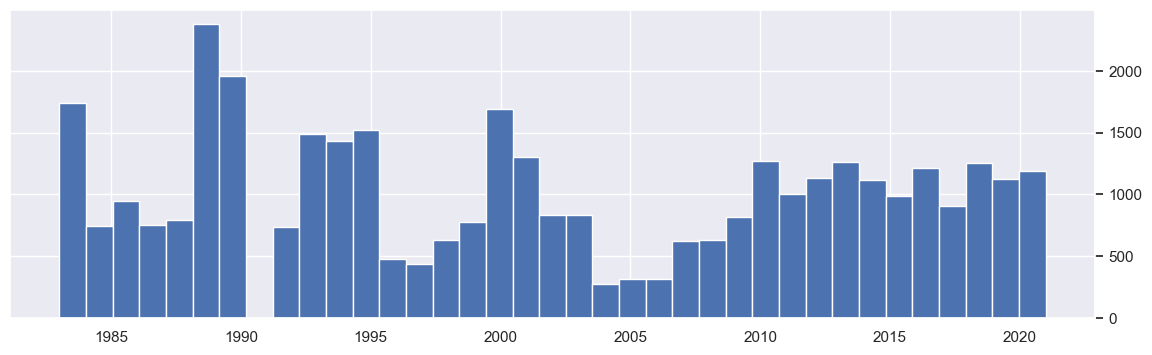


------------------------------------------------
Time Series:YEAR
NUMERICAL


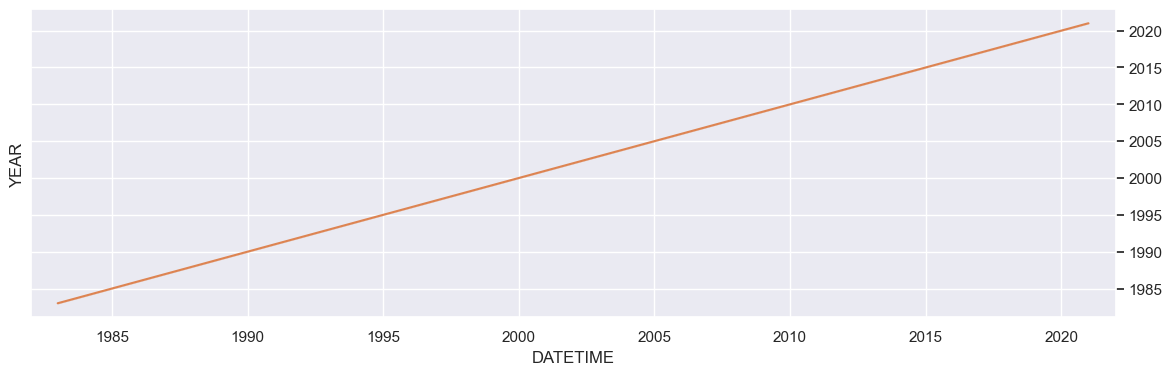


--------------------------------------------------
Data Info: MM 

UNIQUE numbers, strings, blanks, null = (4, 0, 0, 0)
number of numeric = 36912
number of strings = 0
number of blanks = 0
number of null =  0
check:  36912 == 36912

--------------------------------------------------
Histogram: MM


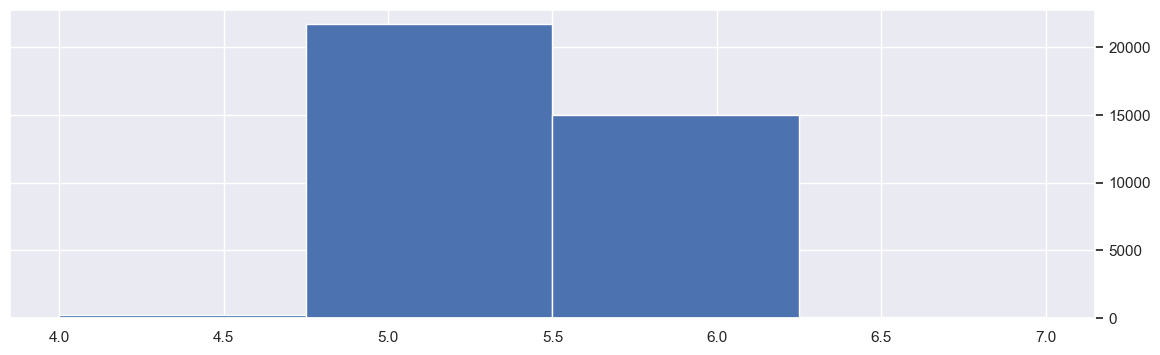


------------------------------------------------
Time Series:MM
NUMERICAL


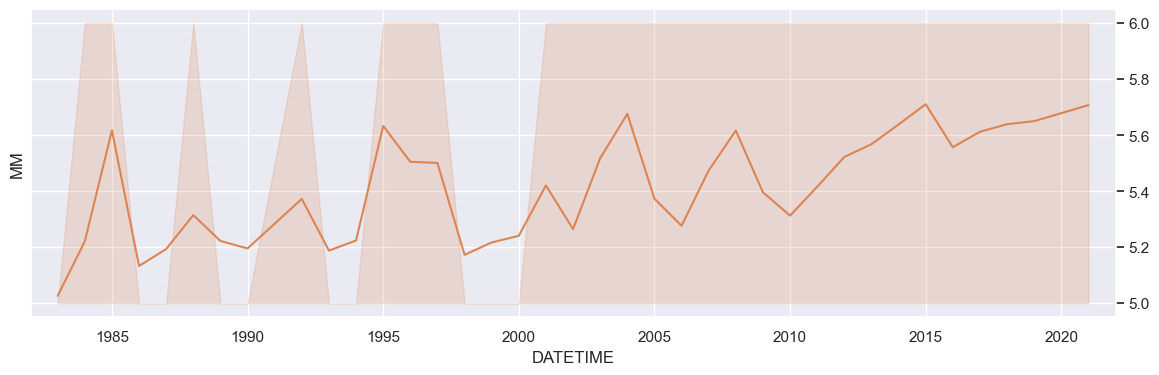


--------------------------------------------------
Data Info: DD 

UNIQUE numbers, strings, blanks, null = (31, 0, 0, 0)
number of numeric = 36912
number of strings = 0
number of blanks = 0
number of null =  0
check:  36912 == 36912

--------------------------------------------------
Histogram: DD


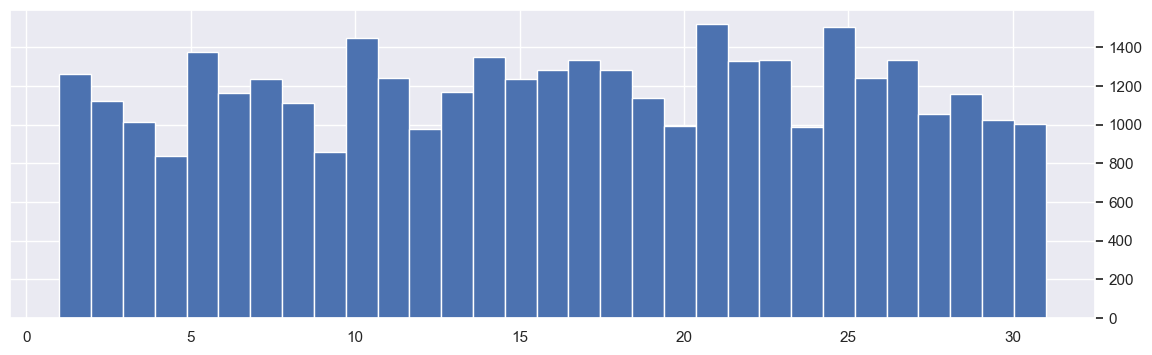


------------------------------------------------
Time Series:DD
NUMERICAL


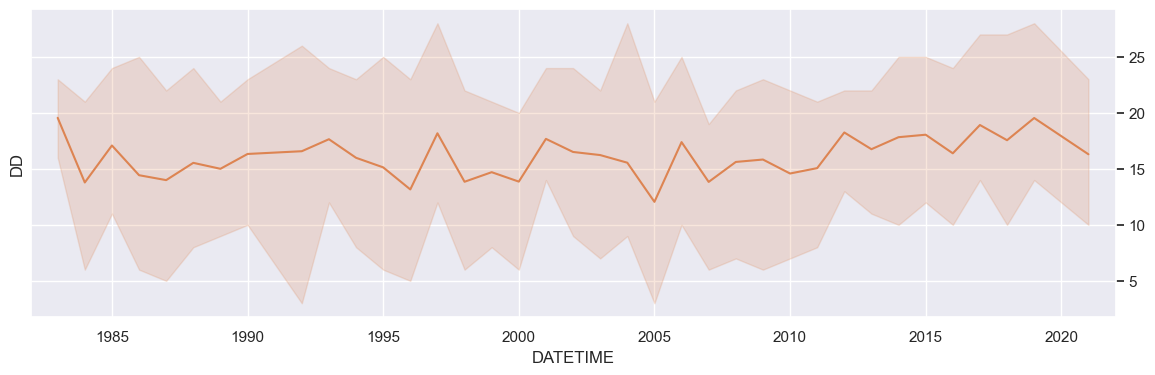


--------------------------------------------------
Data Info: WEEK 

UNIQUE numbers, strings, blanks, null = (10, 0, 0, 1)
number of numeric = 23664
number of strings = 0
number of blanks = 0
number of null =  13248
check:  36912 == 36912

--------------------------------------------------
Histogram: WEEK


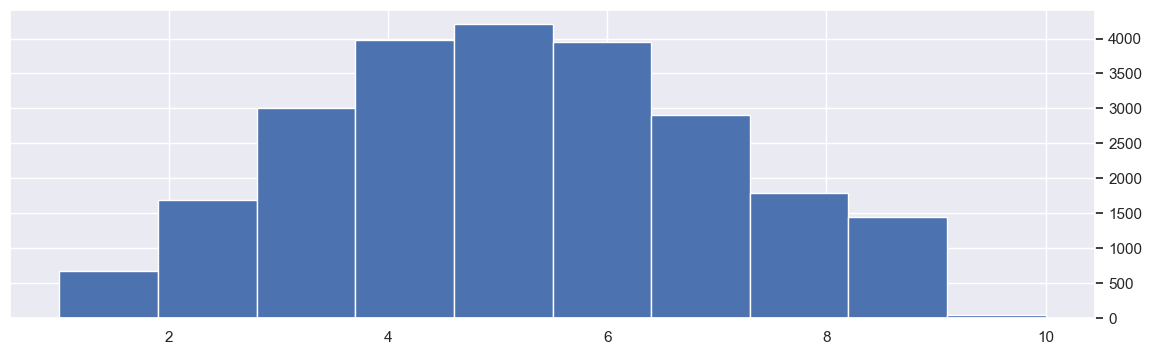


------------------------------------------------
Time Series:WEEK
NUMERICAL


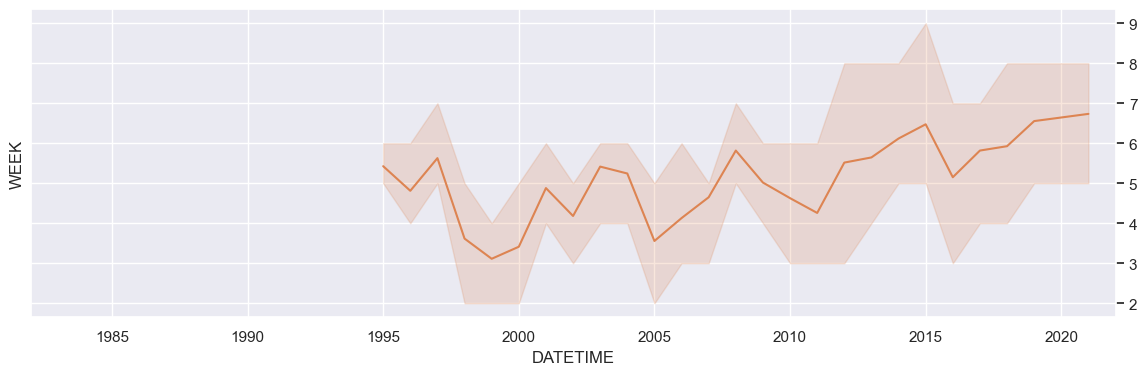


--------------------------------------------------
Data Info: SITE 

UNIQUE numbers, strings, blanks, null = (38, 41, 0, 1)
number of numeric = 34954
number of strings = 1840
number of blanks = 0
number of null =  118
check:  36912 == 36912

--------------------------------------------------
Histogram: SITE


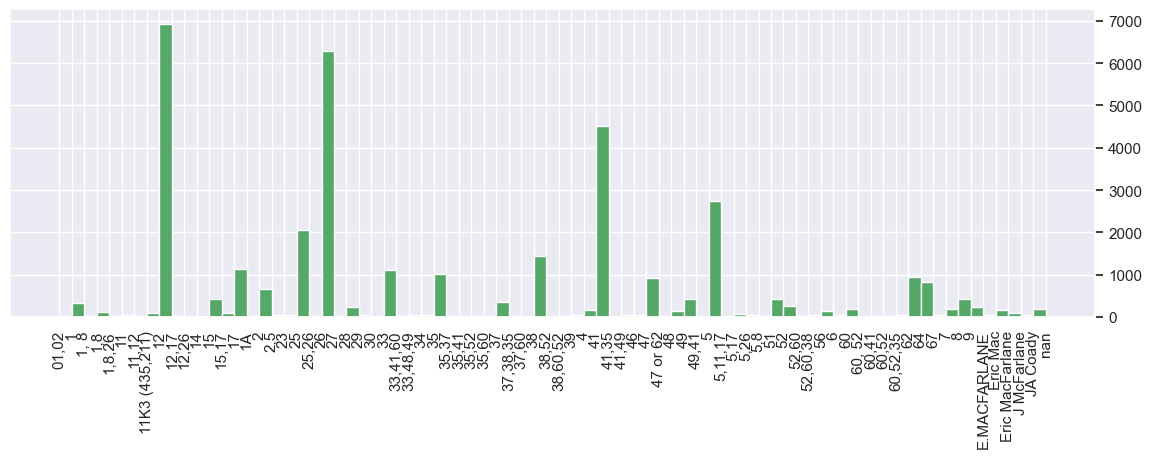


------------------------------------------------
Time Series:SITE
CATEGORICAL


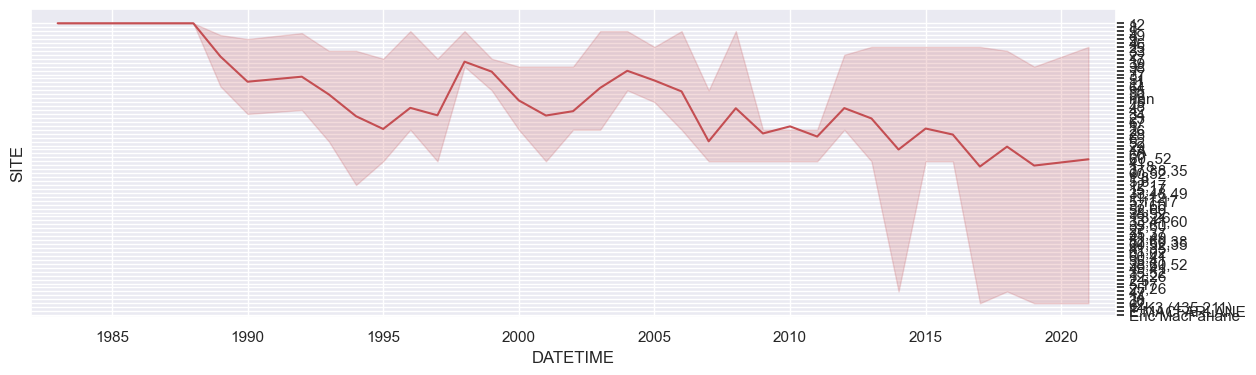


--------------------------------------------------
Data Info: PERIOD 

UNIQUE numbers, strings, blanks, null = (0, 3, 0, 1)
number of numeric = 0
number of strings = 31710
number of blanks = 0
number of null =  5202
check:  36912 == 36912

--------------------------------------------------
Histogram: PERIOD


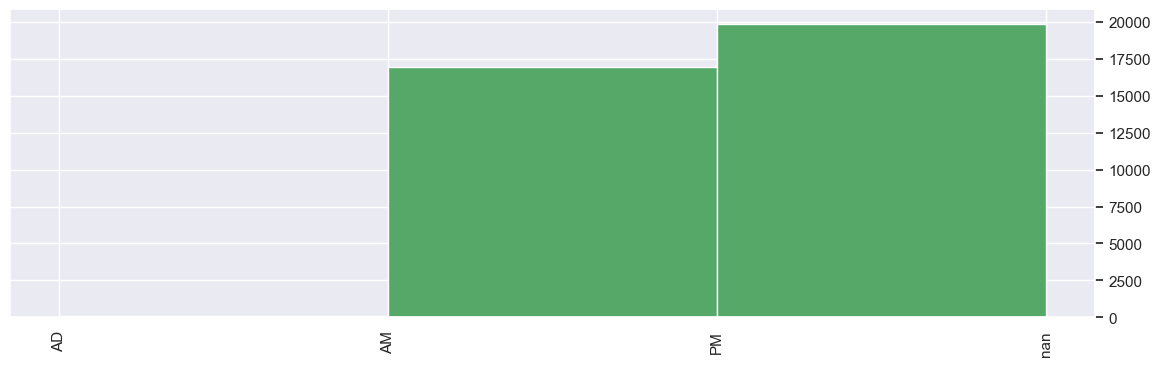


------------------------------------------------
Time Series:PERIOD
CATEGORICAL


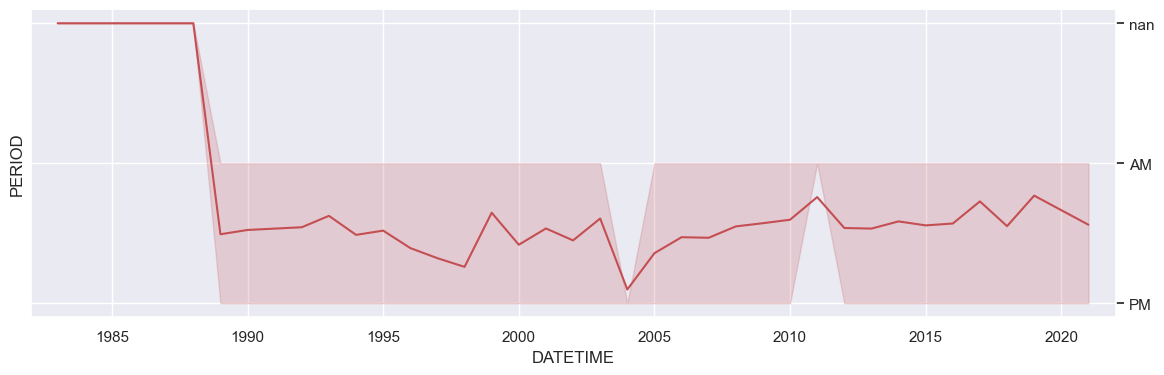


--------------------------------------------------
Data Info: CONDITION 

UNIQUE numbers, strings, blanks, null = (0, 2, 0, 1)
number of numeric = 0
number of strings = 36717
number of blanks = 0
number of null =  195
check:  36912 == 36912

--------------------------------------------------
Histogram: CONDITION


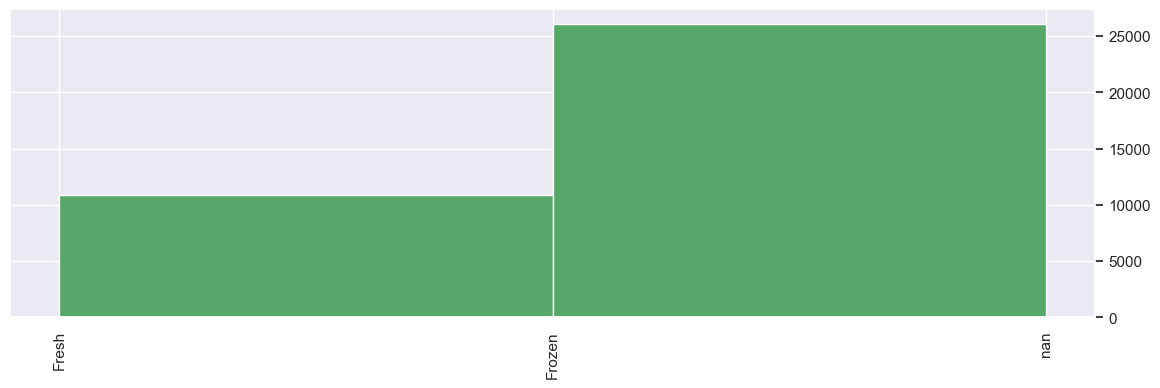


------------------------------------------------
Time Series:CONDITION
CATEGORICAL


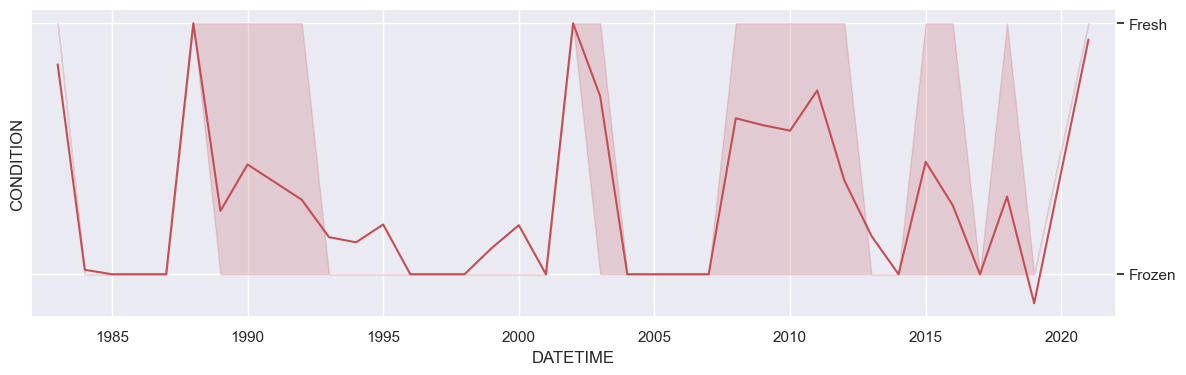


--------------------------------------------------
Data Info: FISH_NO 

UNIQUE numbers, strings, blanks, null = (100, 0, 0, 0)
number of numeric = 36912
number of strings = 0
number of blanks = 0
number of null =  0
check:  36912 == 36912

--------------------------------------------------
Histogram: FISH_NO


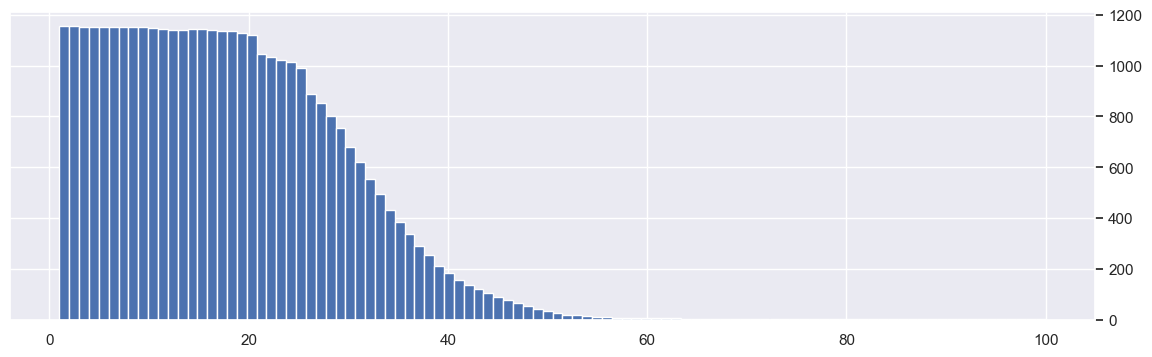


------------------------------------------------
Time Series:FISH_NO
NUMERICAL


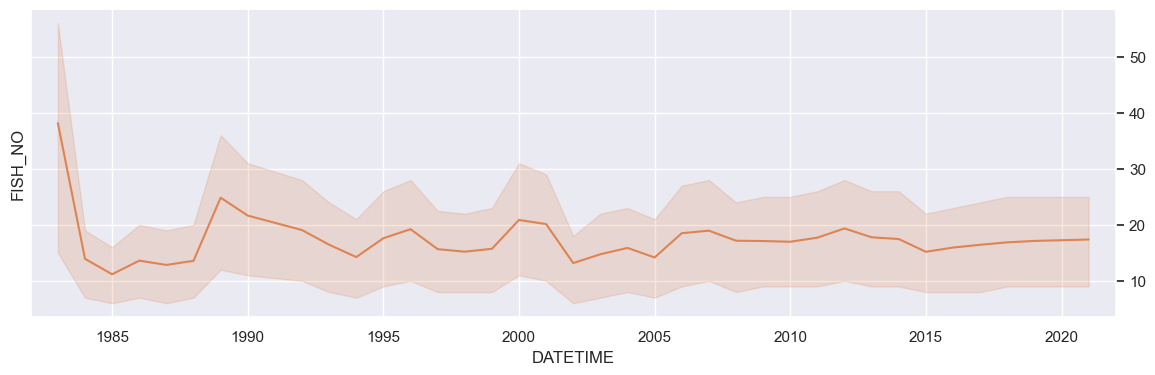


--------------------------------------------------
Data Info: FL_WET 

UNIQUE numbers, strings, blanks, null = (123, 0, 0, 1)
number of numeric = 10853
number of strings = 0
number of blanks = 0
number of null =  26059
check:  36912 == 36912

--------------------------------------------------
Histogram: FL_WET


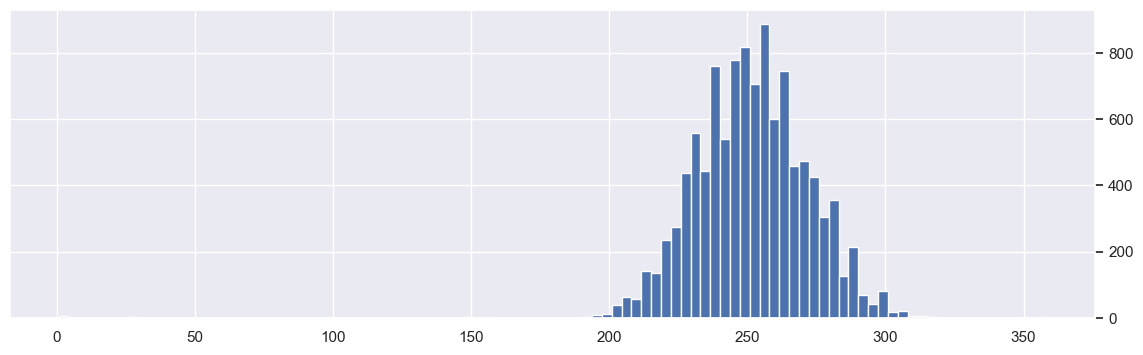


------------------------------------------------
Time Series:FL_WET
NUMERICAL


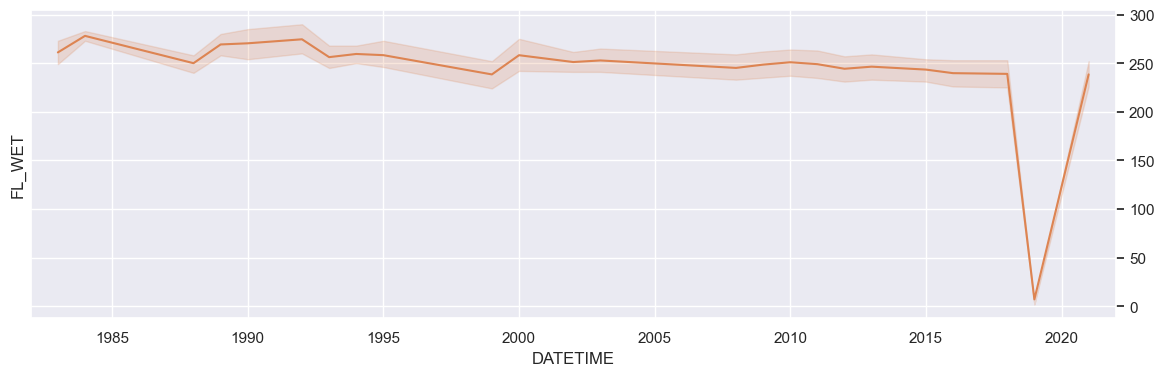


--------------------------------------------------
Data Info: FL_FROZEN 

UNIQUE numbers, strings, blanks, null = (145, 0, 0, 1)
number of numeric = 25595
number of strings = 0
number of blanks = 0
number of null =  11317
check:  36912 == 36912

--------------------------------------------------
Histogram: FL_FROZEN


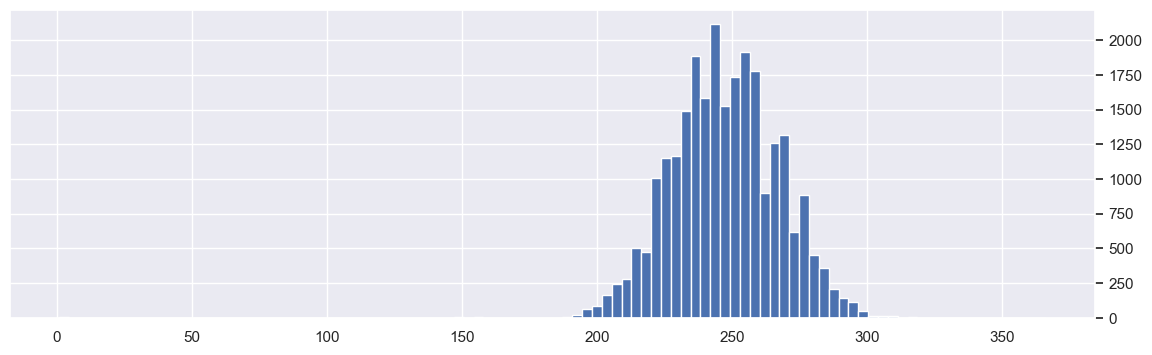


------------------------------------------------
Time Series:FL_FROZEN
NUMERICAL


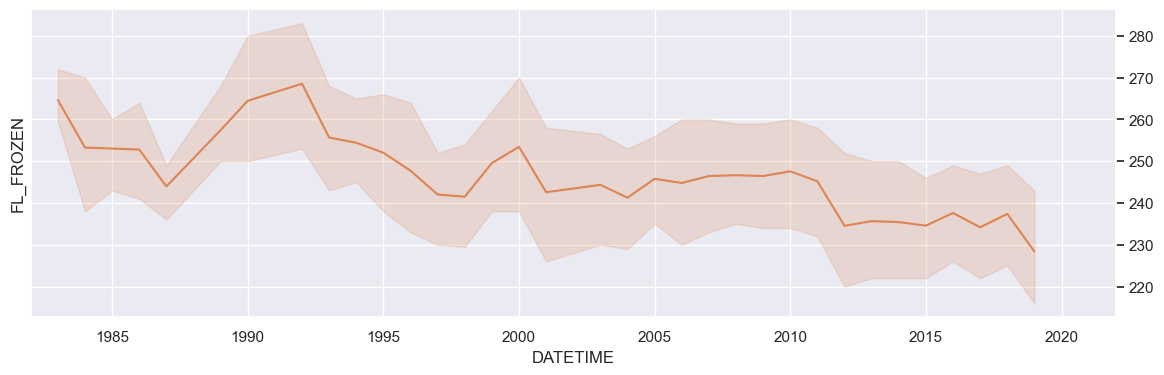


--------------------------------------------------
Data Info: FL_STD 

UNIQUE numbers, strings, blanks, null = (294, 0, 0, 1)
number of numeric = 35245
number of strings = 0
number of blanks = 0
number of null =  1667
check:  36912 == 36912

--------------------------------------------------
Histogram: FL_STD


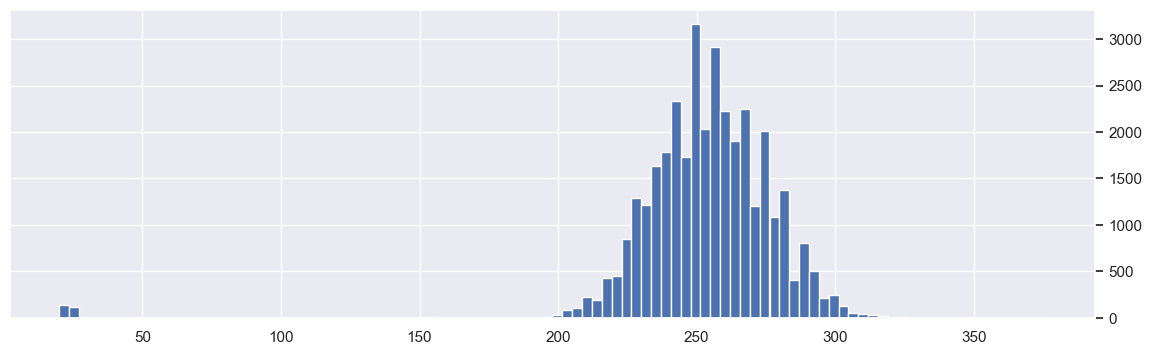


------------------------------------------------
Time Series:FL_STD
NUMERICAL


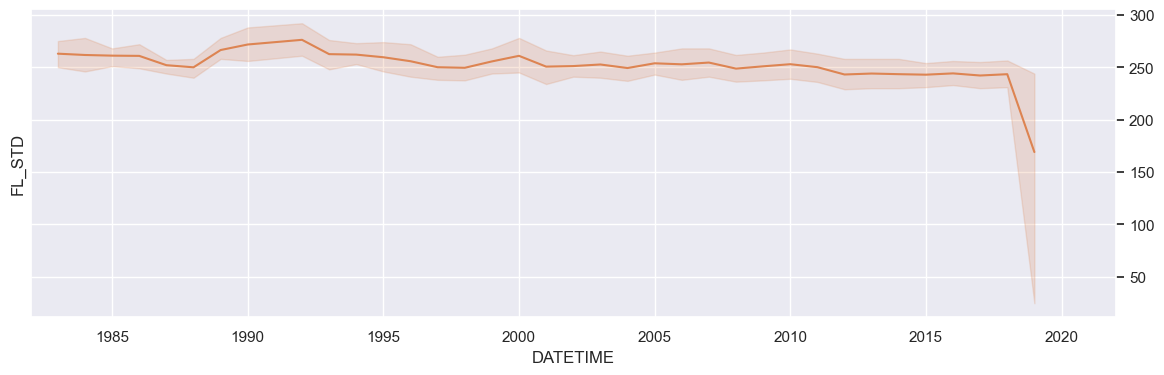


--------------------------------------------------
Data Info: WEIGHT 

UNIQUE numbers, strings, blanks, null = (2718, 0, 0, 1)
number of numeric = 36610
number of strings = 0
number of blanks = 0
number of null =  302
check:  36912 == 36912

--------------------------------------------------
Histogram: WEIGHT


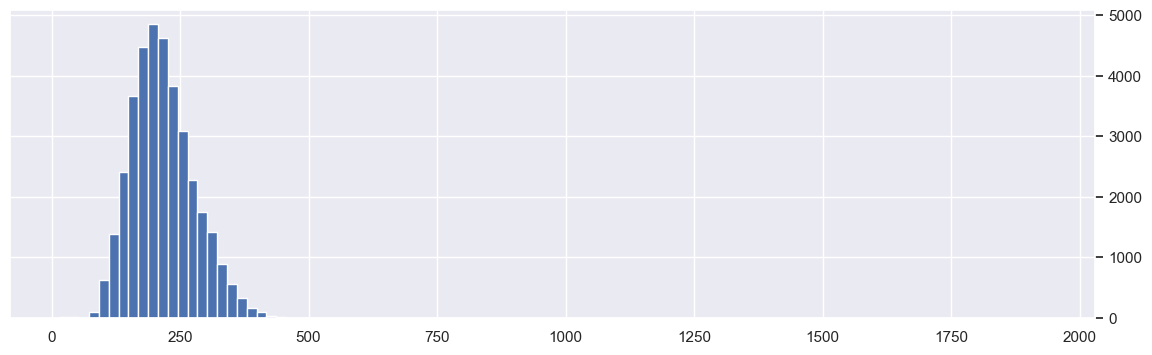


------------------------------------------------
Time Series:WEIGHT
NUMERICAL


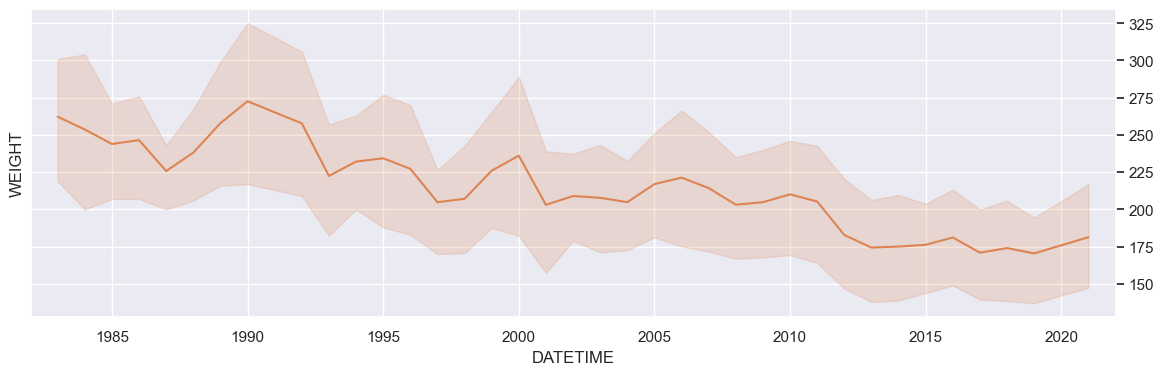


--------------------------------------------------
Data Info: SPECIES 

UNIQUE numbers, strings, blanks, null = (0, 3, 0, 1)
number of numeric = 0
number of strings = 36685
number of blanks = 0
number of null =  227
check:  36912 == 36912

--------------------------------------------------
Histogram: SPECIES


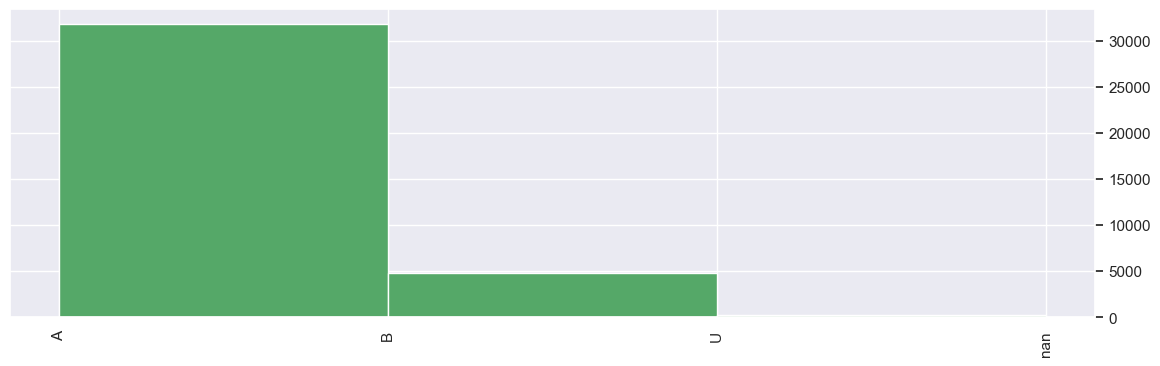


------------------------------------------------
Time Series:SPECIES
CATEGORICAL


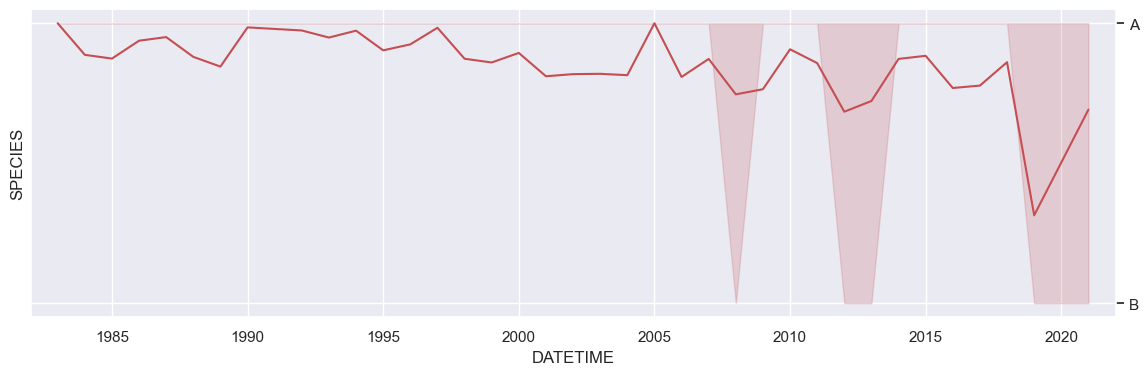


--------------------------------------------------
Data Info: SEX 

UNIQUE numbers, strings, blanks, null = (0, 5, 0, 1)
number of numeric = 0
number of strings = 36685
number of blanks = 0
number of null =  227
check:  36912 == 36912

--------------------------------------------------
Histogram: SEX


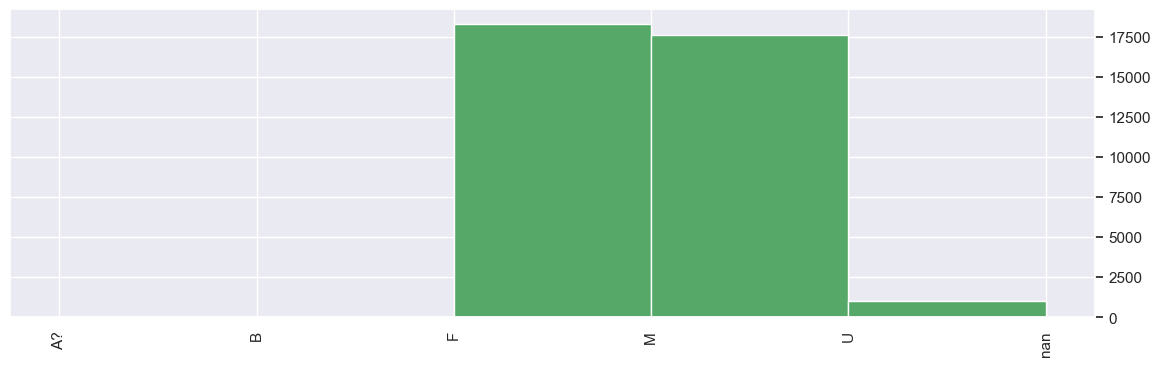


------------------------------------------------
Time Series:SEX
CATEGORICAL


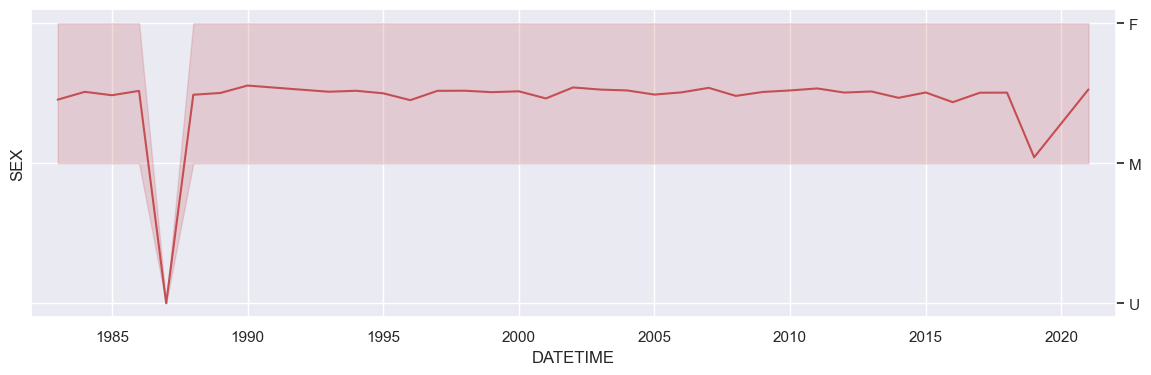


--------------------------------------------------
Data Info: MATURITY 

UNIQUE numbers, strings, blanks, null = (8, 0, 0, 1)
number of numeric = 36286
number of strings = 0
number of blanks = 0
number of null =  626
check:  36912 == 36912

--------------------------------------------------
Histogram: MATURITY


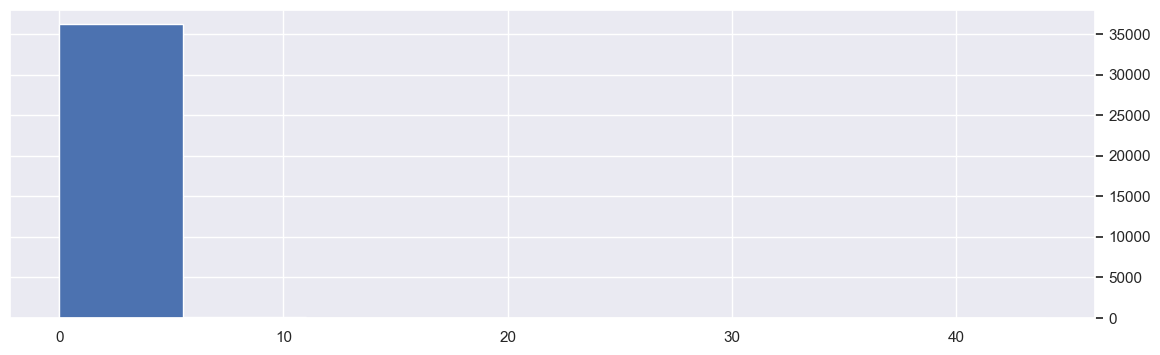


------------------------------------------------
Time Series:MATURITY
NUMERICAL


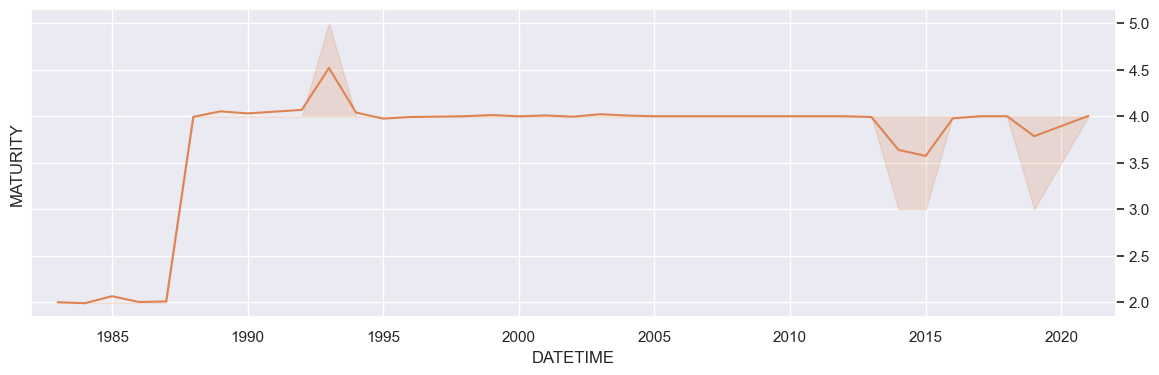


--------------------------------------------------
Data Info: GONAD_WEIGHT 

UNIQUE numbers, strings, blanks, null = (809, 0, 0, 1)
number of numeric = 17940
number of strings = 0
number of blanks = 0
number of null =  18972
check:  36912 == 36912

--------------------------------------------------
Histogram: GONAD_WEIGHT


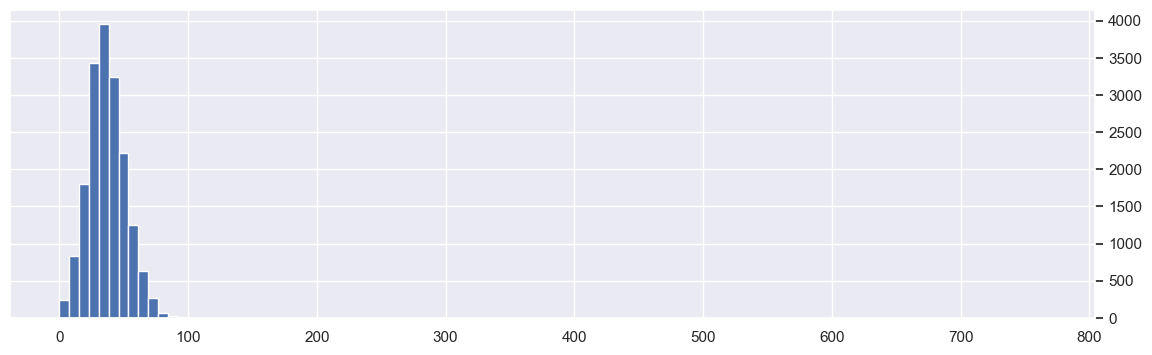


------------------------------------------------
Time Series:GONAD_WEIGHT
NUMERICAL


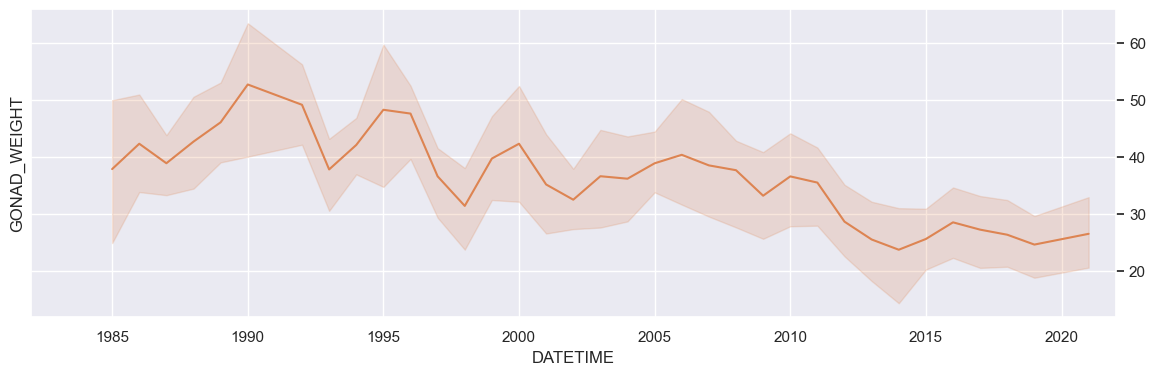


--------------------------------------------------
Data Info: AGER_1 

UNIQUE numbers, strings, blanks, null = (0, 1, 0, 1)
number of numeric = 0
number of strings = 7118
number of blanks = 0
number of null =  29794
check:  36912 == 36912

--------------------------------------------------
Histogram: AGER_1


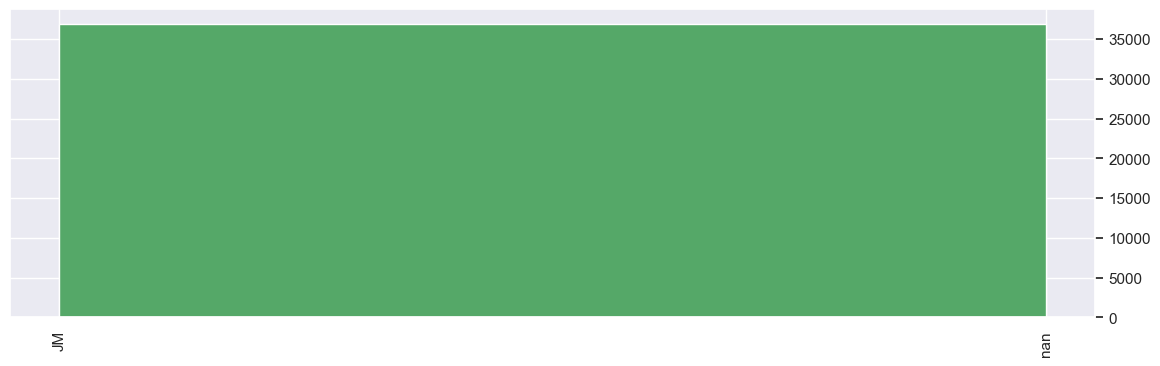


------------------------------------------------
Time Series:AGER_1
CATEGORICAL


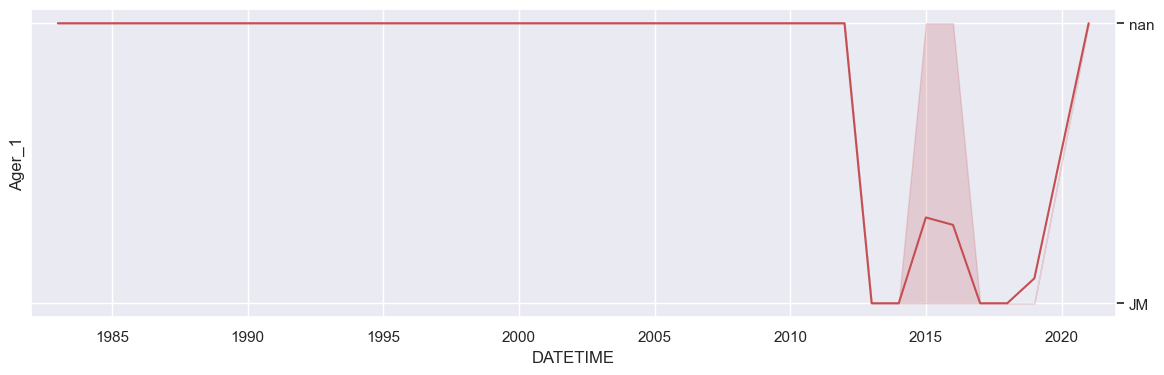


--------------------------------------------------
Data Info: AGE_1 

UNIQUE numbers, strings, blanks, null = (11, 0, 0, 1)
number of numeric = 31480
number of strings = 0
number of blanks = 0
number of null =  5432
check:  36912 == 36912

--------------------------------------------------
Histogram: AGE_1


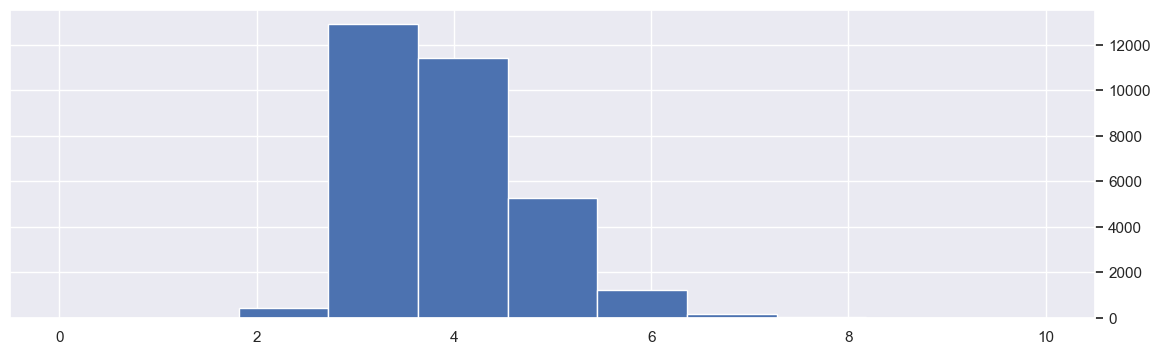


------------------------------------------------
Time Series:AGE_1
NUMERICAL


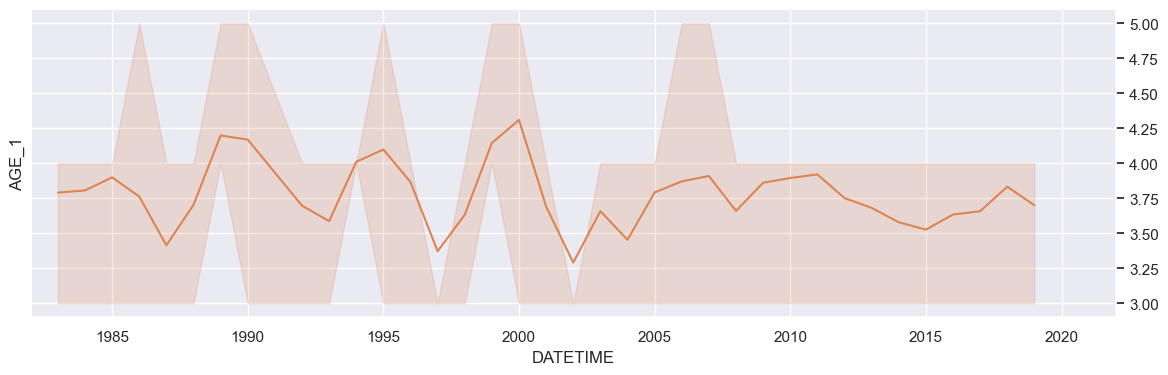


--------------------------------------------------
Data Info: FSP_1 

UNIQUE numbers, strings, blanks, null = (10, 0, 0, 1)
number of numeric = 31257
number of strings = 0
number of blanks = 0
number of null =  5655
check:  36912 == 36912

--------------------------------------------------
Histogram: FSP_1


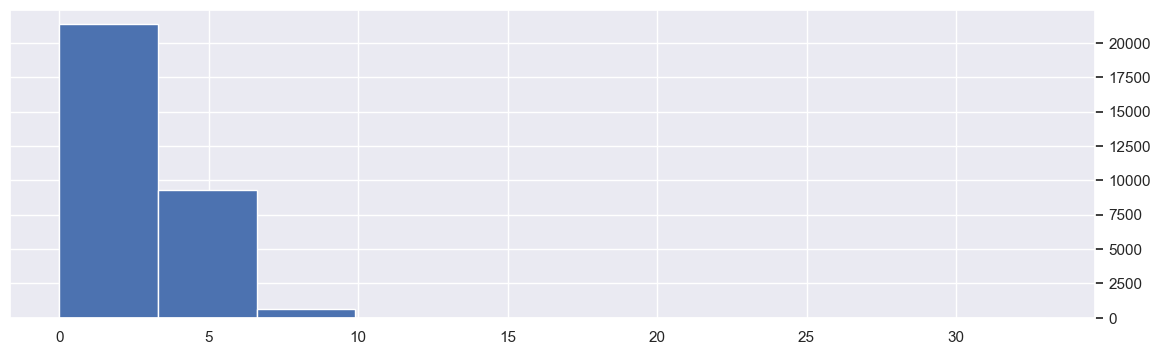


------------------------------------------------
Time Series:FSP_1
NUMERICAL


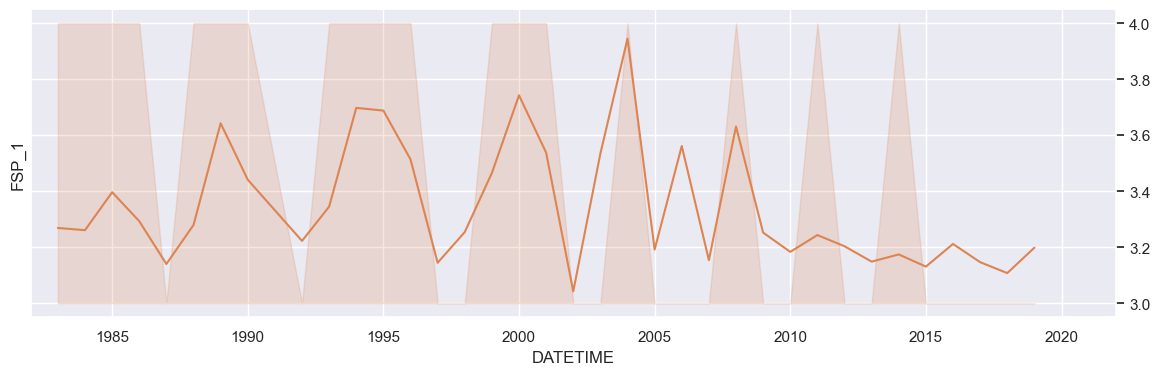


--------------------------------------------------
Data Info: AGER_2 

UNIQUE numbers, strings, blanks, null = (0, 1, 0, 1)
number of numeric = 0
number of strings = 1683
number of blanks = 0
number of null =  35229
check:  36912 == 36912

--------------------------------------------------
Histogram: AGER_2


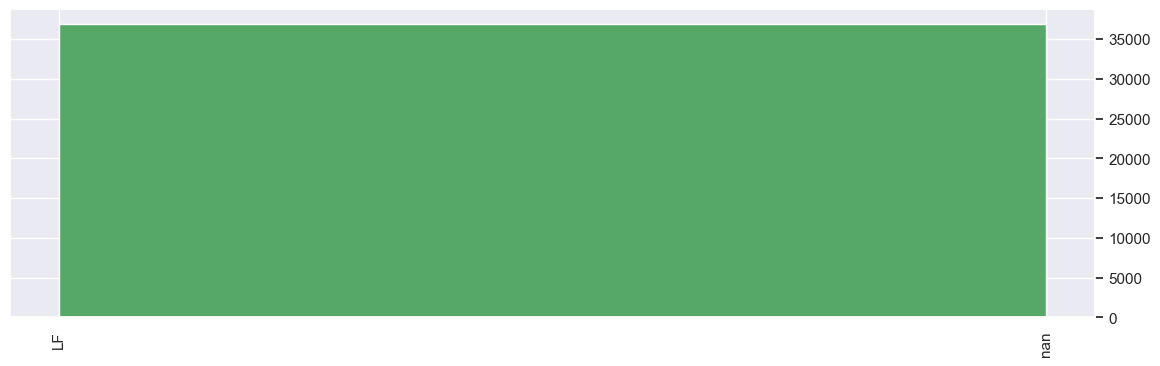


------------------------------------------------
Time Series:AGER_2
CATEGORICAL


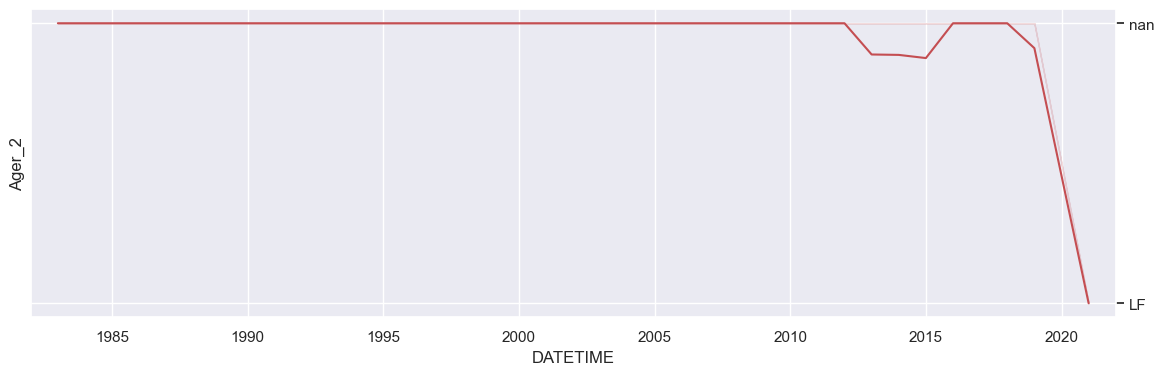


--------------------------------------------------
Data Info: AGE_2 

UNIQUE numbers, strings, blanks, null = (7, 0, 0, 1)
number of numeric = 1629
number of strings = 0
number of blanks = 0
number of null =  35283
check:  36912 == 36912

--------------------------------------------------
Histogram: AGE_2


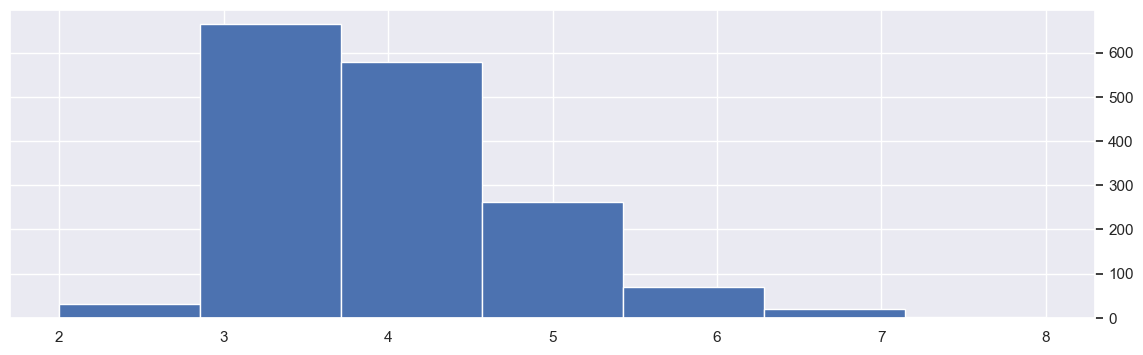


------------------------------------------------
Time Series:AGE_2
NUMERICAL


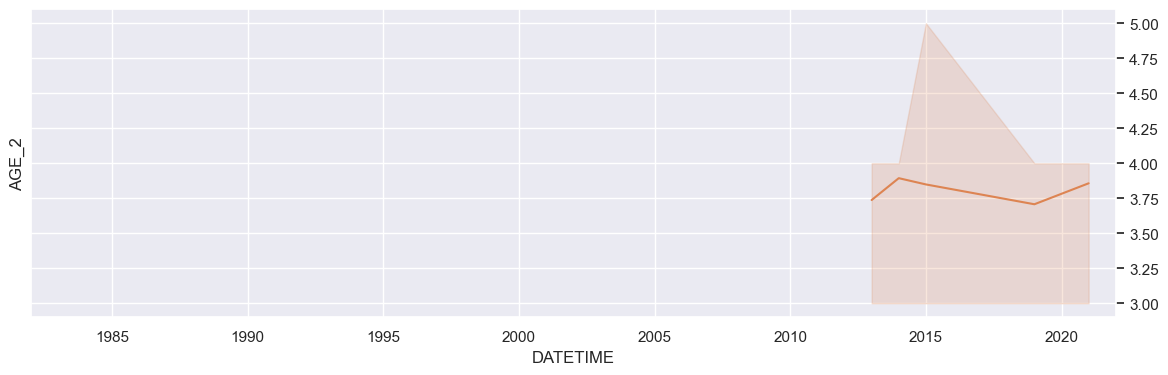


--------------------------------------------------
Data Info: FSP_2 

UNIQUE numbers, strings, blanks, null = (4, 0, 0, 1)
number of numeric = 1629
number of strings = 0
number of blanks = 0
number of null =  35283
check:  36912 == 36912

--------------------------------------------------
Histogram: FSP_2


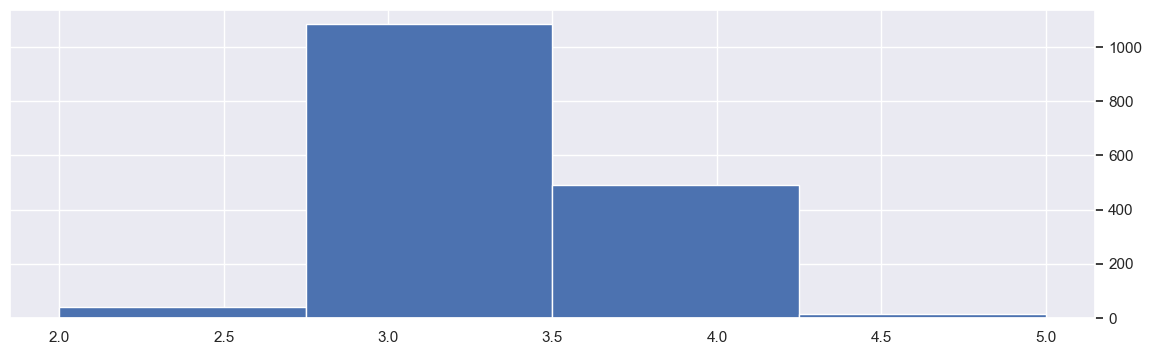


------------------------------------------------
Time Series:FSP_2
NUMERICAL


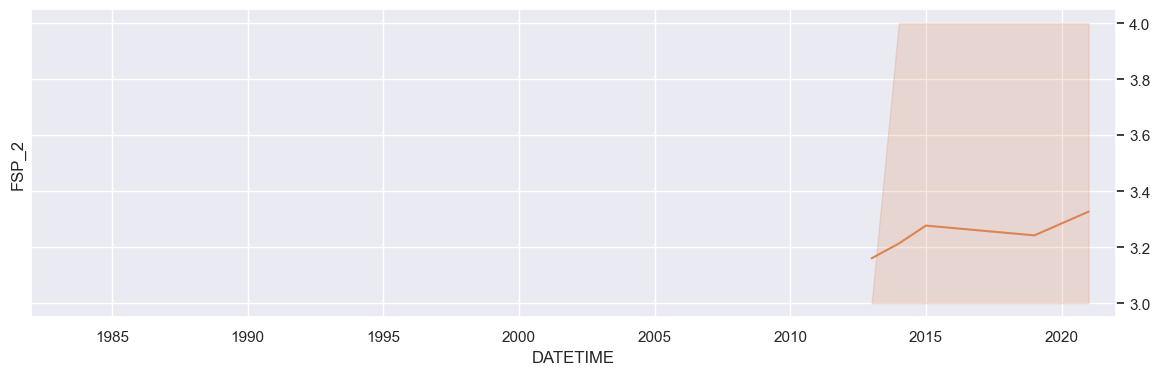


--------------------------------------------------
Data Info: AGER_3 

UNIQUE numbers, strings, blanks, null = (0, 1, 0, 1)
number of numeric = 0
number of strings = 2220
number of blanks = 0
number of null =  34692
check:  36912 == 36912

--------------------------------------------------
Histogram: AGER_3


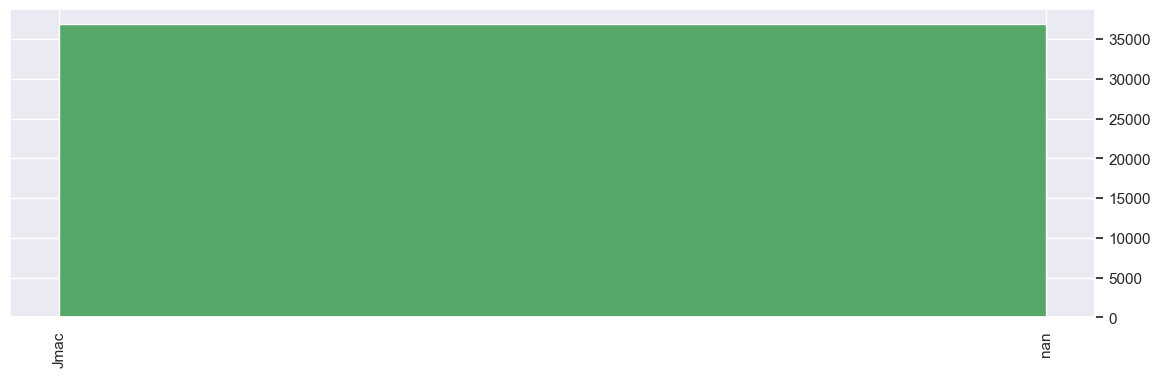


------------------------------------------------
Time Series:AGER_3
CATEGORICAL


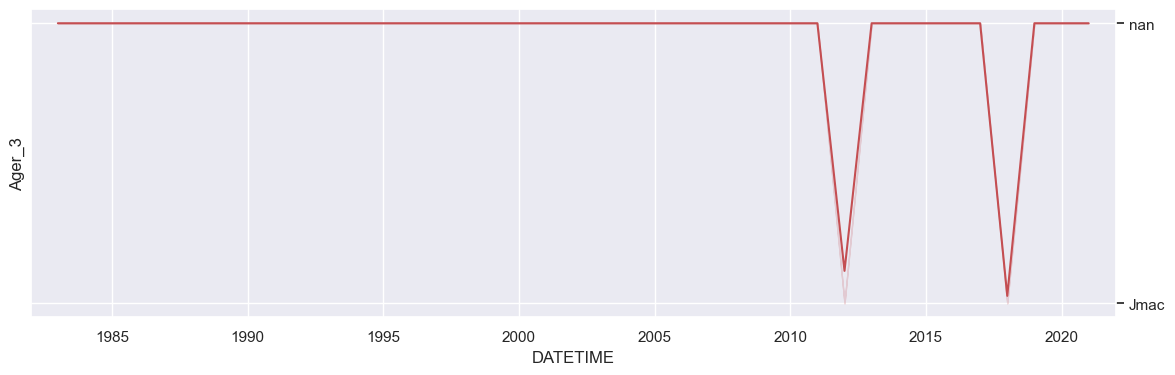


--------------------------------------------------
Data Info: AGE_3 

UNIQUE numbers, strings, blanks, null = (7, 0, 0, 1)
number of numeric = 2044
number of strings = 0
number of blanks = 0
number of null =  34868
check:  36912 == 36912

--------------------------------------------------
Histogram: AGE_3


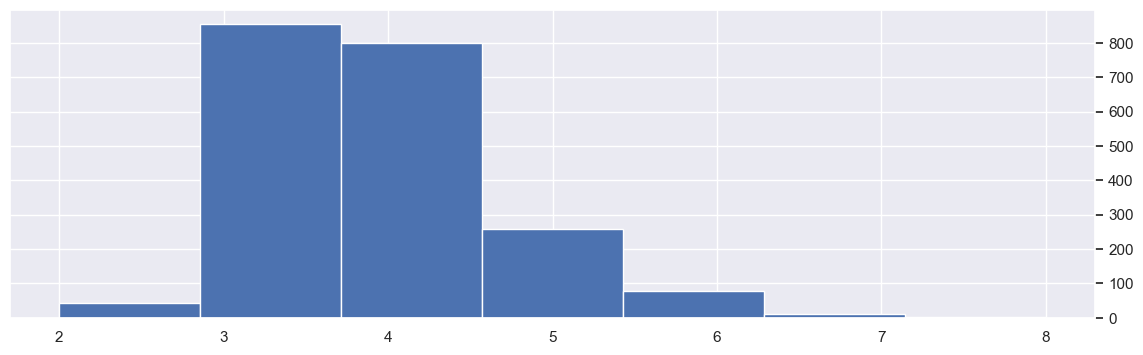


------------------------------------------------
Time Series:AGE_3
NUMERICAL


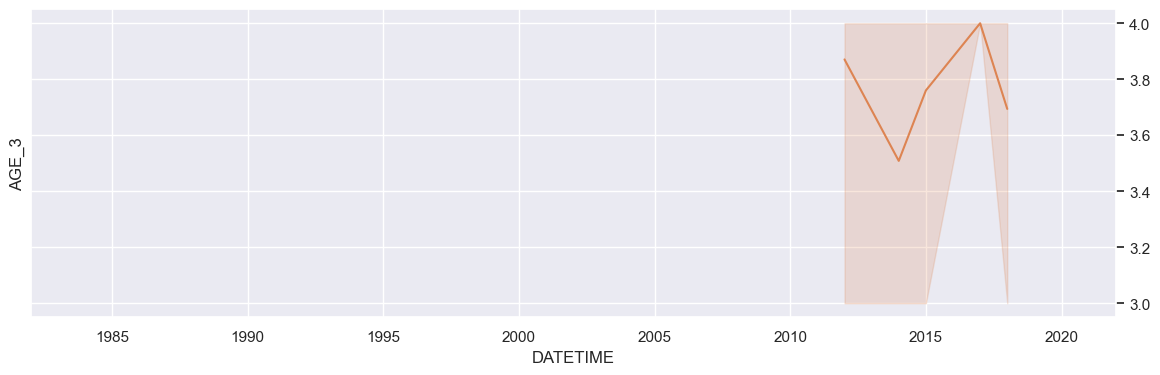


--------------------------------------------------
Data Info: FSP_3 

UNIQUE numbers, strings, blanks, null = (5, 0, 0, 1)
number of numeric = 2043
number of strings = 0
number of blanks = 0
number of null =  34869
check:  36912 == 36912

--------------------------------------------------
Histogram: FSP_3


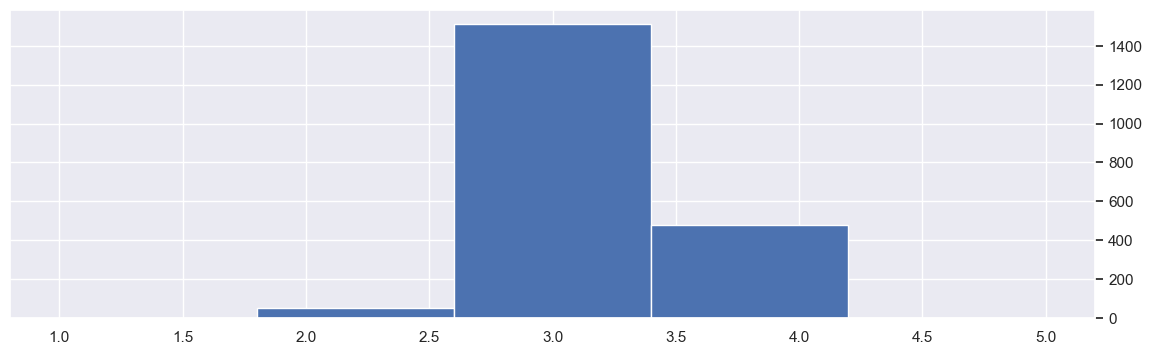


------------------------------------------------
Time Series:FSP_3
NUMERICAL


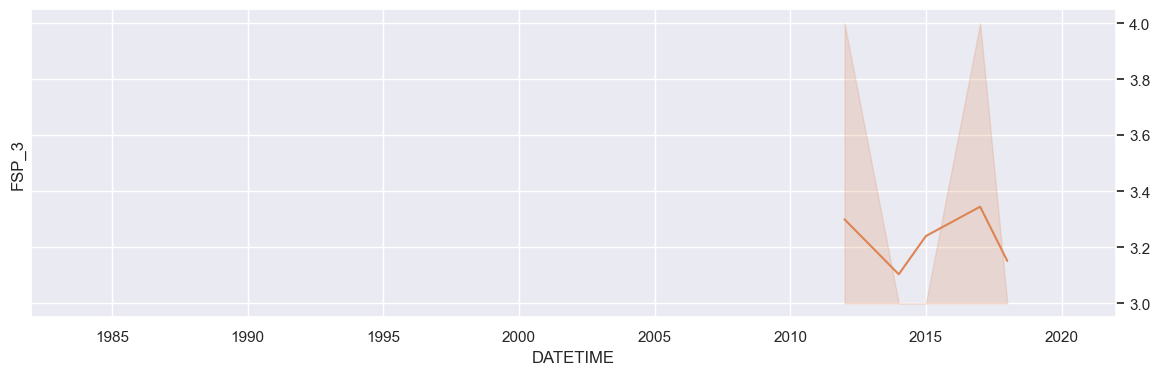


--------------------------------------------------
Data Info: AGE_NOTES_1 

UNIQUE numbers, strings, blanks, null = (11, 13, 0, 1)
number of numeric = 31480
number of strings = 88
number of blanks = 0
number of null =  5344
check:  36912 == 36912

--------------------------------------------------
Histogram: AGE_NOTES_1


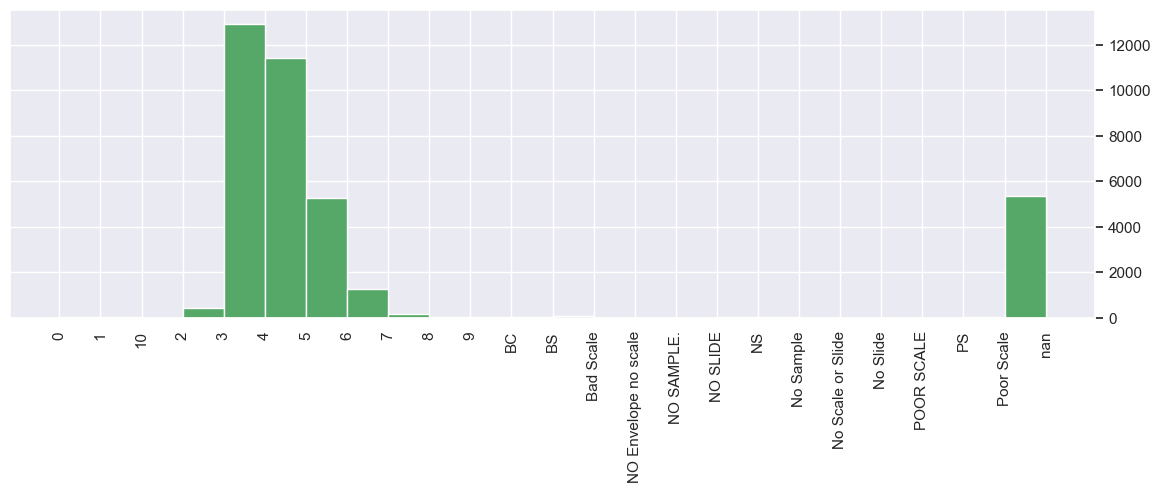


------------------------------------------------
Time Series:AGE_NOTES_1
CATEGORICAL


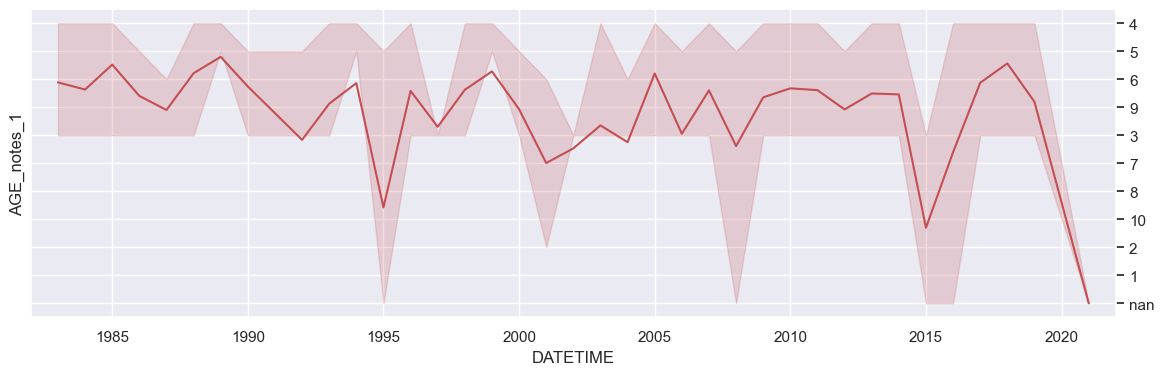


--------------------------------------------------
Data Info: FSP_NOTES_1 

UNIQUE numbers, strings, blanks, null = (10, 16, 1, 1)
number of numeric = 31257
number of strings = 93
number of blanks = 1
number of null =  5562
check:  36912 == 36912

--------------------------------------------------
Histogram: FSP_NOTES_1


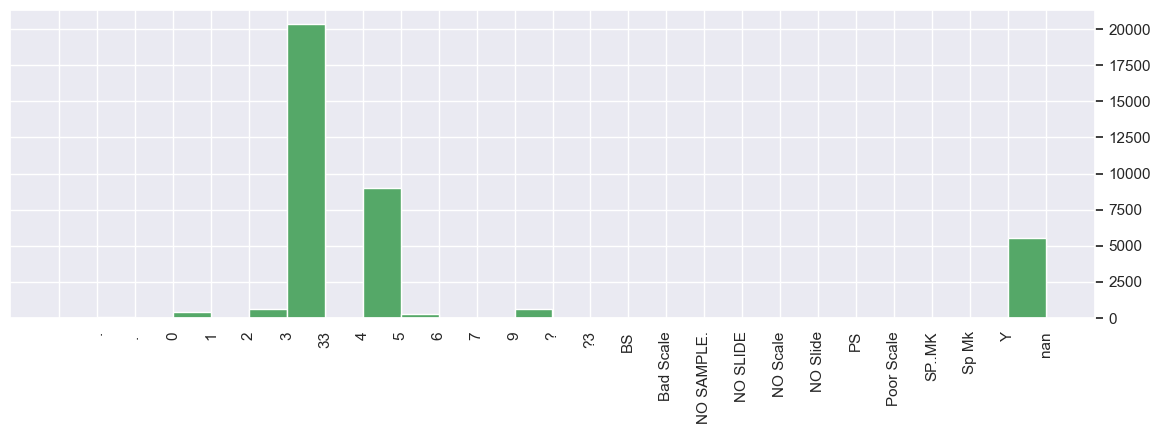


------------------------------------------------
Time Series:FSP_NOTES_1
CATEGORICAL


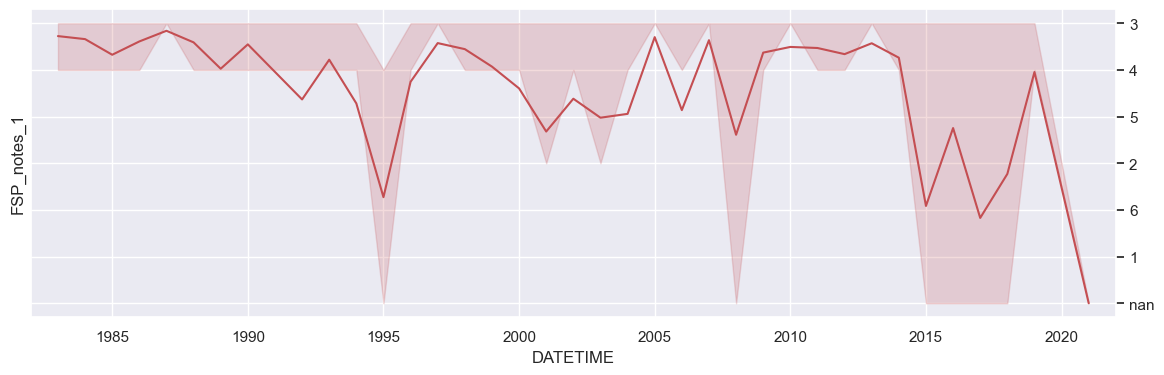


--------------------------------------------------
Data Info: AGE_NOTES_2 

UNIQUE numbers, strings, blanks, null = (7, 1, 0, 1)
number of numeric = 1629
number of strings = 53
number of blanks = 0
number of null =  35230
check:  36912 == 36912

--------------------------------------------------
Histogram: AGE_NOTES_2


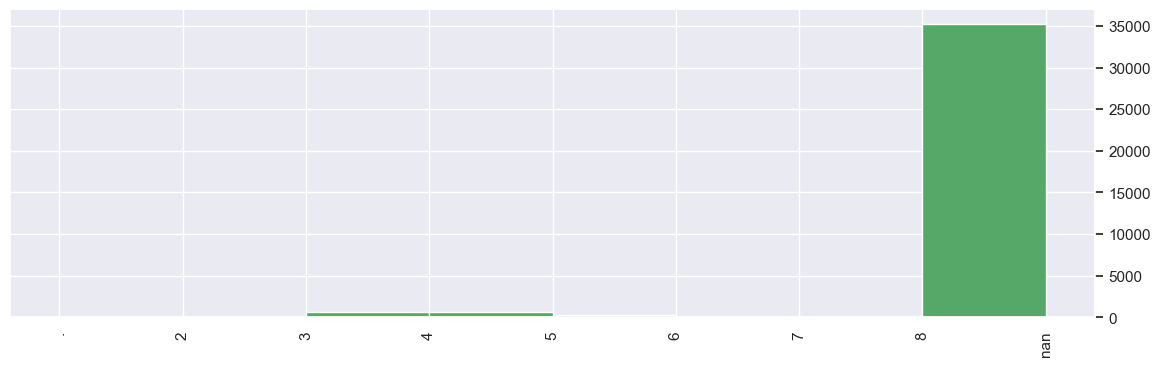


------------------------------------------------
Time Series:AGE_NOTES_2
CATEGORICAL


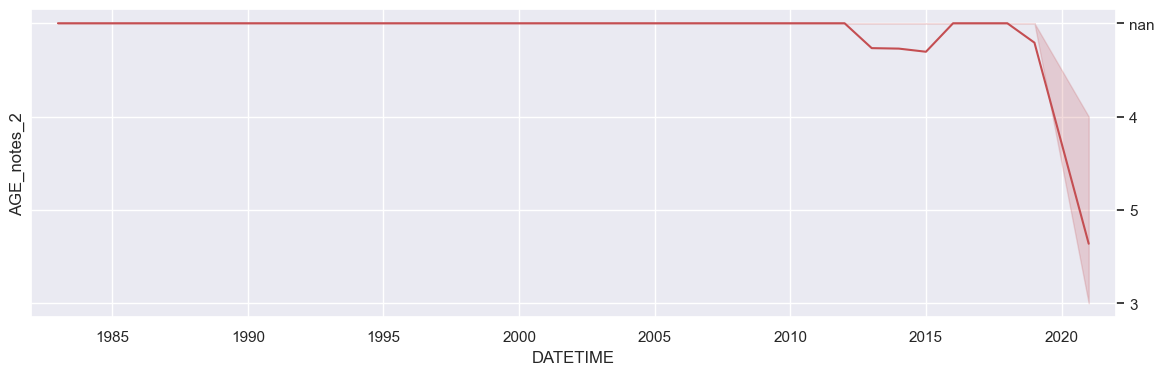


--------------------------------------------------
Data Info: FSP_NOTES_2 

UNIQUE numbers, strings, blanks, null = (4, 1, 0, 1)
number of numeric = 1629
number of strings = 53
number of blanks = 0
number of null =  35230
check:  36912 == 36912

--------------------------------------------------
Histogram: FSP_NOTES_2


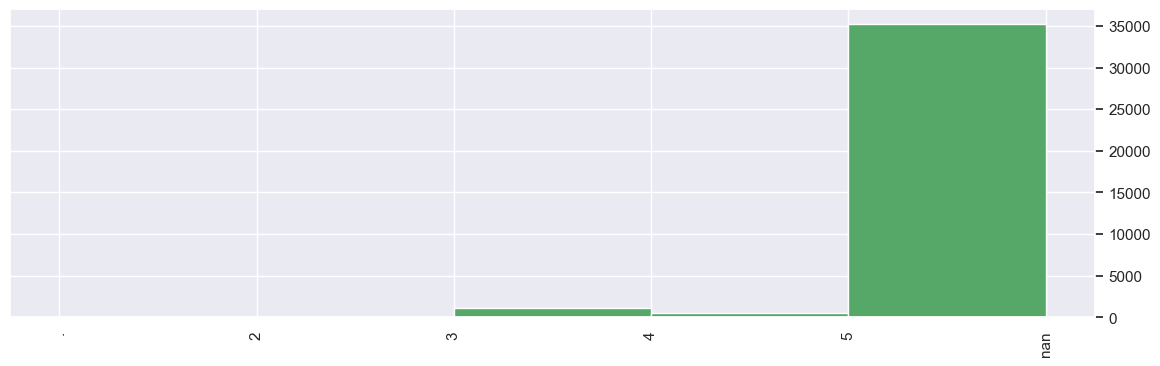


------------------------------------------------
Time Series:FSP_NOTES_2
CATEGORICAL


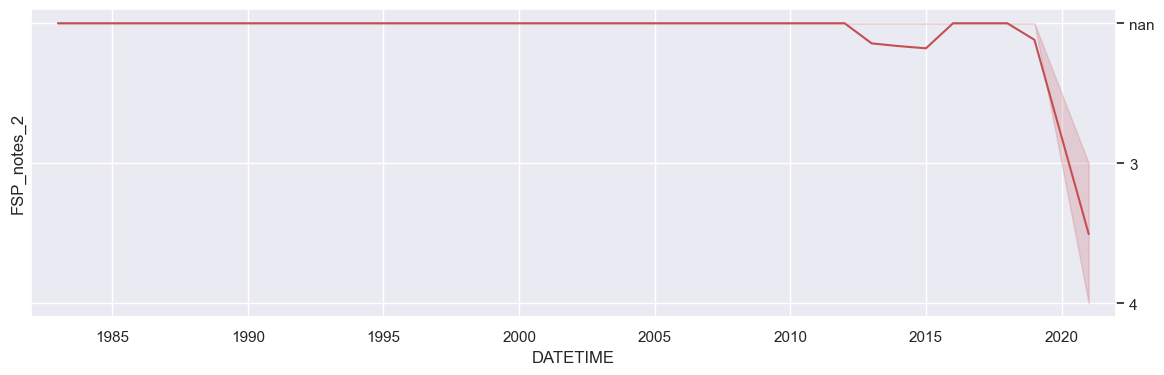


--------------------------------------------------
Data Info: AGE_NOTES_3 

UNIQUE numbers, strings, blanks, null = (7, 0, 0, 1)
number of numeric = 2044
number of strings = 0
number of blanks = 0
number of null =  34868
check:  36912 == 36912

--------------------------------------------------
Histogram: AGE_NOTES_3


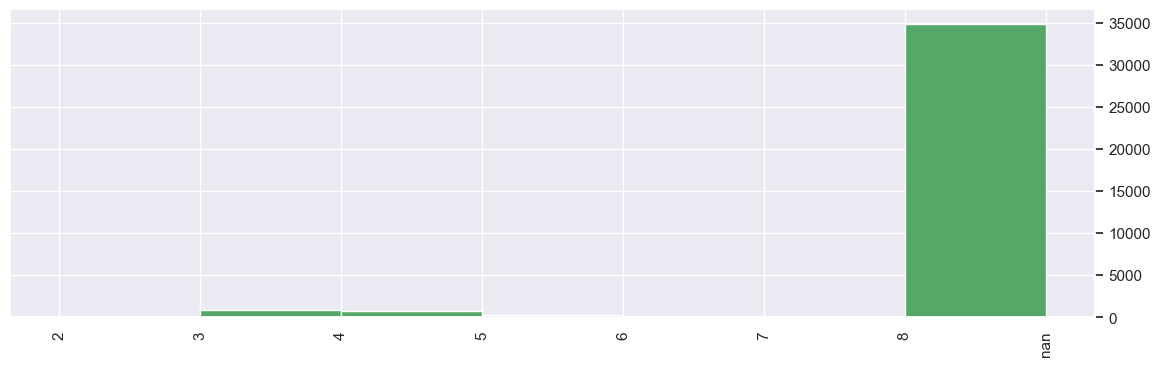


------------------------------------------------
Time Series:AGE_NOTES_3
NUMERICAL


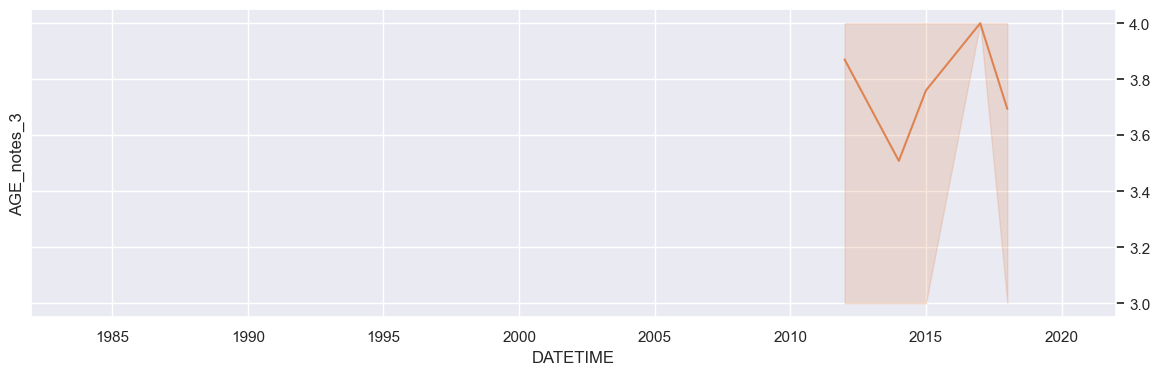


--------------------------------------------------
Data Info: FSP_NOTES_3 

UNIQUE numbers, strings, blanks, null = (5, 0, 0, 1)
number of numeric = 2043
number of strings = 0
number of blanks = 0
number of null =  34869
check:  36912 == 36912

--------------------------------------------------
Histogram: FSP_NOTES_3


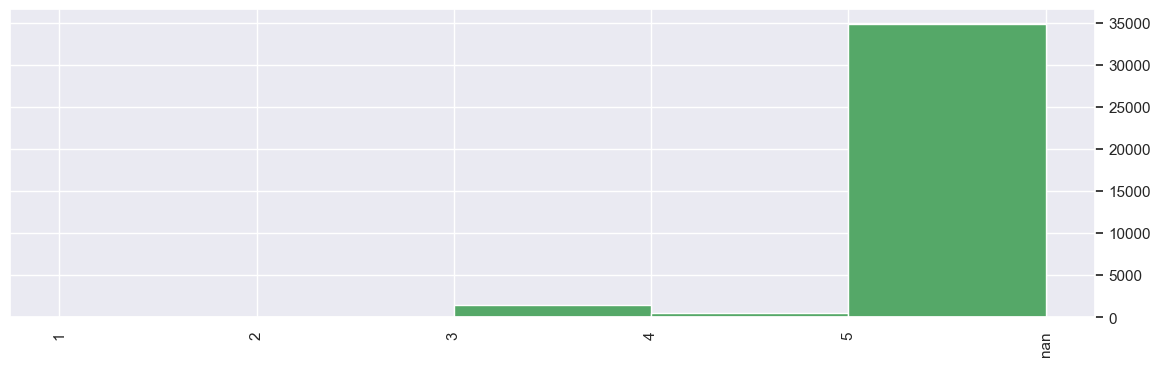


------------------------------------------------
Time Series:FSP_NOTES_3
NUMERICAL


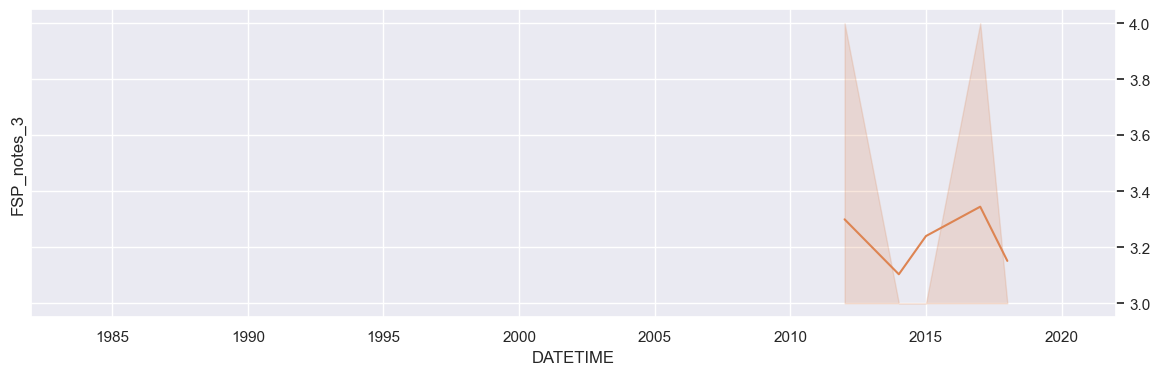


--------------------------------------------------
Data Info: SITE_NOTES 

UNIQUE numbers, strings, blanks, null = (39, 41, 0, 0)
number of numeric = 35072
number of strings = 1840
number of blanks = 0
number of null =  0
check:  36912 == 36912

--------------------------------------------------
Histogram: SITE_NOTES


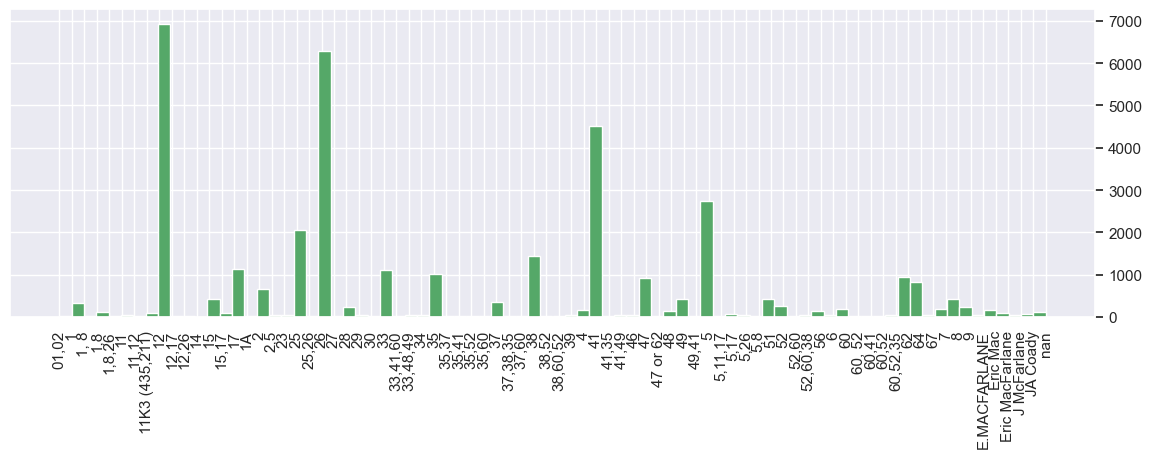


------------------------------------------------
Time Series:SITE_NOTES
CATEGORICAL


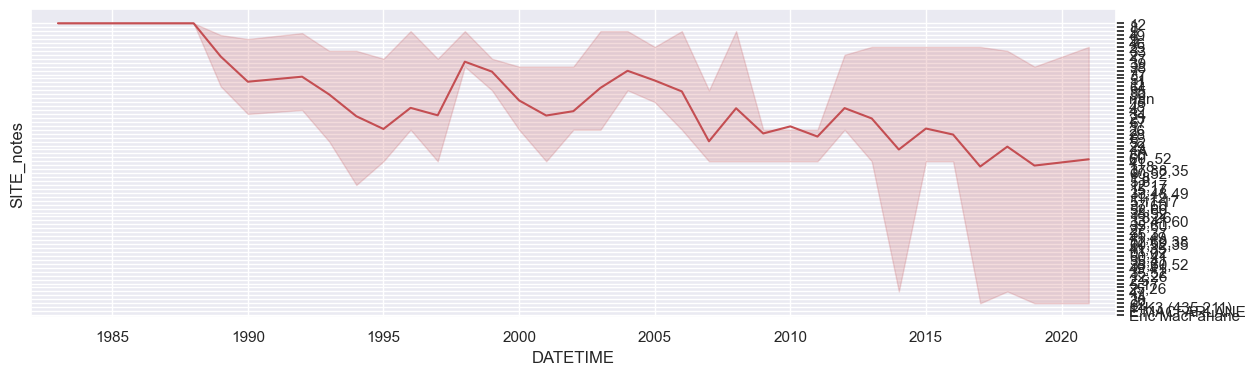


--------------------------------------------------
Data Info: SITE1 

UNIQUE numbers, strings, blanks, null = (43, 0, 0, 1)
number of numeric = 36794
number of strings = 0
number of blanks = 0
number of null =  118
check:  36912 == 36912

--------------------------------------------------
Histogram: SITE1


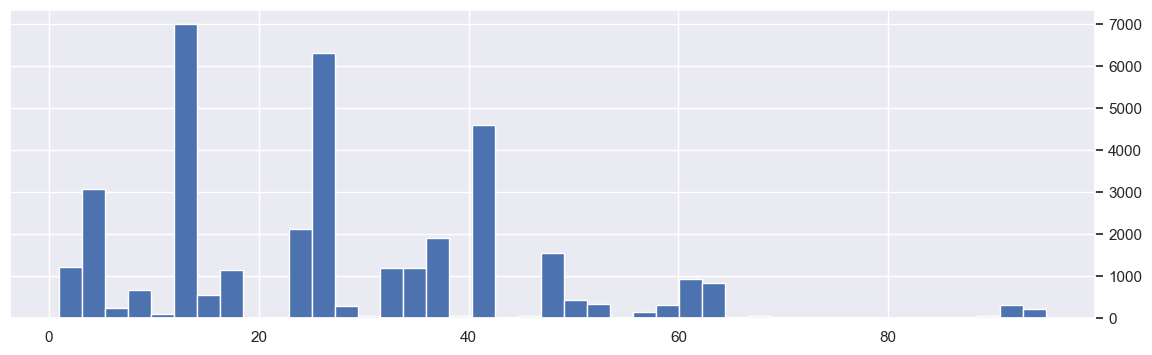


------------------------------------------------
Time Series:SITE1
NUMERICAL


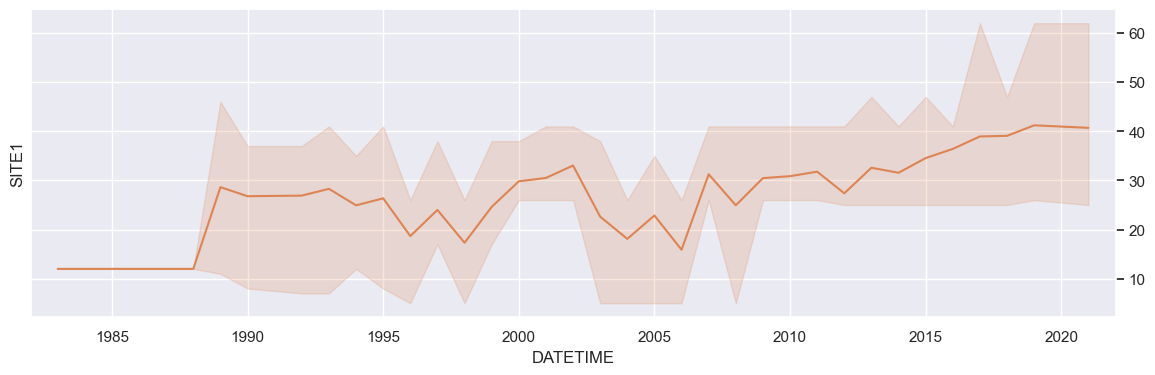


--------------------------------------------------
Data Info: SITE2 

UNIQUE numbers, strings, blanks, null = (15, 1, 0, 1)
number of numeric = 1248
number of strings = 92
number of blanks = 0
number of null =  35572
check:  36912 == 36912

--------------------------------------------------
Histogram: SITE2


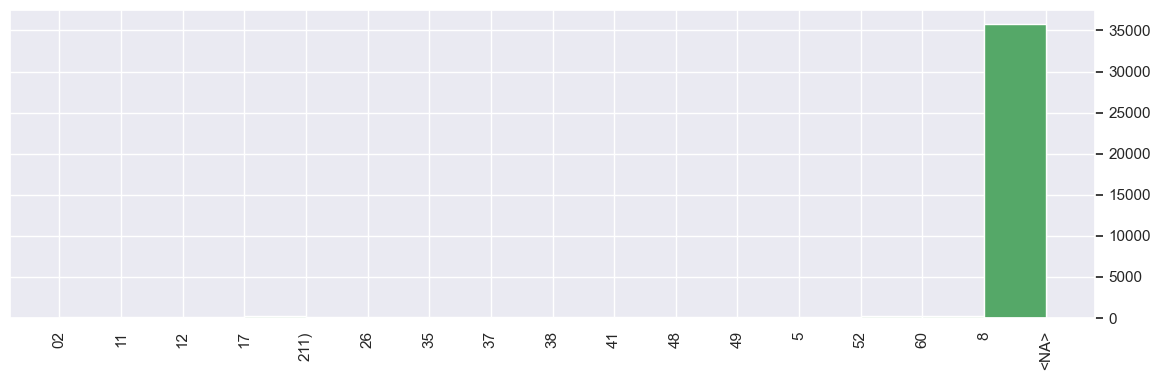


------------------------------------------------
Time Series:SITE2
CATEGORICAL


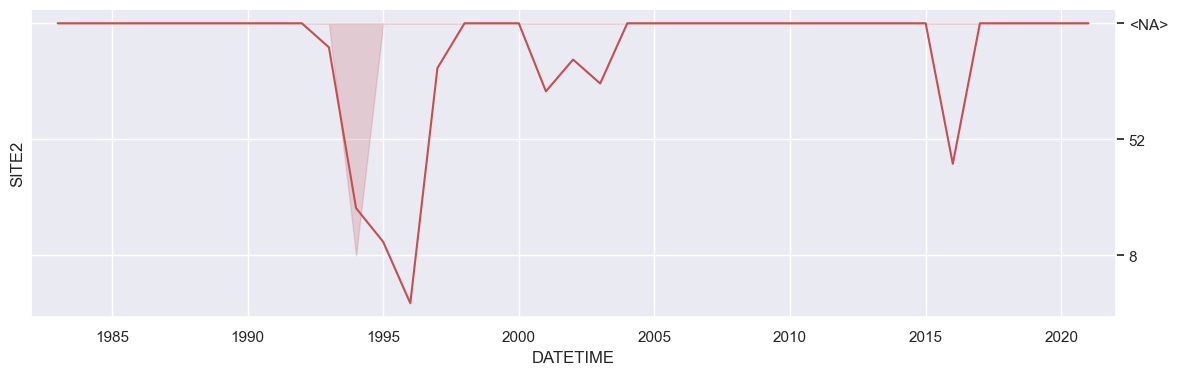


--------------------------------------------------
Data Info: SITE3 

UNIQUE numbers, strings, blanks, null = (7, 0, 0, 1)
number of numeric = 280
number of strings = 0
number of blanks = 0
number of null =  36632
check:  36912 == 36912

--------------------------------------------------
Histogram: SITE3


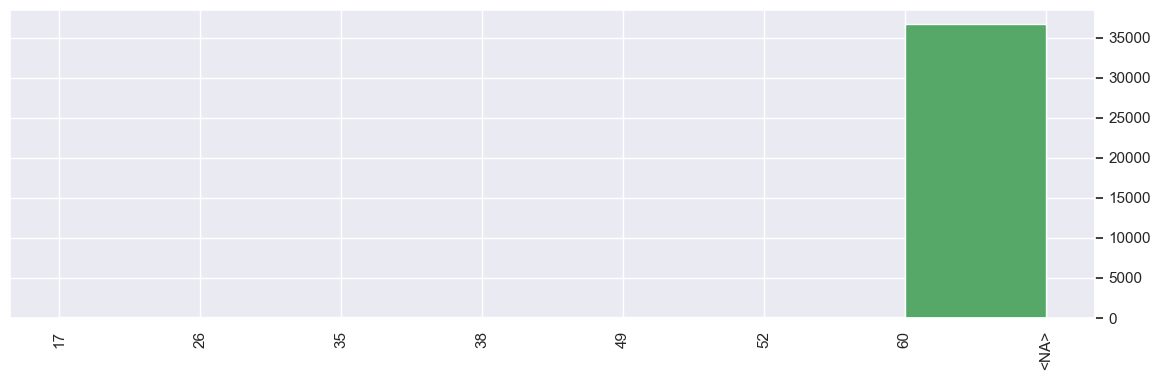


------------------------------------------------
Time Series:SITE3
CATEGORICAL


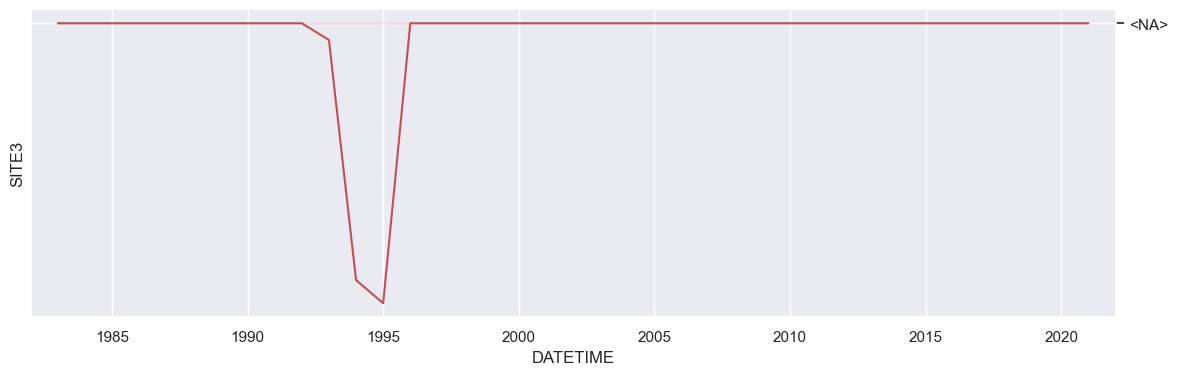


--------------------------------------------------
Data Info: FISH_LENGTH 

UNIQUE numbers, strings, blanks, null = (149, 0, 0, 1)
number of numeric = 36443
number of strings = 0
number of blanks = 0
number of null =  469
check:  36912 == 36912

--------------------------------------------------
Histogram: FISH_LENGTH


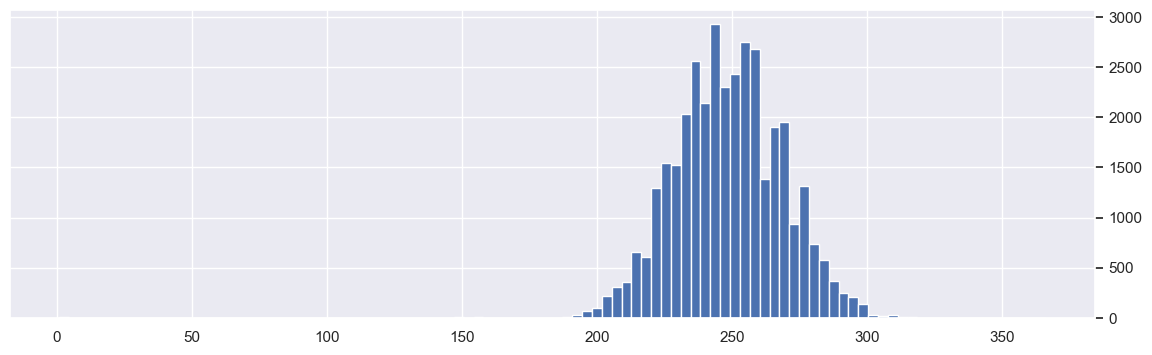


------------------------------------------------
Time Series:FISH_LENGTH
NUMERICAL


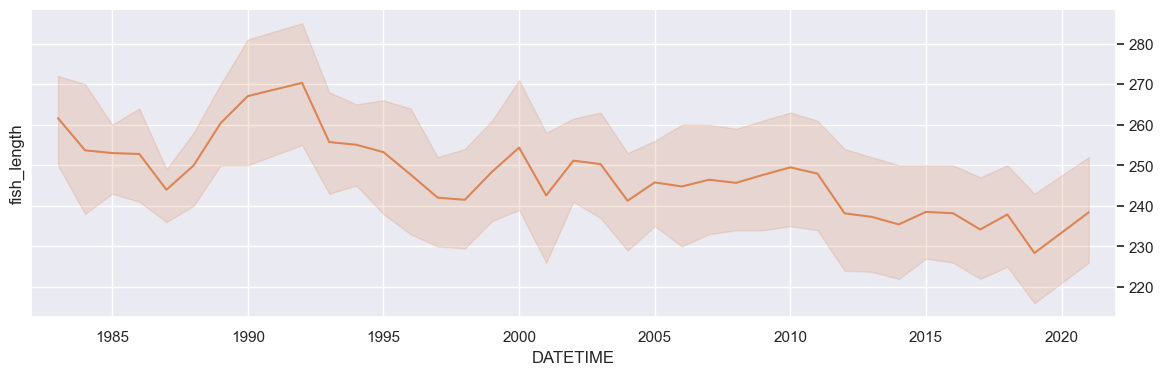

In [20]:
dont_plot_these_columns = [
    'id', 'DATETIME', 
    'Comments_1', 'Comments_2', 'Comments_3', 'Envelop.Comments', 'remarks',
    'FLAG_SITE', 'FLAG_AM_PM_PERIOD', 'FLAG_SEX', 'FLAG_MATURITY', 'FLAG_FSP_1', 'FLAG_FL_STD', 'FLAG_FL_WET_FROZEN',
    'FLAG_WEIGHT_OUTLIER', 'FLAG_GONAD_OUTLIER', 'FLAG_MULTIPLE_SAMPLE_POSSIBILITIES', 'FLAG_MISNUMBERED_FISH_DETAILS',
    'FLAG_LEN_WT_RATIO_OUTLIER', 'FLAG_AM_PM_PERIOD_DISCREPANCIES', 'FLAG_NO_MATCHING_SAMPLE'
]

for col in [x for x in list(df_FD.columns) if x not in dont_plot_these_columns]:
    do_EDA_stuff(df_FD, col)

### SAMPLES

In [21]:
df_SD.columns

Index(['DIST', 'RIVER', 'NAME', 'code', 'GEAR', 'SITE_NO', 'no_nets', 'YEAR',
       'MM', 'DD', 'Week', 'catch_lbs', 'catch_kg', 'hours_fished', 'zone',
       'last_name', 'comments', 'bycatch_sbass', 'bycatch_shad',
       'bycatch_other', 'DATETIME', 'SITE1', 'SITE2', 'remarks', 'id',
       'total_fish_preserved', 'total_fish_measured', 'AM_PM_PERIOD', 'wt_lbs',
       'FLAG_DATETIME', 'FLAG_HOURS_FISHED', 'FLAG_SITE',
       'FLAG_AM_PM_PERIOD_DISCREPANCIES'],
      dtype='object')

In [22]:
# can't plot CODE, has no non-null numbers
df_SD.code.unique()

array([nan], dtype=object)


--------------------------------------------------
Data Info: DIST 

UNIQUE numbers, strings, blanks, null = (1, 0, 0, 0)
number of numeric = 15213
number of strings = 0
number of blanks = 0
number of null =  0
check:  15213 == 15213

--------------------------------------------------
Histogram: DIST


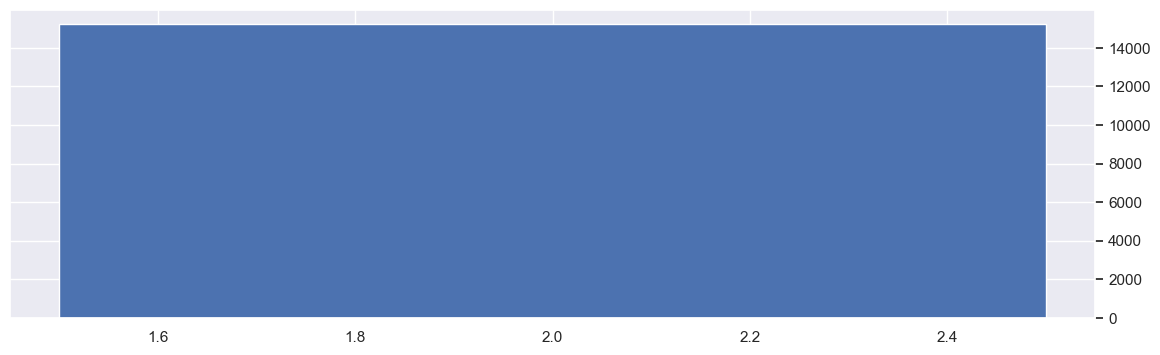


------------------------------------------------
Time Series:DIST
NUMERICAL


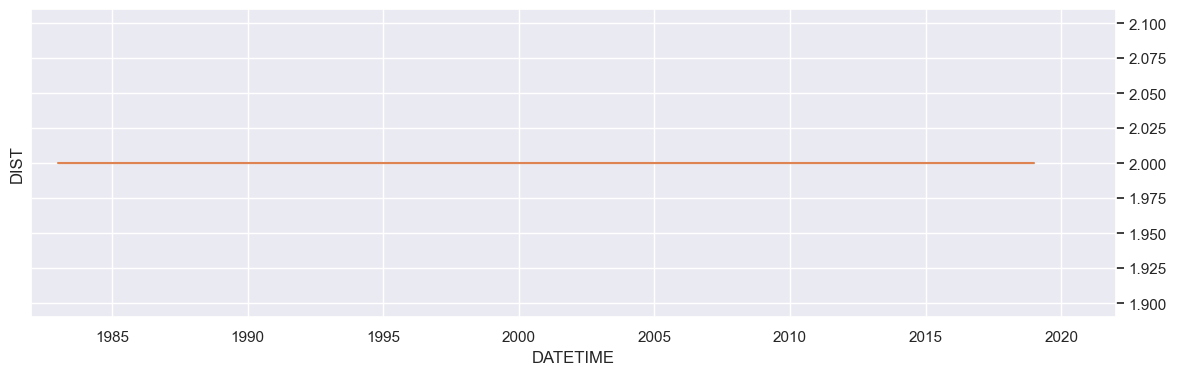


--------------------------------------------------
Data Info: RIVER 

UNIQUE numbers, strings, blanks, null = (0, 1, 0, 0)
number of numeric = 0
number of strings = 15213
number of blanks = 0
number of null =  0
check:  15213 == 15213

--------------------------------------------------
Histogram: RIVER


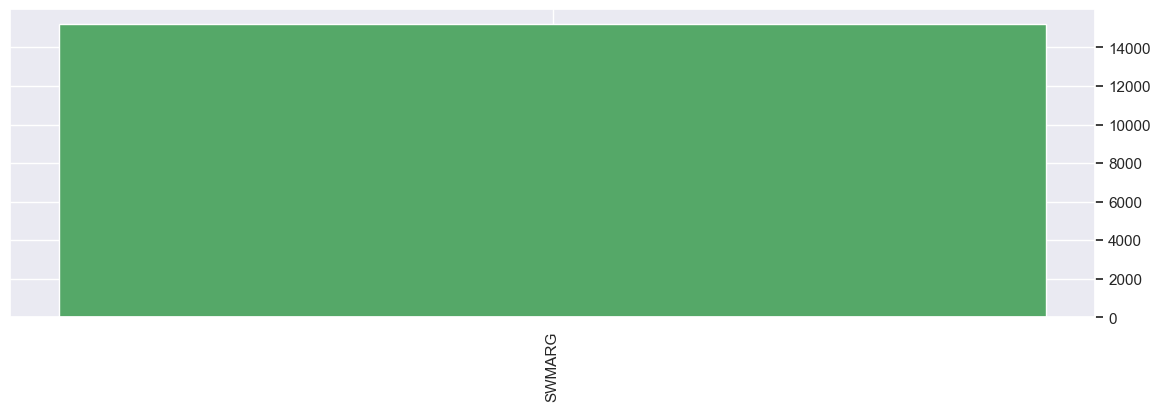


------------------------------------------------
Time Series:RIVER
CATEGORICAL


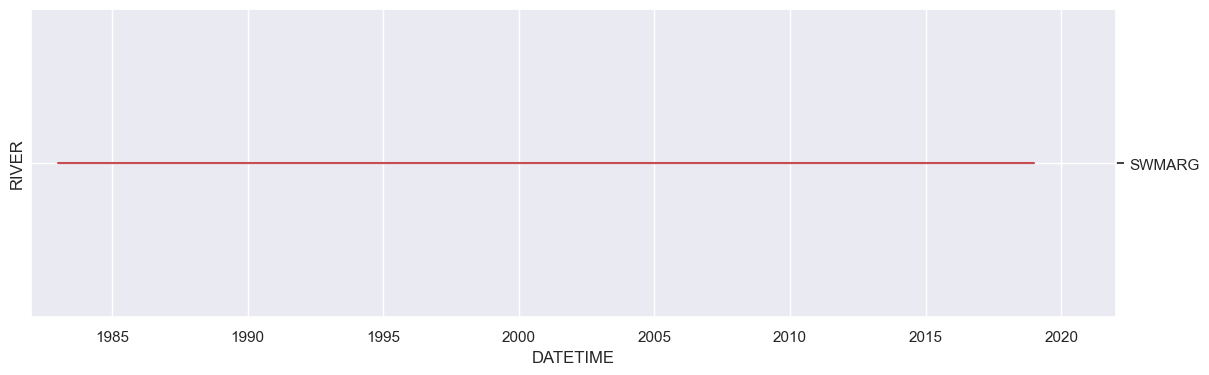


--------------------------------------------------
Data Info: NAME 

UNIQUE numbers, strings, blanks, null = (0, 74, 0, 0)
number of numeric = 0
number of strings = 15213
number of blanks = 0
number of null =  0
check:  15213 == 15213

--------------------------------------------------
Histogram: NAME


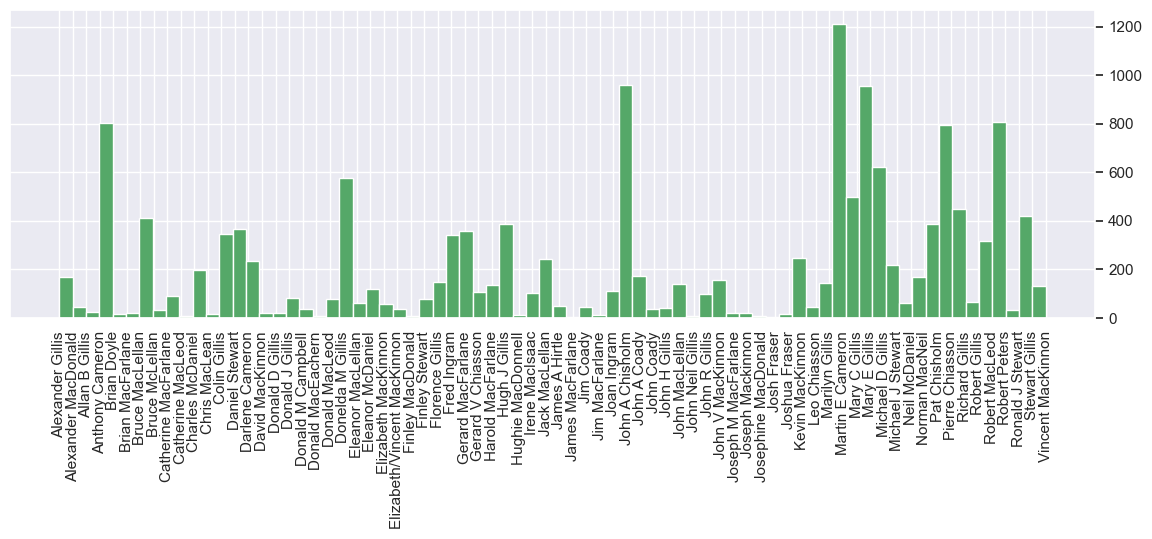


------------------------------------------------
Time Series:NAME
CATEGORICAL


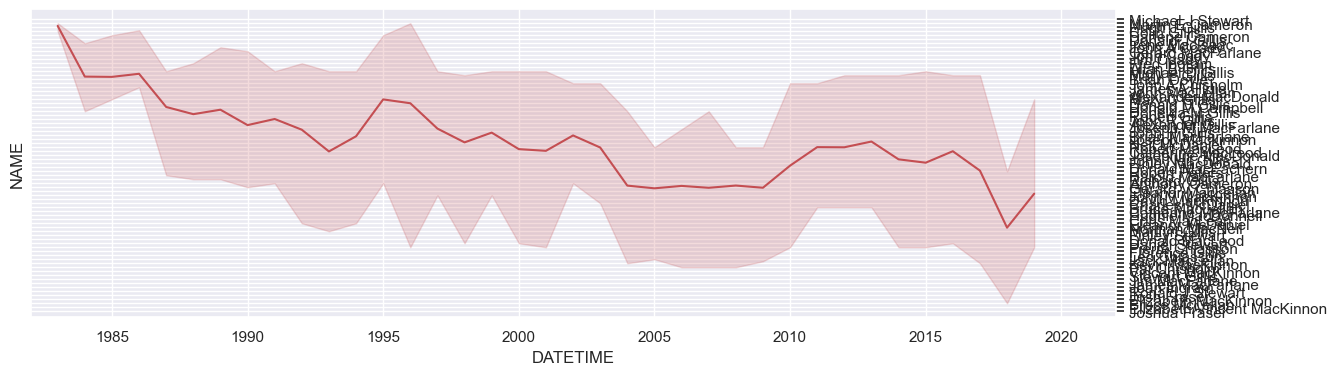


--------------------------------------------------
Data Info: GEAR 

UNIQUE numbers, strings, blanks, null = (1, 0, 0, 0)
number of numeric = 15213
number of strings = 0
number of blanks = 0
number of null =  0
check:  15213 == 15213

--------------------------------------------------
Histogram: GEAR


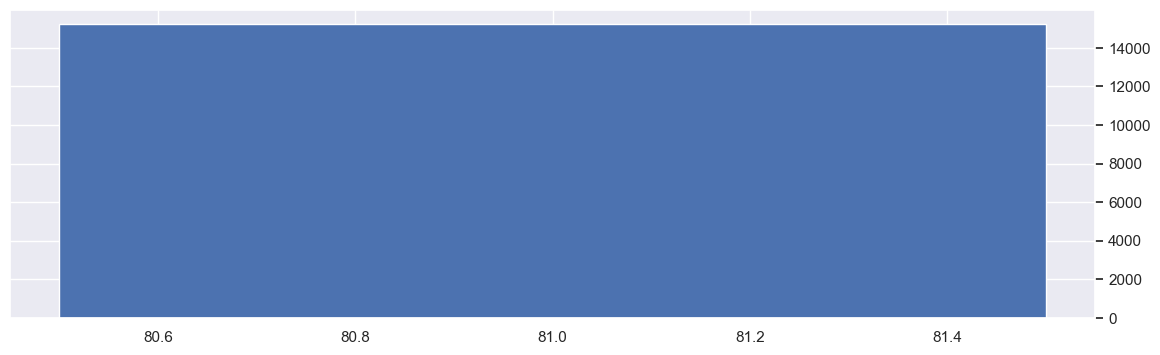


------------------------------------------------
Time Series:GEAR
NUMERICAL


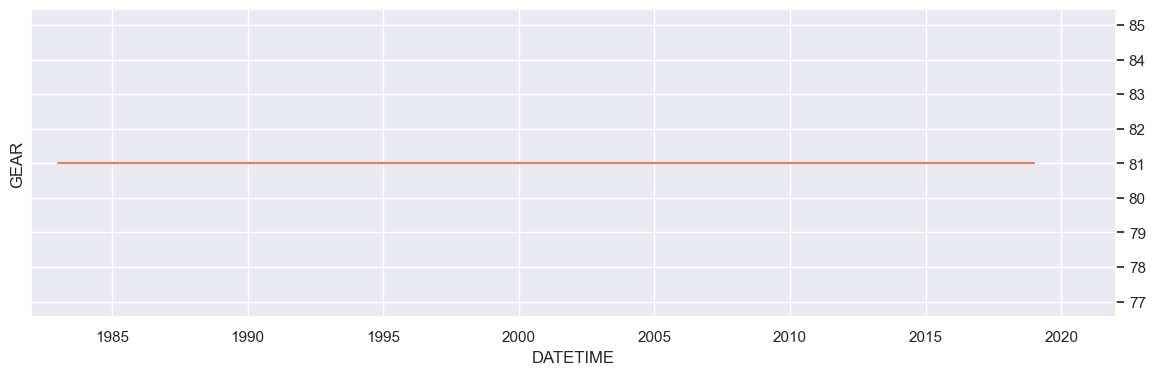


--------------------------------------------------
Data Info: SITE_NO 

UNIQUE numbers, strings, blanks, null = (59, 3, 0, 0)
number of numeric = 15036
number of strings = 177
number of blanks = 0
number of null =  0
check:  15213 == 15213

--------------------------------------------------
Histogram: SITE_NO


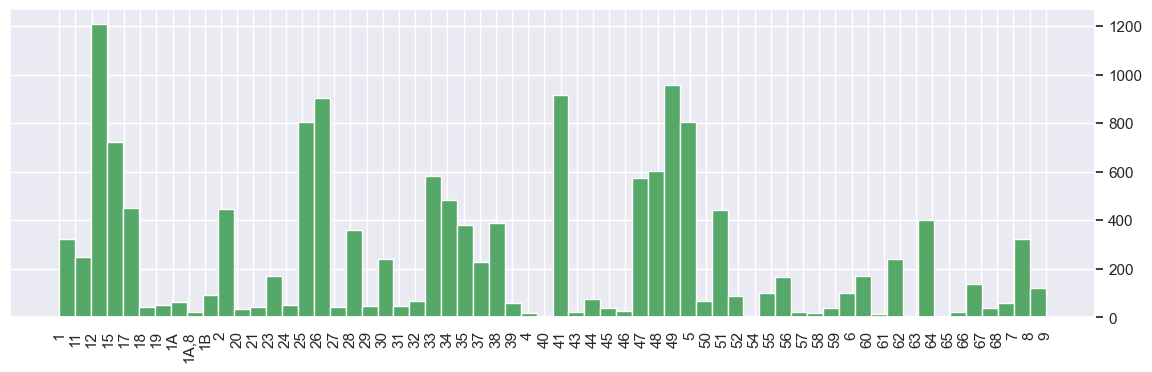


------------------------------------------------
Time Series:SITE_NO
CATEGORICAL


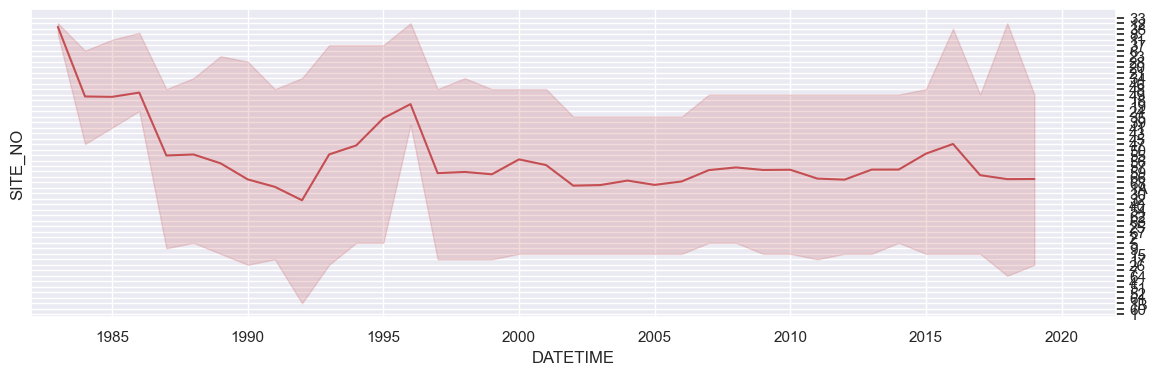


--------------------------------------------------
Data Info: NO_NETS 

UNIQUE numbers, strings, blanks, null = (2, 0, 0, 1)
number of numeric = 9623
number of strings = 0
number of blanks = 0
number of null =  5590
check:  15213 == 15213

--------------------------------------------------
Histogram: NO_NETS


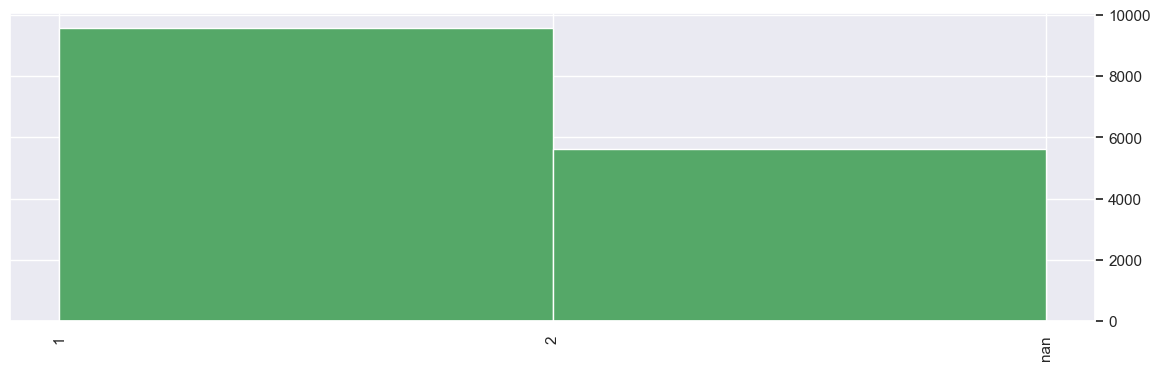


------------------------------------------------
Time Series:NO_NETS
NUMERICAL


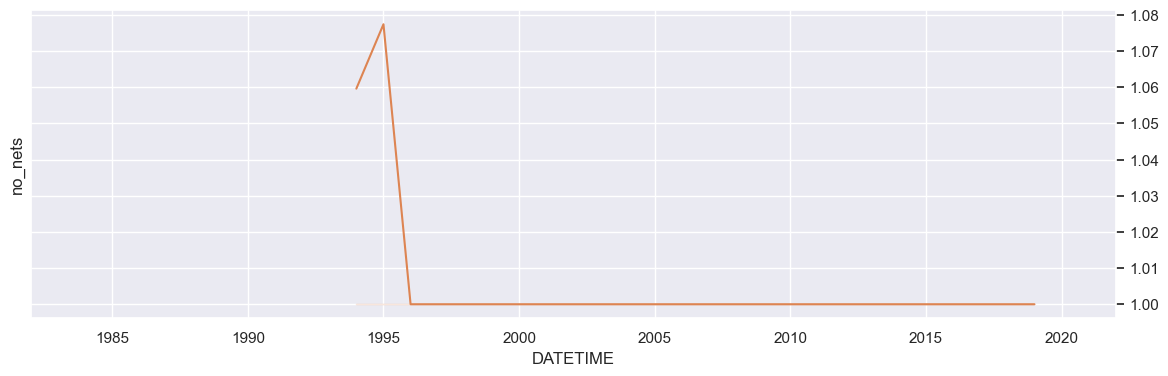


--------------------------------------------------
Data Info: YEAR 

UNIQUE numbers, strings, blanks, null = (37, 0, 0, 0)
number of numeric = 15213
number of strings = 0
number of blanks = 0
number of null =  0
check:  15213 == 15213

--------------------------------------------------
Histogram: YEAR


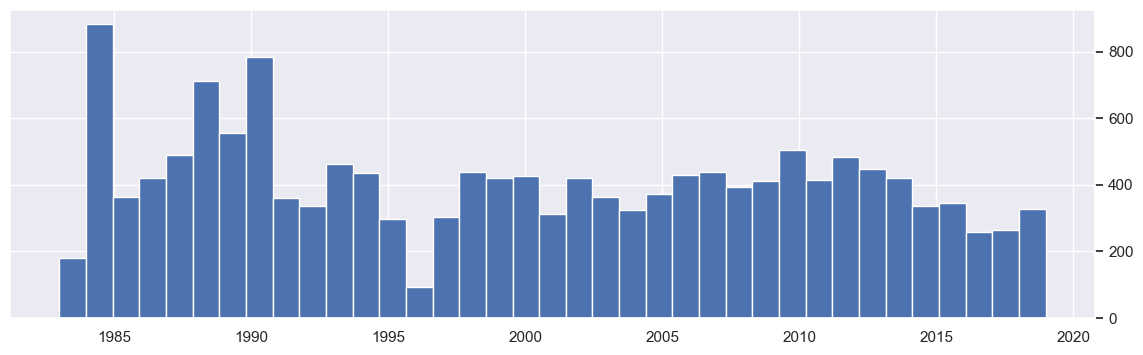


------------------------------------------------
Time Series:YEAR
NUMERICAL


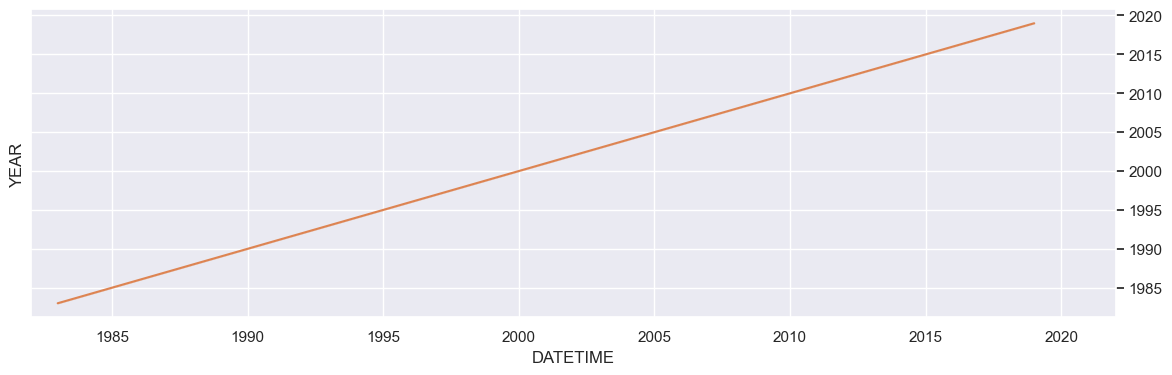


--------------------------------------------------
Data Info: MM 

UNIQUE numbers, strings, blanks, null = (3, 0, 0, 1)
number of numeric = 15194
number of strings = 0
number of blanks = 0
number of null =  19
check:  15213 == 15213

--------------------------------------------------
Histogram: MM


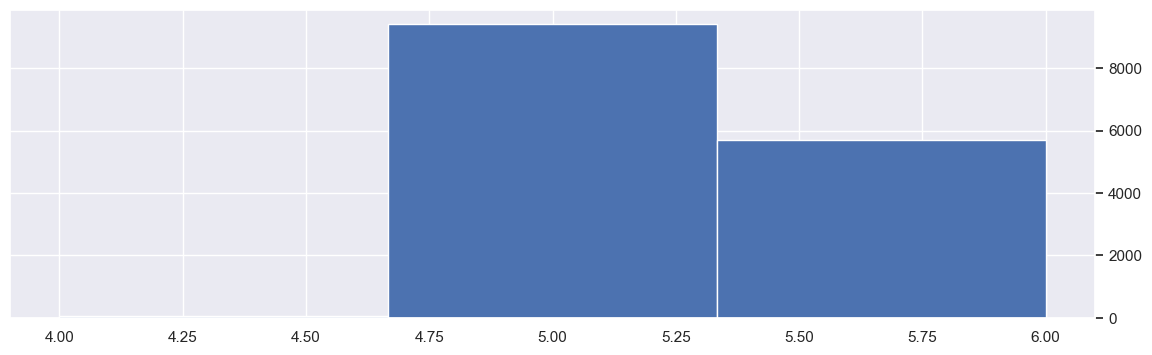


------------------------------------------------
Time Series:MM
NUMERICAL


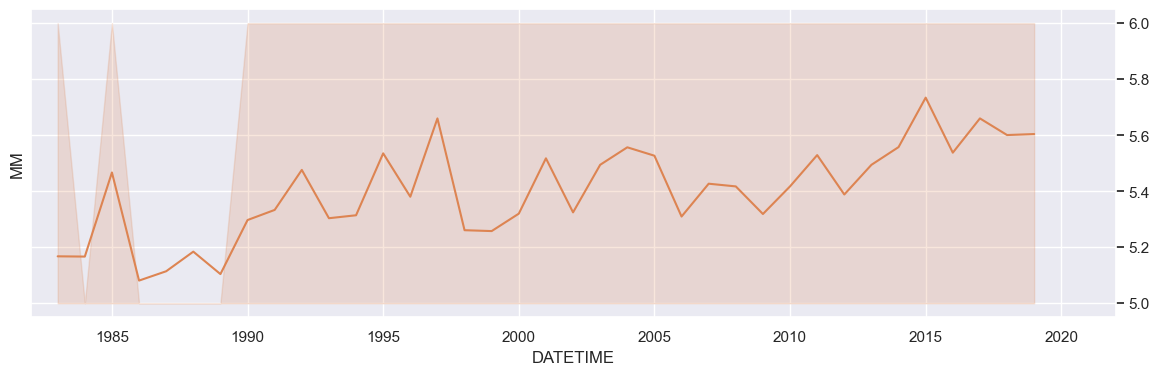


--------------------------------------------------
Data Info: DD 

UNIQUE numbers, strings, blanks, null = (31, 0, 0, 1)
number of numeric = 15182
number of strings = 0
number of blanks = 0
number of null =  31
check:  15213 == 15213

--------------------------------------------------
Histogram: DD


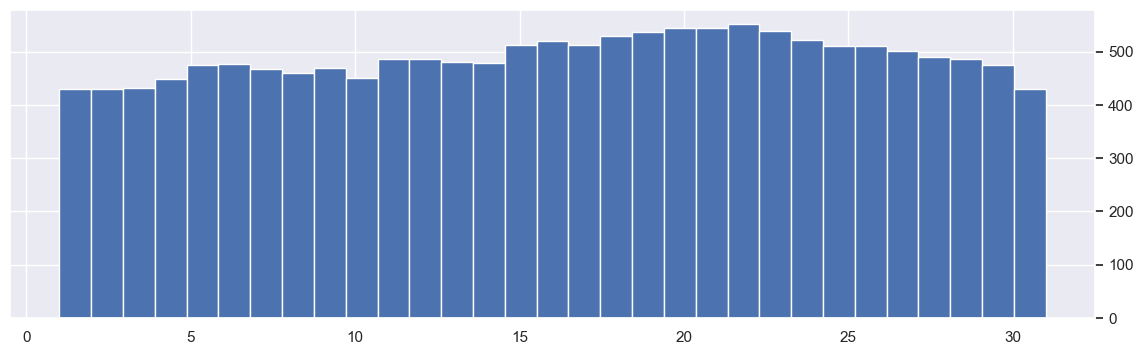


------------------------------------------------
Time Series:DD
NUMERICAL


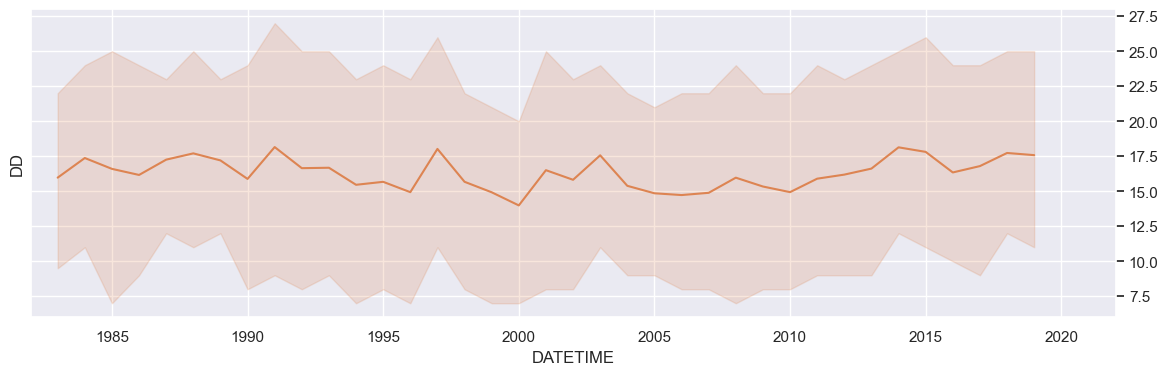


--------------------------------------------------
Data Info: WEEK 

UNIQUE numbers, strings, blanks, null = (10, 0, 0, 1)
number of numeric = 11590
number of strings = 0
number of blanks = 0
number of null =  3623
check:  15213 == 15213

--------------------------------------------------
Histogram: WEEK


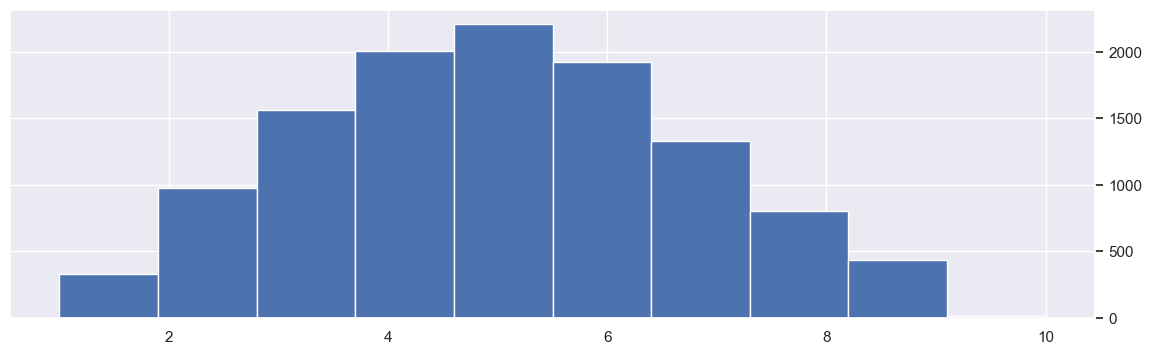


------------------------------------------------
Time Series:WEEK
NUMERICAL


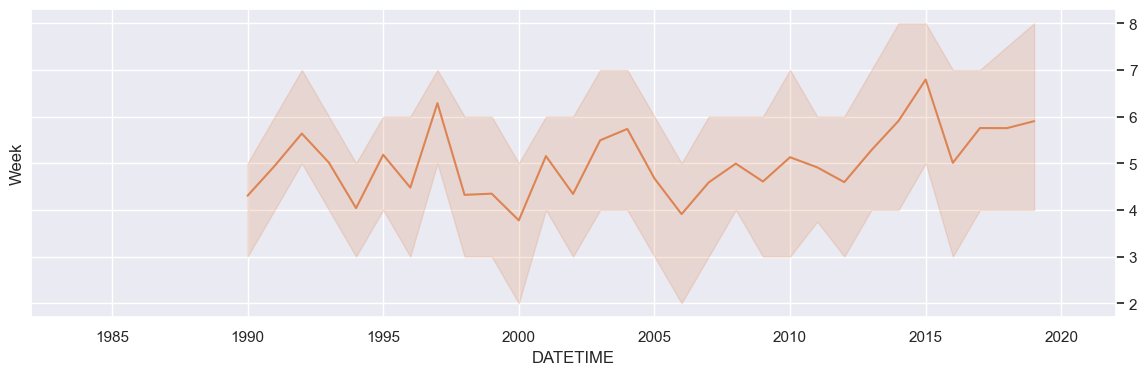


--------------------------------------------------
Data Info: CATCH_LBS 

UNIQUE numbers, strings, blanks, null = (689, 0, 0, 1)
number of numeric = 15200
number of strings = 0
number of blanks = 0
number of null =  13
check:  15213 == 15213

--------------------------------------------------
Histogram: CATCH_LBS


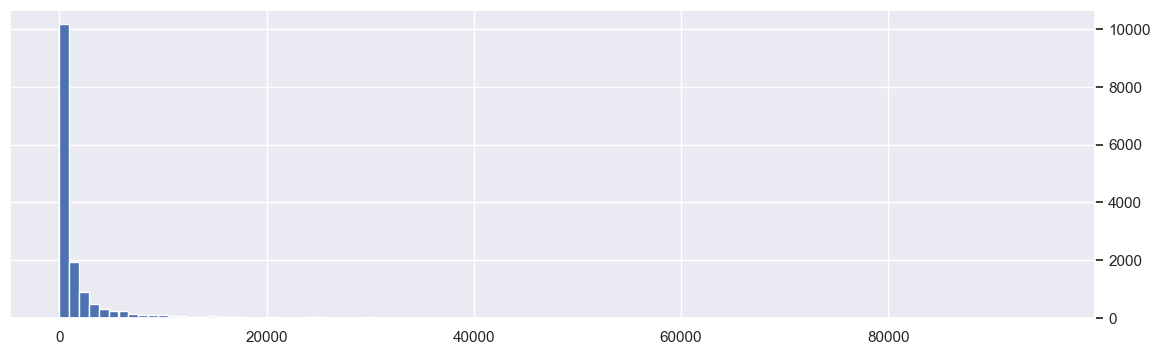


------------------------------------------------
Time Series:CATCH_LBS
NUMERICAL


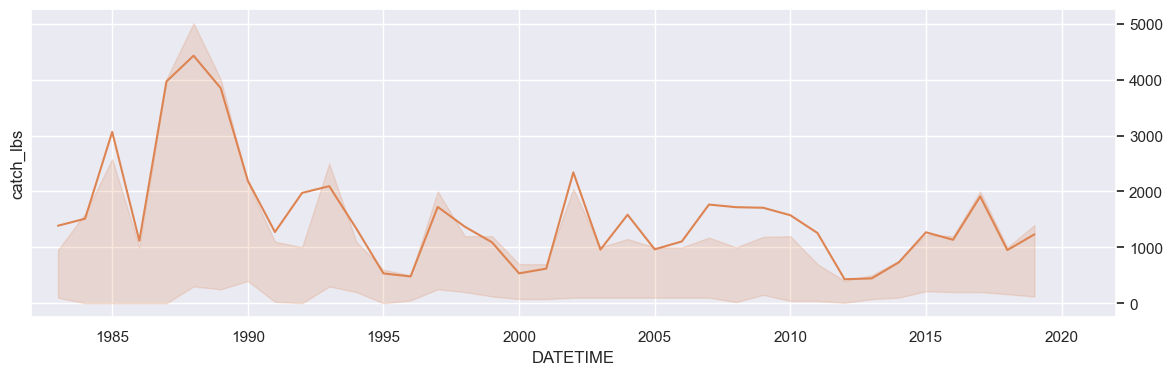


--------------------------------------------------
Data Info: CATCH_KG 

UNIQUE numbers, strings, blanks, null = (698, 0, 0, 1)
number of numeric = 15212
number of strings = 0
number of blanks = 0
number of null =  1
check:  15213 == 15213

--------------------------------------------------
Histogram: CATCH_KG


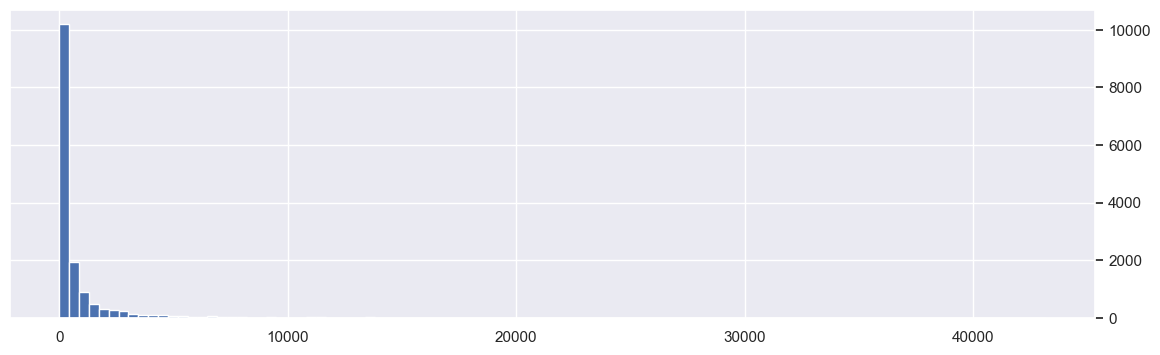


------------------------------------------------
Time Series:CATCH_KG
NUMERICAL


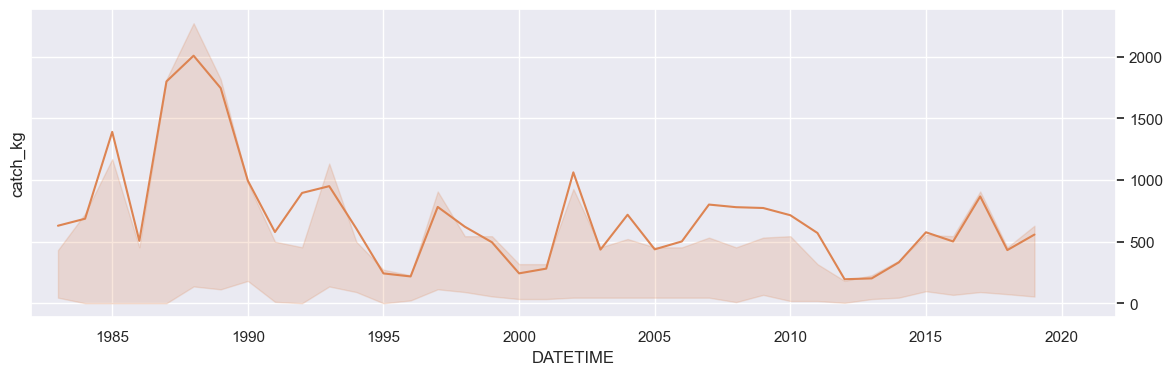


--------------------------------------------------
Data Info: HOURS_FISHED 

UNIQUE numbers, strings, blanks, null = (37, 1, 0, 1)
number of numeric = 13506
number of strings = 28
number of blanks = 0
number of null =  1679
check:  15213 == 15213

--------------------------------------------------
Histogram: HOURS_FISHED


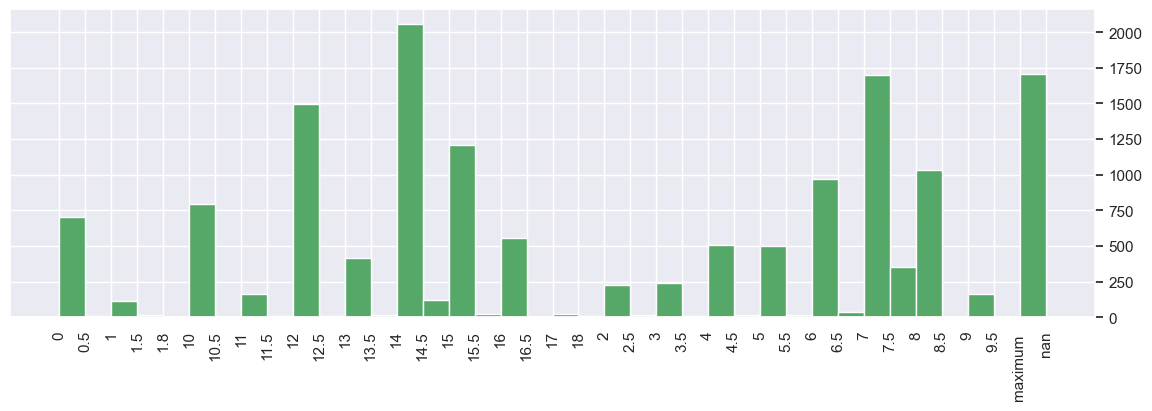


------------------------------------------------
Time Series:HOURS_FISHED
CATEGORICAL


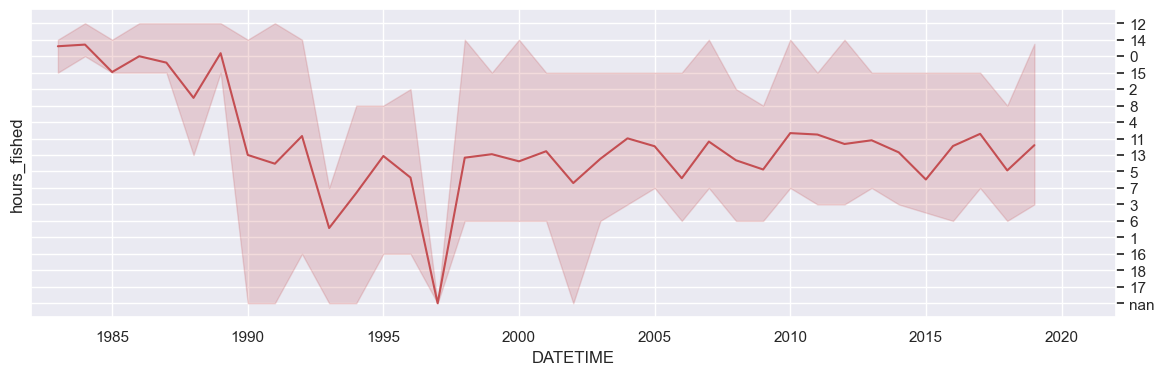


--------------------------------------------------
Data Info: ZONE 

UNIQUE numbers, strings, blanks, null = (0, 2, 0, 1)
number of numeric = 0
number of strings = 15208
number of blanks = 0
number of null =  5
check:  15213 == 15213

--------------------------------------------------
Histogram: ZONE


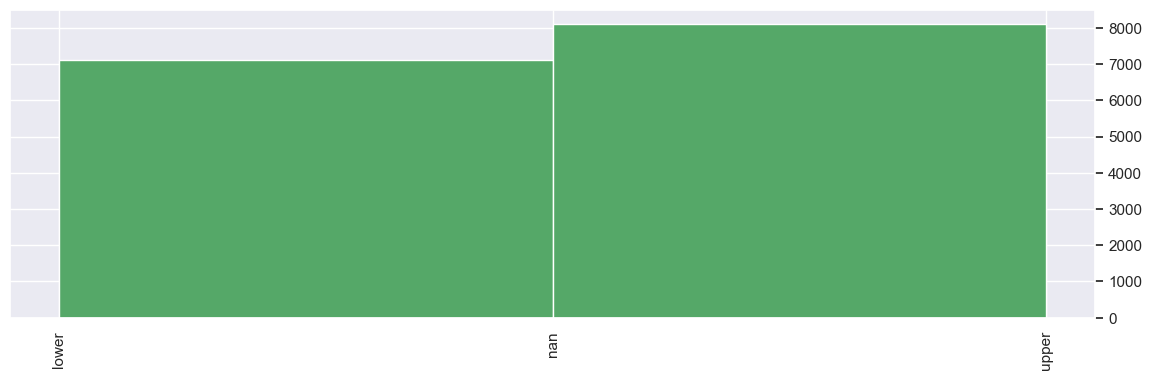


------------------------------------------------
Time Series:ZONE
CATEGORICAL


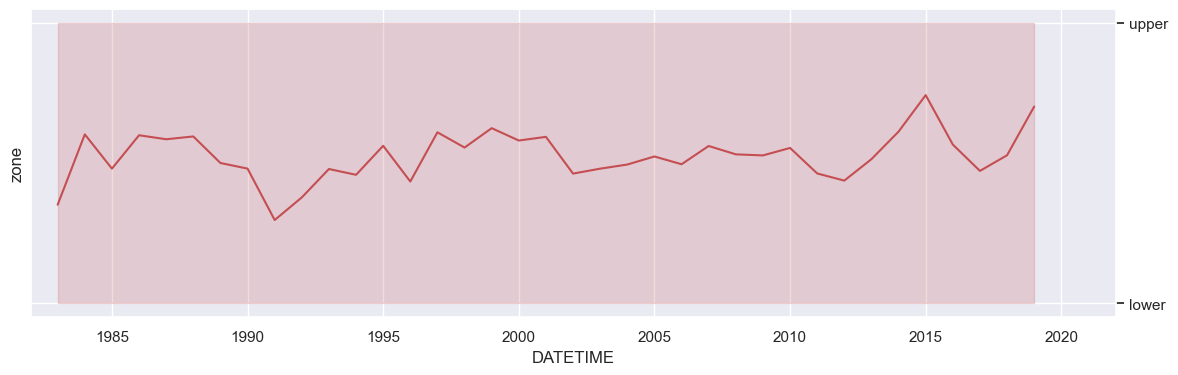


--------------------------------------------------
Data Info: LAST_NAME 

UNIQUE numbers, strings, blanks, null = (0, 30, 0, 1)
number of numeric = 0
number of strings = 13582
number of blanks = 0
number of null =  1631
check:  15213 == 15213

--------------------------------------------------
Histogram: LAST_NAME


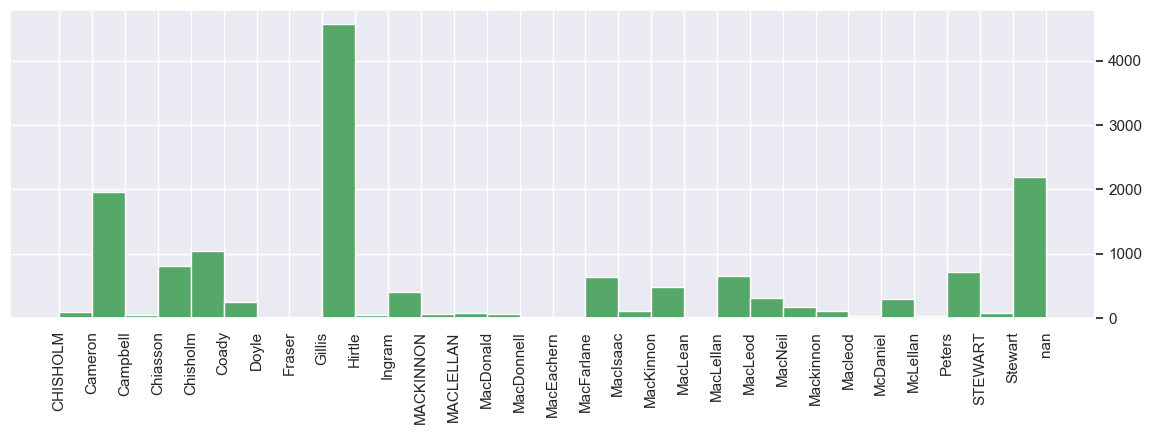


------------------------------------------------
Time Series:LAST_NAME
CATEGORICAL


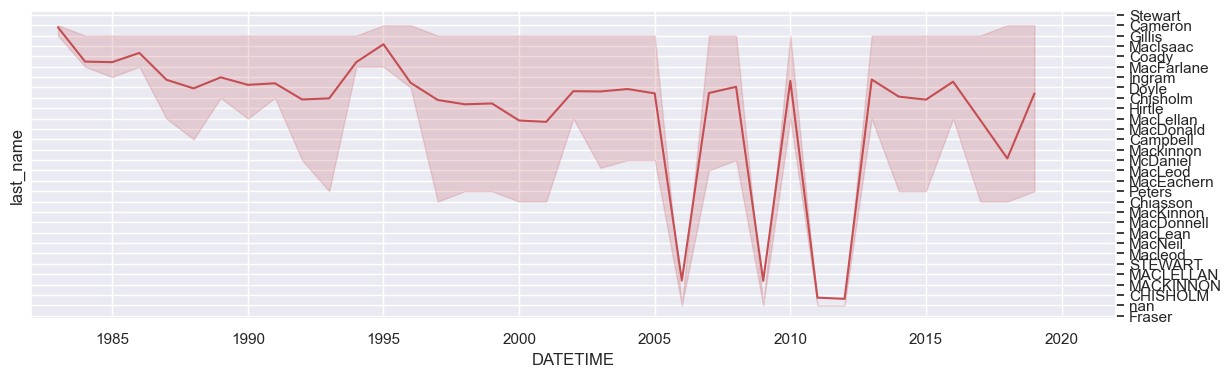


--------------------------------------------------
Data Info: BYCATCH_SBASS 

UNIQUE numbers, strings, blanks, null = (3, 0, 0, 1)
number of numeric = 18
number of strings = 0
number of blanks = 0
number of null =  15195
check:  15213 == 15213

--------------------------------------------------
Histogram: BYCATCH_SBASS


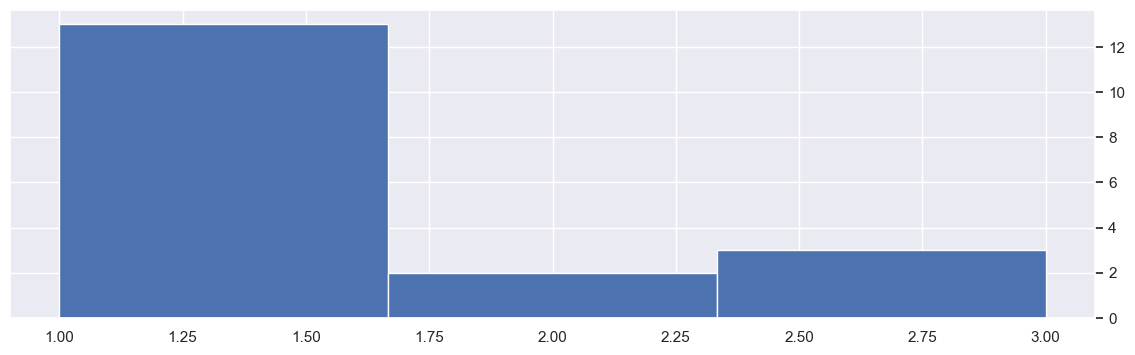


------------------------------------------------
Time Series:BYCATCH_SBASS
NUMERICAL


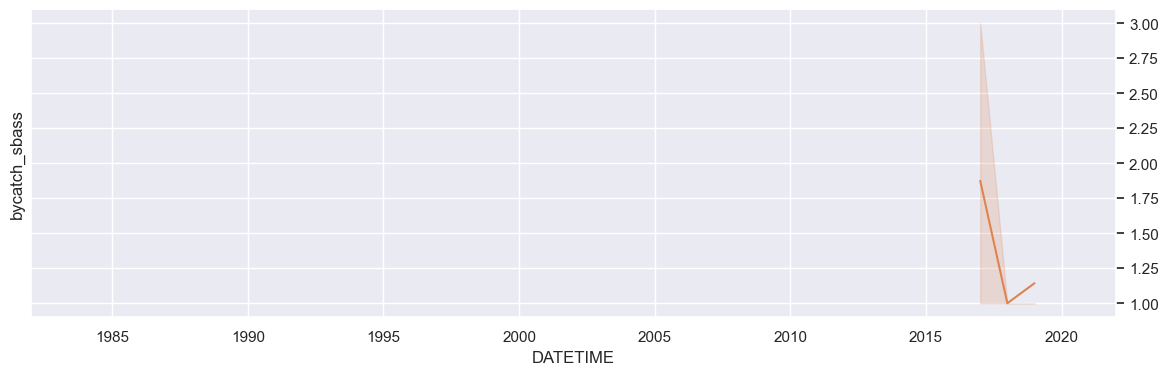


--------------------------------------------------
Data Info: BYCATCH_SHAD 

UNIQUE numbers, strings, blanks, null = (1, 0, 0, 1)
number of numeric = 4
number of strings = 0
number of blanks = 0
number of null =  15209
check:  15213 == 15213

--------------------------------------------------
Histogram: BYCATCH_SHAD


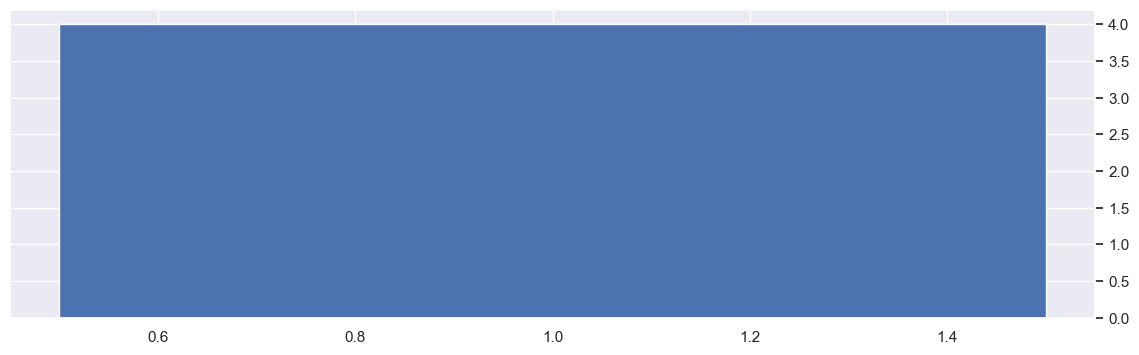


------------------------------------------------
Time Series:BYCATCH_SHAD
NUMERICAL


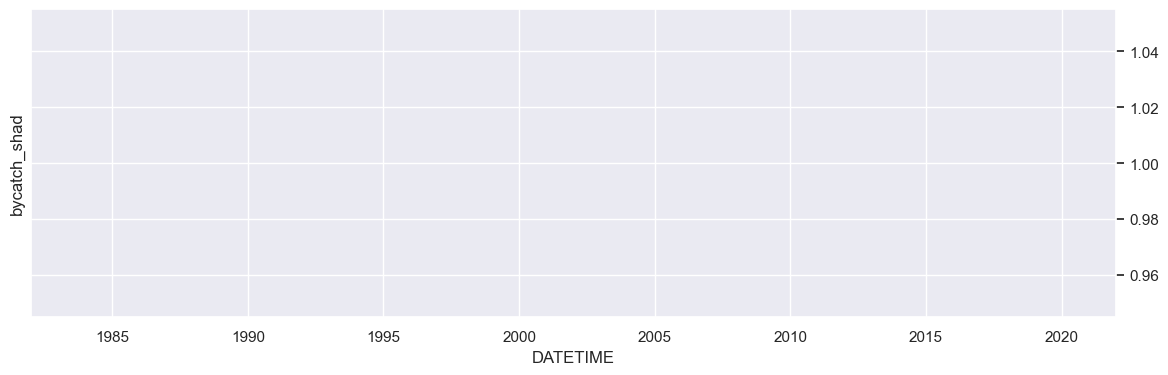


--------------------------------------------------
Data Info: BYCATCH_OTHER 

UNIQUE numbers, strings, blanks, null = (1, 12, 0, 1)
number of numeric = 5
number of strings = 13
number of blanks = 0
number of null =  15195
check:  15213 == 15213

--------------------------------------------------
Histogram: BYCATCH_OTHER


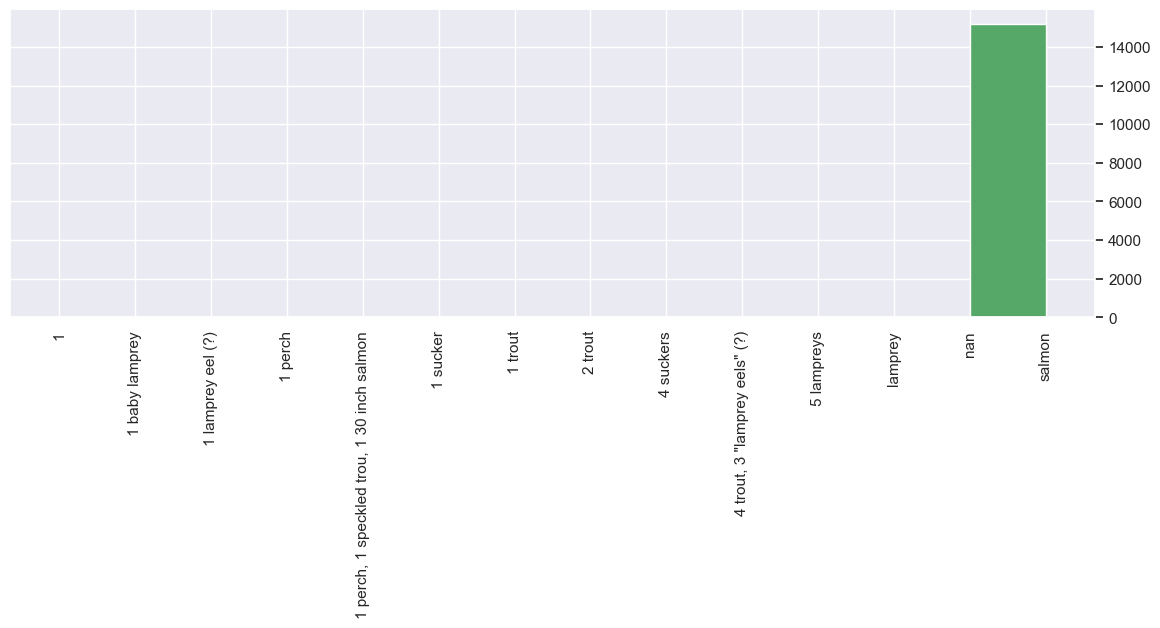


------------------------------------------------
Time Series:BYCATCH_OTHER
CATEGORICAL


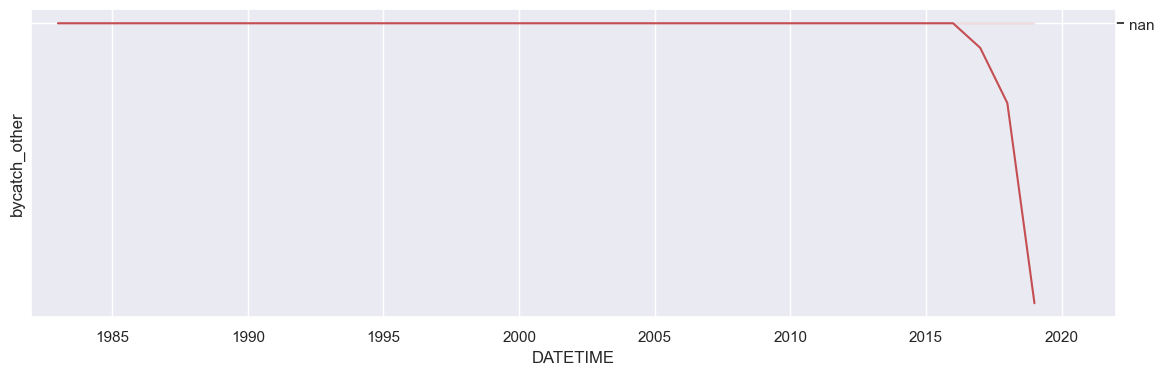


--------------------------------------------------
Data Info: SITE1 

UNIQUE numbers, strings, blanks, null = (61, 0, 0, 0)
number of numeric = 15213
number of strings = 0
number of blanks = 0
number of null =  0
check:  15213 == 15213

--------------------------------------------------
Histogram: SITE1


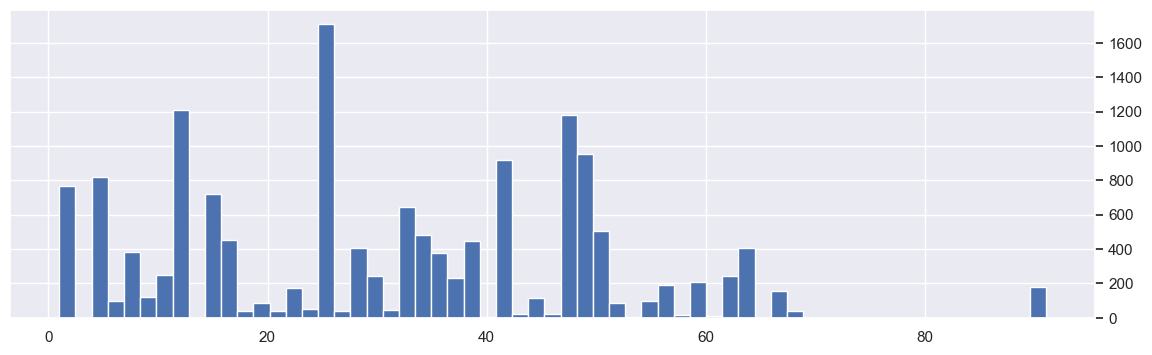


------------------------------------------------
Time Series:SITE1
NUMERICAL


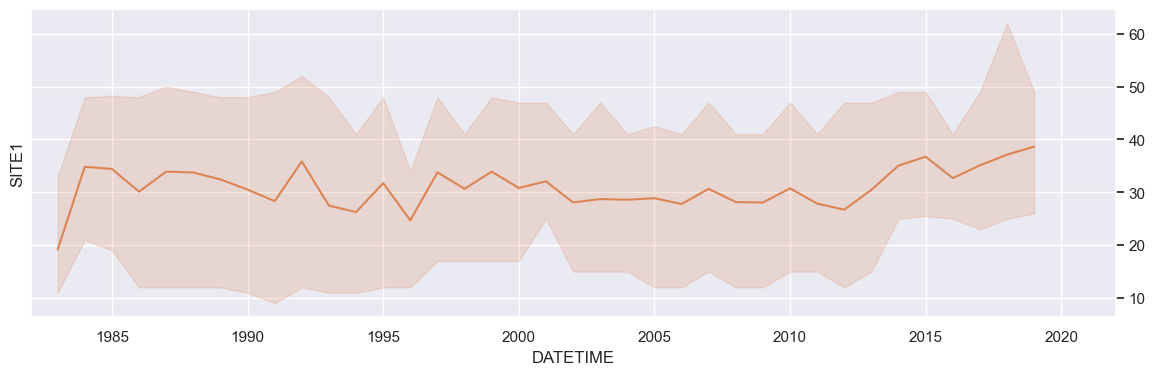


--------------------------------------------------
Data Info: SITE2 

UNIQUE numbers, strings, blanks, null = (1, 0, 0, 1)
number of numeric = 23
number of strings = 0
number of blanks = 0
number of null =  15190
check:  15213 == 15213

--------------------------------------------------
Histogram: SITE2


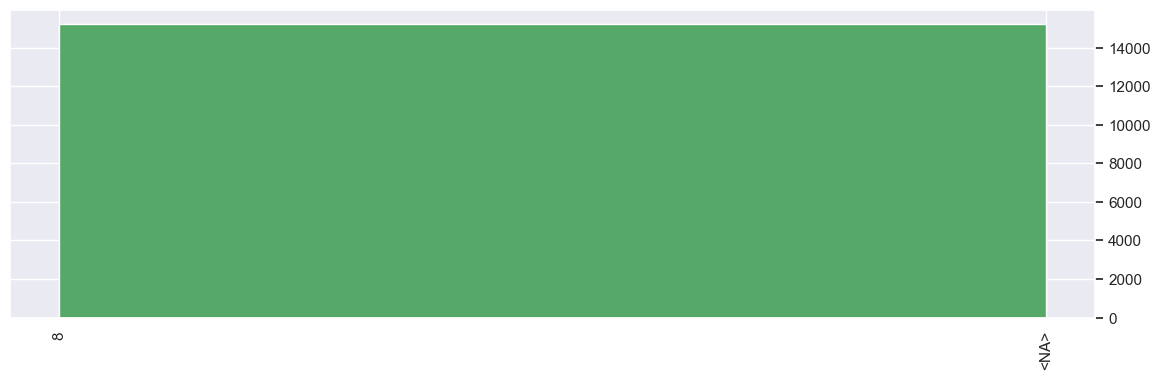


------------------------------------------------
Time Series:SITE2
CATEGORICAL


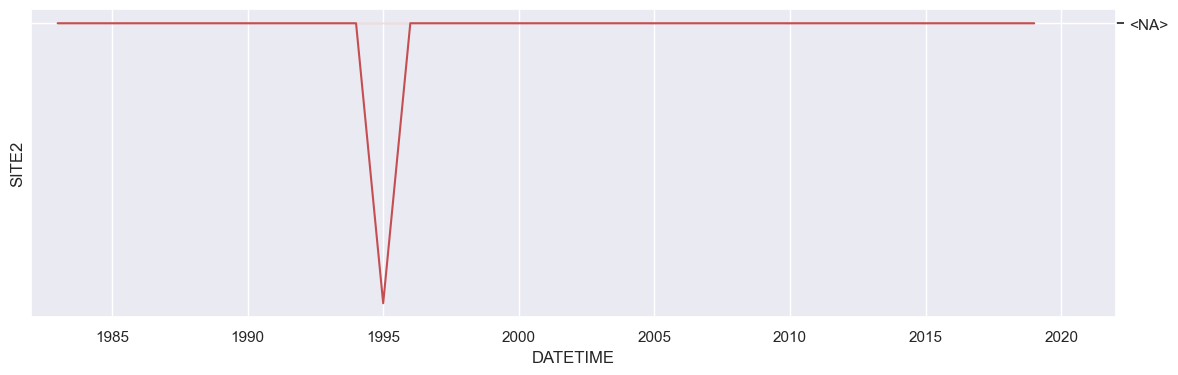


--------------------------------------------------
Data Info: TOTAL_FISH_PRESERVED 

UNIQUE numbers, strings, blanks, null = (50, 0, 0, 1)
number of numeric = 908
number of strings = 0
number of blanks = 0
number of null =  14305
check:  15213 == 15213

--------------------------------------------------
Histogram: TOTAL_FISH_PRESERVED


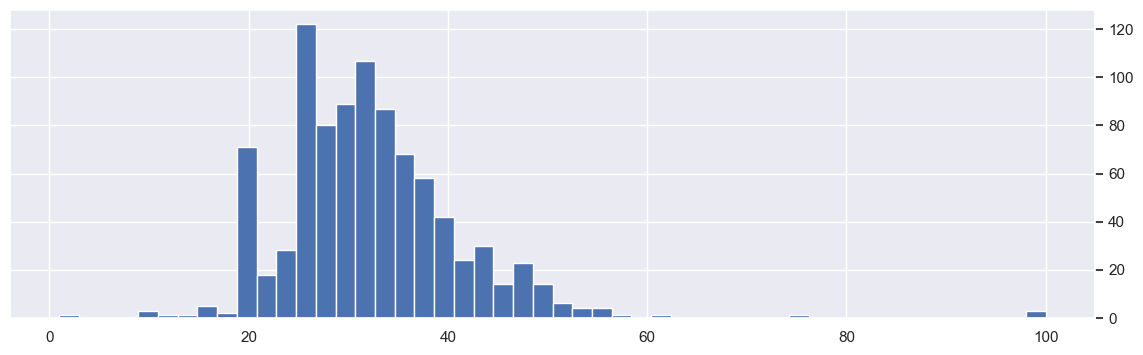


------------------------------------------------
Time Series:TOTAL_FISH_PRESERVED
NUMERICAL


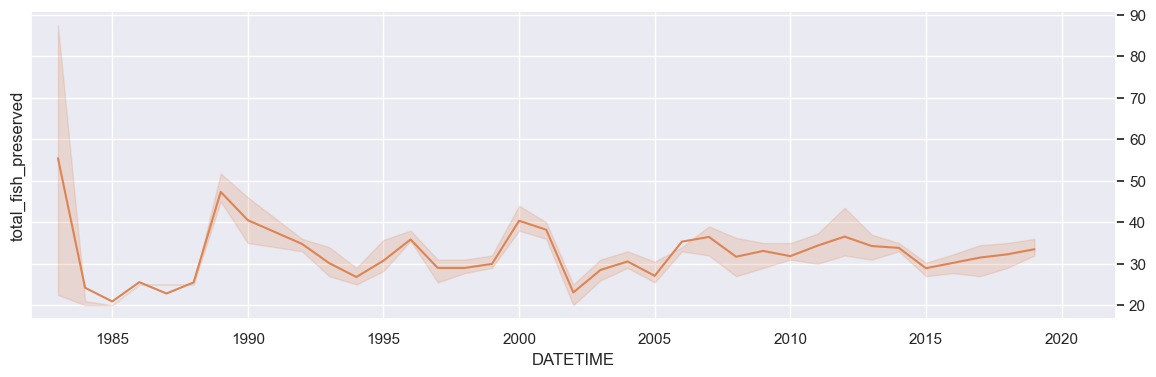


--------------------------------------------------
Data Info: TOTAL_FISH_MEASURED 

UNIQUE numbers, strings, blanks, null = (249, 0, 0, 1)
number of numeric = 731
number of strings = 0
number of blanks = 0
number of null =  14482
check:  15213 == 15213

--------------------------------------------------
Histogram: TOTAL_FISH_MEASURED


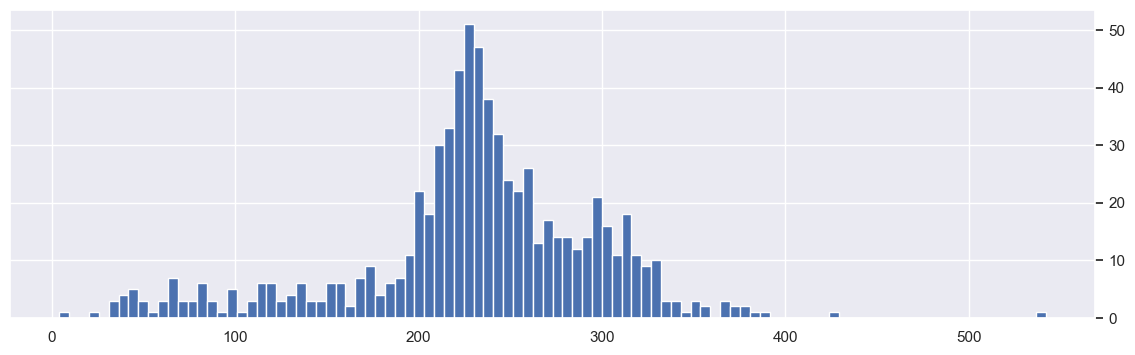


------------------------------------------------
Time Series:TOTAL_FISH_MEASURED
NUMERICAL


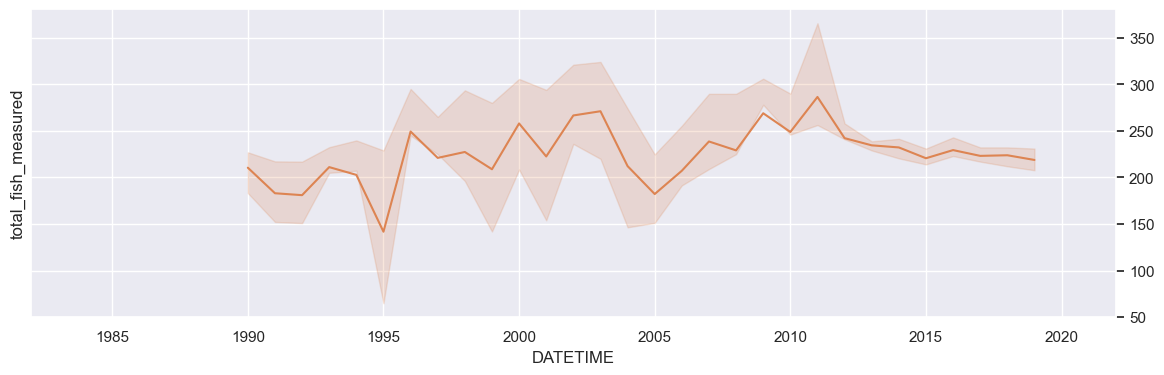


--------------------------------------------------
Data Info: AM_PM_PERIOD 

UNIQUE numbers, strings, blanks, null = (0, 3, 0, 1)
number of numeric = 0
number of strings = 792
number of blanks = 0
number of null =  14421
check:  15213 == 15213

--------------------------------------------------
Histogram: AM_PM_PERIOD


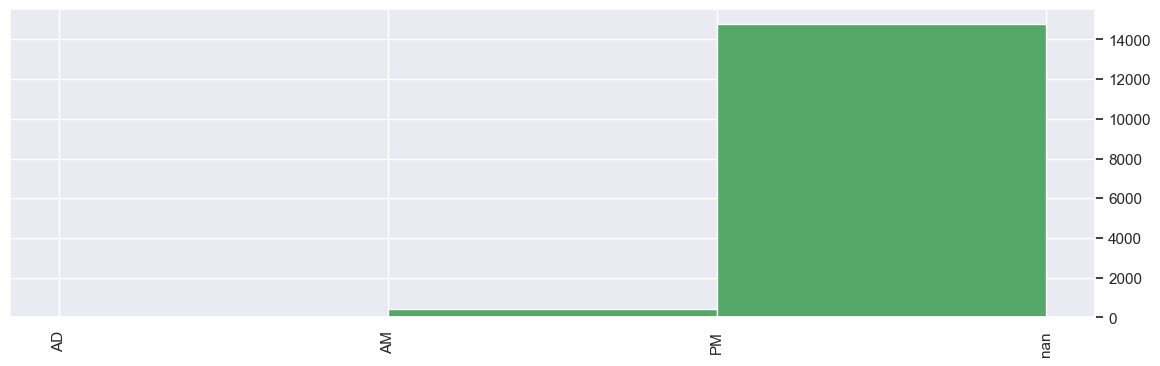


------------------------------------------------
Time Series:AM_PM_PERIOD
CATEGORICAL


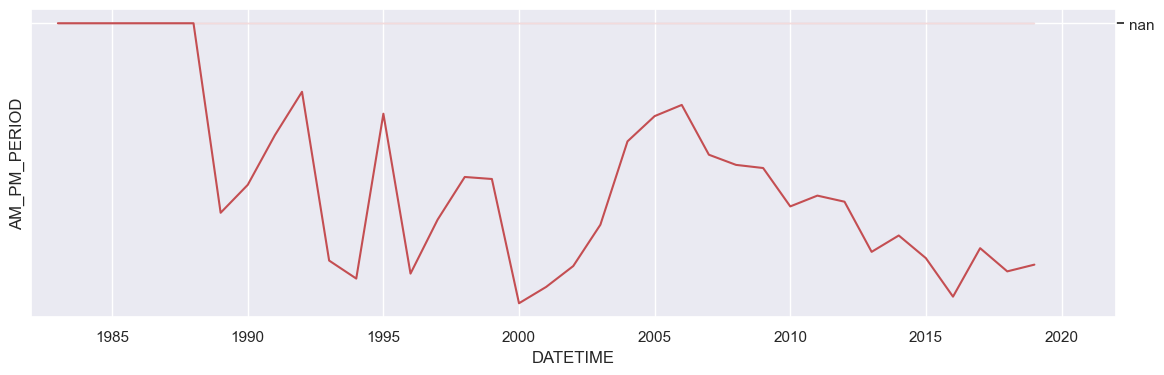


--------------------------------------------------
Data Info: WT_LBS 

UNIQUE numbers, strings, blanks, null = (215, 0, 0, 1)
number of numeric = 680
number of strings = 0
number of blanks = 0
number of null =  14533
check:  15213 == 15213

--------------------------------------------------
Histogram: WT_LBS


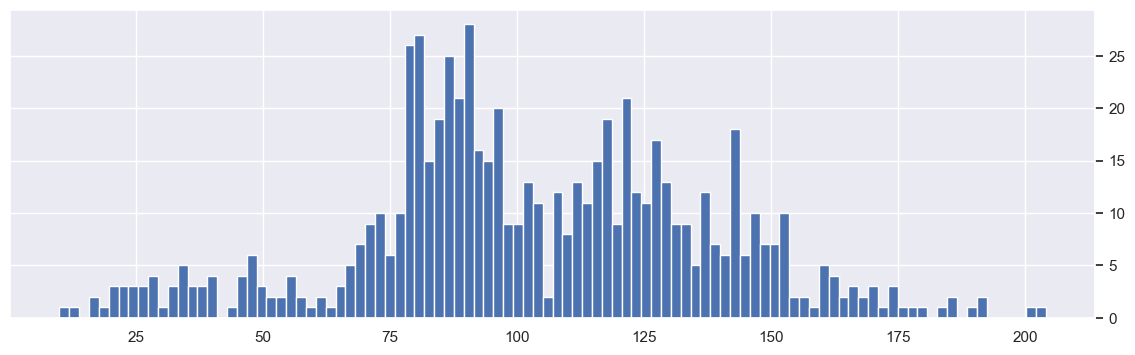


------------------------------------------------
Time Series:WT_LBS
NUMERICAL


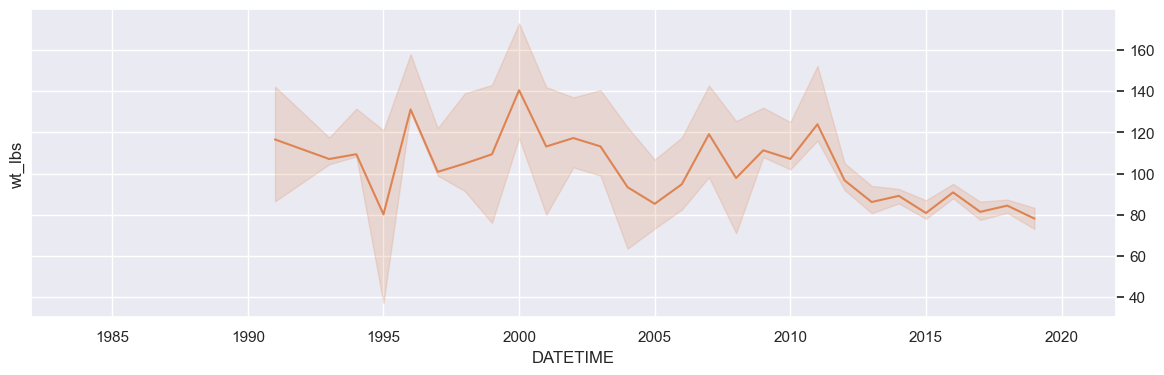

In [23]:
dont_plot_these_columns = [
    'id', 'DATETIME', 'comments', 'remarks', 'code',
    'FLAG_DATETIME', 'FLAG_HOURS_FISHED', 'FLAG_SITE', 'FLAG_AM_PM_PERIOD_DISCREPANCIES'
]

for col in [x for x in list(df_SD.columns) if x not in dont_plot_these_columns]:
    do_EDA_stuff(df_SD, col, 'DATETIME')

### LENGTH FREQUENCY

linear colour map


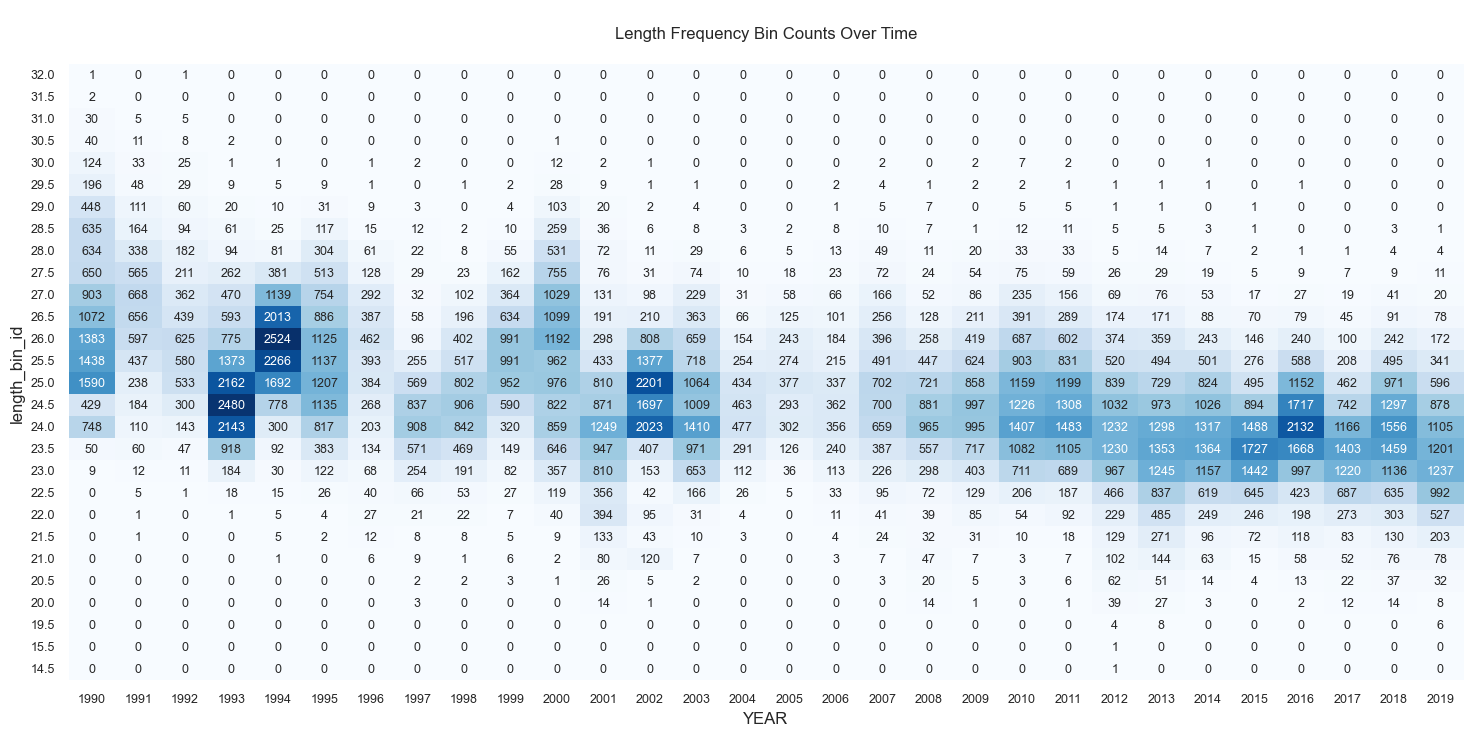

log normal colour map


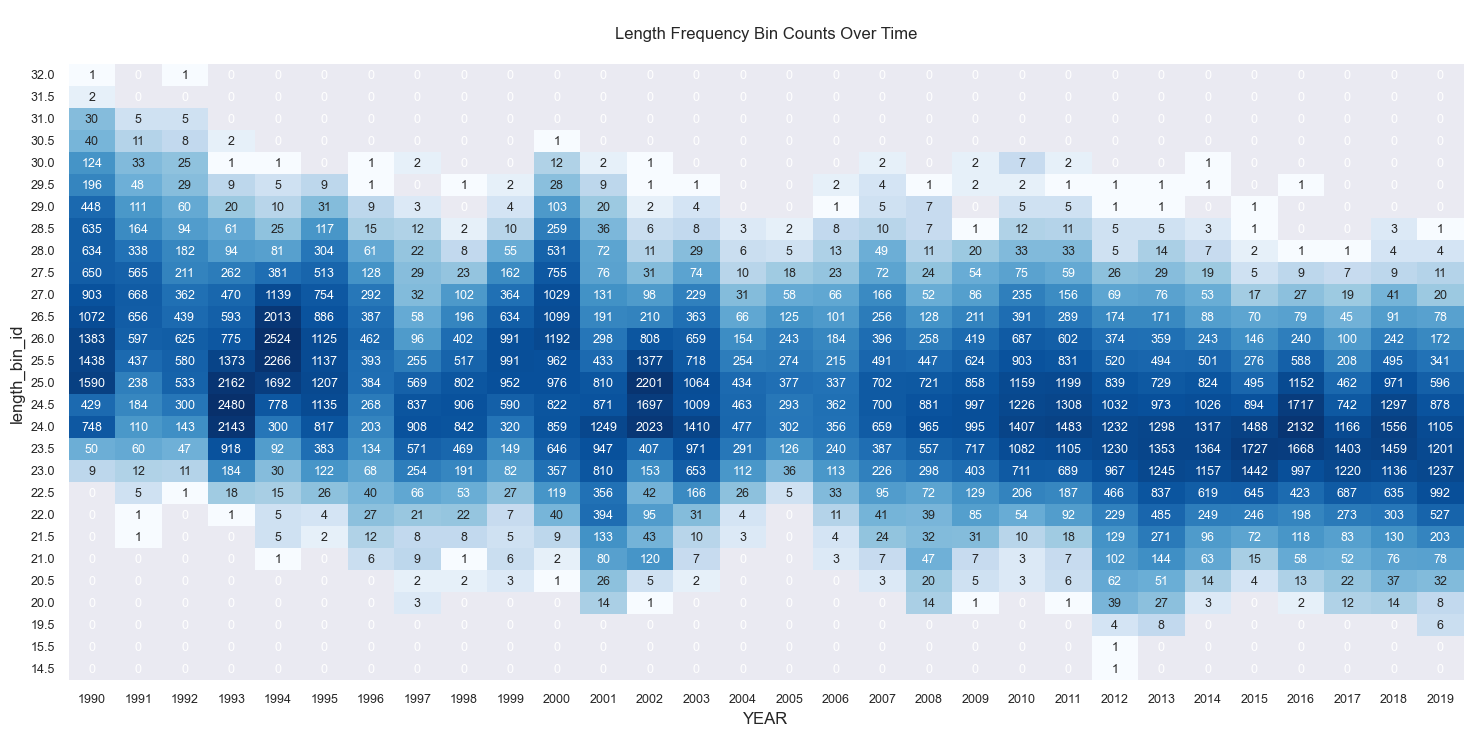

In [24]:
# HEATMAP for timeseries

TEMP = df_LF.copy()
TEMP['YEAR'] = df_LF.sample_id//1000000
TEMP = TEMP.drop('sample_id', axis=1)
TEMP = TEMP[TEMP.YEAR < 2023]

TEMP = TEMP.groupby(['YEAR', 'length_bin_id']).sum().reset_index(level=1)

def print_heatmap(**kwargs):
    fontsize=9

    # plot the grouped series
    plt.figure(figsize=(18, 8))

    plot = sns.heatmap(
        TEMP.reset_index().pivot('length_bin_id', 'YEAR', 'count').sort_values('length_bin_id', ascending=False).fillna(0),
        annot=True, 
        annot_kws={'size':fontsize},
        fmt='.0f',
        cbar=False,
        cmap='Blues',
        **kwargs
    )
    plt.title('\nLength Frequency Bin Counts Over Time\n')
    plot.tick_params(axis='both', which='major', labelsize=fontsize)

    plt.show()
    

# two different versions of the data viz (log normal and linear scale colour map)
print('=============================================')
print('linear colour map')
print_heatmap()
print('=============================================')
print('log normal colour map')
print_heatmap(norm=LogNorm())

----------------------------------------------
Histogram: 1994060717


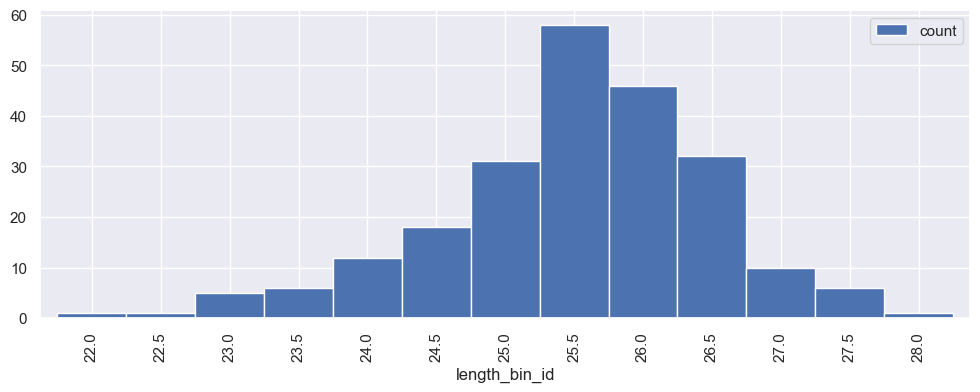

----------------------------------------------
Histogram: 2003051705


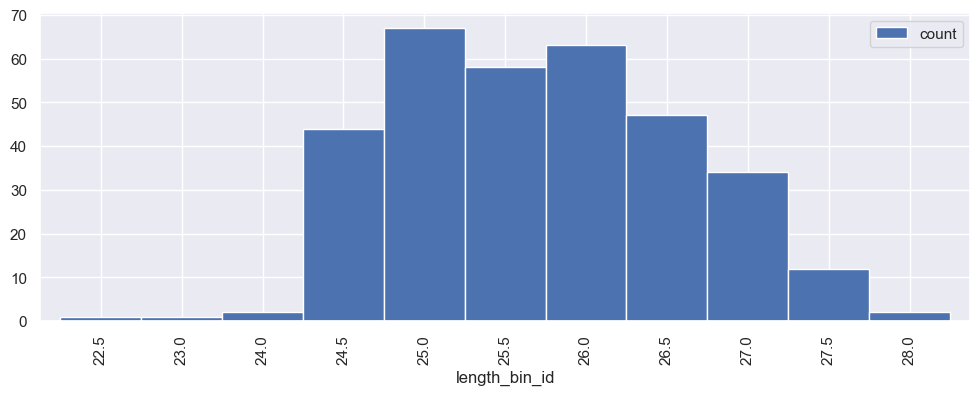

----------------------------------------------
Histogram: 1993052701


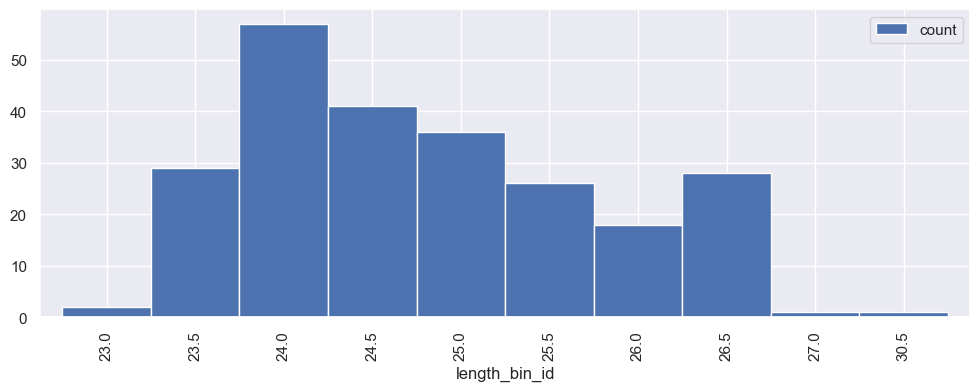

----------------------------------------------
Histogram: 1997052841


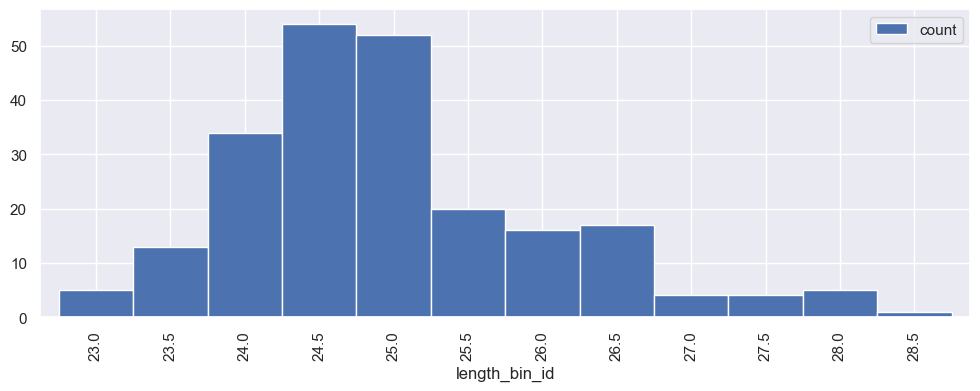

----------------------------------------------
Histogram: 1995060217


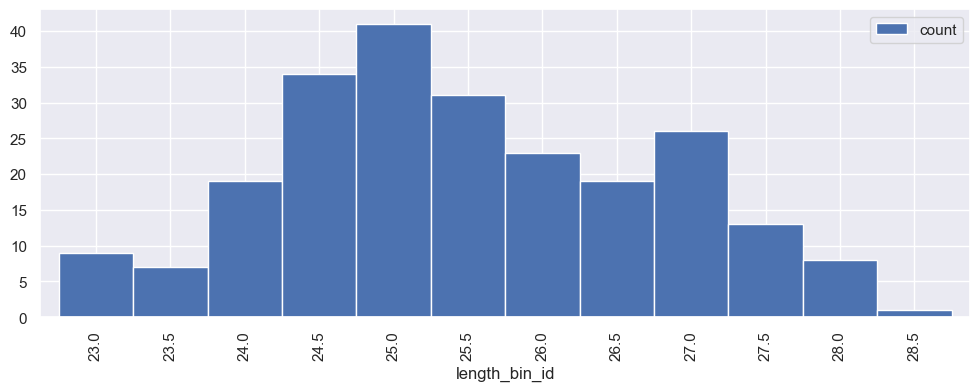

In [25]:
# check a few histograms from random samples
for _ in range(5):
    idx = np.random.choice(df_LF.sample_id.unique())
    print('----------------------------------------------\nHistogram:', idx)
    df_LF.loc[df_LF.sample_id==idx, ['count', 'length_bin_id']].plot(
        kind='bar', x='length_bin_id', y='count', width=1, figsize=(12,4)
    )
    plt.show()